# Data Science Workshop Project

## 1. Introduction

### 3.1 Student's Details

* First name: Elron
* Last name: Tvizer
* Identification number: 301801346

### 3.2 Project's Goals

This project is meant to help an Israeli Air Force helicopters squadron to improve its maintenance and planning processes, to reduce the overall number of helicopters' malfunctions, and to improve the response time of handling a malfunction. 

It is well believed for some time that weather phenomena have a great impact of helicopters' serviceability, thus this project intends to clarify this assumption. 

Furthermore, it is meant to provide insights about the recommended weekly training flights plan, which by default determines the schedule of the maintenance routines and carried out flight, something which may contribute to increase the availability of helicopters, thus increasing the squadron's flexibility to train its pilots. 

I will seek to perform the above by analysing and extracting insights from the data provided by the Israeli Air Force, as well as by building a regression model for classifying malfunctions based on different weather features, extracted from the Israeli Meteorological Service servers.

**Thus, the high-level goals of this project are:**

* Conduct an analysis of various aspects of the malfunctions data provided, with respect to the squadron's two main working locations (Ramon Air Force base and Ramat David Air Force base).


* Conduct an analysis to conclude the various weekly training flight plans implemented (as projected by the data provided by the Israeli Air Force), then analysing its effect on malfunctions' amount and type, in favour of improving the squadron's work.


* Find connections between different tail numbers (helicopters), based on the provided datasets, to give the technical department a different viewpoint of the platform's maintenance activities and regulations.  


* Build a regression model for classifying malfunctions, given the input of weather variables (on ground).


* Build a regression model for classifying malfunctions, given the input of weather variables (during or after training flights departed from Ramat David Air Force base).

### 3.3 Motivation

Attached is an official request signed by the squadron's deputy commander, requesting to carry out the aforementioned analysis work and recommendations (for the part concerning weather damage impacts):

![IAF_Request](images/IAF_Request.jpg)

Personally, as an active reserve officer in the squadron, and as having previously performed a commanding role thus aware of the weighty implications of the relatively low serviceability percentages of the squadron's helicopters, I find a great interest in contributing to this kind of analysis and classification work. 

As stated in the official request, no analysis of the provided malfunctions data is currently being performed, other than calculations of statistics, which do not help make data-driven decisions (for example: average time between malfunctions, percentage of serviceability (i.e. the total number of helicopters available for flight each morning), etc.). Moreover, various decisions regarding helicopters' spare parts, and the presence of maintenance personnel in the heliport (i.e. where helicopters are parked) are a result of rules of thumb, and "gut feelings", thus not knowledge-based.

Many times, in the past the weekly flights plan has changed. As mentioned, the weekly flights plan dictates the squadron's progression in training plan, and involves many resources and constraints (for example: meeting the maintenance routines, allocating the required training resources - flight areas, etc.). A work which connects the serviceability of the squadron's helicopters and the weekly flights plan has been conducted in the past, albeit in a non-comprehensive and inclusive manner (based on a small number of samples, and without a specific reference to the malfunctions issue). In this work I would like to reveal the impacts of the weekly flights plan on the malfunctions amount and type, thus allowing a better decisions to be taken.

Another important feature of a helicopter is it being able to fly under difficult weather conditions. The squadron's helicopters are capable and required to perform their missions in the presence of hard weather conditions. However, increased number of malfunctions, may reduce the helicopters' serviceability for carrying out these and other missions. A decision for having flights under difficult weather conditions on purpose, may increase the risk factors for specific types of malfunctions. Thus, having this knowledge may spur the squadron's commanders to make some improvements meant to handle these increased risk factors wisely (for example: manufacturing a dedicated sealing component, changing the flight areas in real-time, etc.).

Squadron's operations on ground during various weather conditions is another significant issue, since more than 95% of time helicopters are not in air. As stated in the official request - the helicopters are routinely parked outdoor (unlike other aircrafts), and therefore more exposed to weather damage - wind, rain, extreme temperatures (heat or cold), humidity and radiation. Some equipment may be in use, if it turns out that these weather damages are causing a great increase in the number of malfunctions.

**To summarize, these are the general and personal motivations for carrying out this project:**
* This project may contribute to increase the serviceability of the squadron's helicopters, by providing concrete recommendations for adjusting maintenance processes and flight planning.
* This contribution is translated into a better and more accurate utilization of the Israeli taxpayer's money, by increasing the availability of helicopters for flights, instead of being grounded.
* A personal desire to promote an issue that has greatly influenced, and still affects, the service experience of many others and mine.
* Proof of concept of performing such analysis work, outside the Air Force, allowing additional squadrons to take the same road. This may also allow further un-classified data to be analysed outside the Air Force, offering an outsourced way of doing these kinds of jobs.

## 2. Domain-specifc Background

### 2.1 Technical Departments

Helicopter’s maintenance routines are being performed by different technical departments:

* **Class A** - a part of the squadron's chain of command, this department is responsible for the weekly and daily maintenance routines. This department is divided into different teams, each of which is responsible for a different technical domain. In addition, this department personnel are present on site (heliport).


* **Class B** - a part of the base's chain of command, this department is responsible for crossing-platforms technical domains. This department personnel are also divided into different teams, with respect to a specific technical domain. There is no overlapping between Class A and Class B responsibilities since each of which is responsible for different maintenance aspects and technical fields. This department personnel are not present on site (heliport) and invited upon request, although specific avionic team members are present prior to planned departures (most of the times).


* **Class C** - It will not be discussed in this work, as maintenance routines of this class are being initiated once every X flight hours, outside the squadron's authority.


* **Class D** - It will not be discussed in this work, as maintenance routines of this class are being initiated once every X flight hours, outside the squadron's authority.


**To summarize** - The reported malfunctions that will be reviewed and analyzed during this work are malfunctions that were reported by Class A personnel as well as the squadron's pilots. In addition, these malfunctions are handled and fixed only by Class A and Class B personnel.

### 2.2 Regular Maintenance Routines

* **Weekly routine** - Takes place once every two weeks, or every 25 hours of flight. This is the most comprehensive maintenance routine. For this routine, the examined helicopter stands for a full day (morning to evening) and is not available for flight. During the weekly routine, malfunctions may be discovered that will not be detected in the rest of the maintenance routines, since this routine’s checklist is the most comprehensive one.


* **Preflight checking routine** - Takes place before a day of flights. This check is valid for 24 hours or 10 cumulative flight hours (following the check).


* **Between flights checking routine** - Takes place between flights. Can be performed up to 5 times within the range of the Preflight check. This routine checklist is shortened comparing to the Preflight checklist. However, the probability of not finding a malfunction during this routine while having it found during the Preflight routine is assumed to be low.


* **Crews change routine** - This is a much shorter check comparing to the Between flight routine. This check is performed when the helicopter's auxiliary engine is on (i.e. usually when the pilots are being replaced before the helicopter departs for its next flight). After each landing, a crews change routine is being performed. This routine can be performed up to 5 times within the range of the Preflight check (10 flight hours).


* **Strips check** - This is a specific test being performed every 5 hours of flight or every time the auxiliary engine shuts down, categorically. At the end of this check just a specific malfunction can be reported. Based on mechanical aspects, this malfunction is not correlated with weather phenomena.


* **Quick check routine** - This is another version of the Between flights routine. It is being implemented mostly at Ramat David base.

### 2.3 Weekly Flights Plan

The weekly flights plan dictates the weekly training and maintenance activities (operational activities will not be examined in this work).

Sunday - Thursday are the main working days, in which training and maintenance activities are being carried out, in accordance with the weekly flights plan. At Ramat David base, Friday is an additional day in which training and maintenance activities may take place.

We shall keep in mind that the foreseen weekly flights plan is the actual one being performed. As in other domains, there is a difference between theory and practice. The weekly flights plan is affected by the weather, helicopters' serviceability, and many other factors. The dataset analyzed here (training sorties) reflects what happened in practice, meaning the actual execution of the plan. Although changes are likely to happen, most of the weekly flights plans are executed as is (referring to the following major building blocks), and just a small friction of them is being changed dramatically (i.e. a day of flights being cancelled). Of course, the number of flying helicopters is likely to be changed, beacuse of malfunctions.

As an intro, we would like to distinguish between three major building blocks of a weekly flights plan:

1. Maintenance day - no training flight are being planned for this day (only maintenance flights, if needed).


2. Day flights – flights are being planned for the morning and noon times.


3. Day and Night flights - As the above with an addition of flights at night.


Although seems simple, the actual flights plan is much more complicated, and involves many considerations (the actual times, the exact number of participating helicopters, time intervals between flights, etc.). Clustering will be a suitable tool for concluding these based on the training sorties dataset (as planned). 

### 2.4 When Do Malfunctions are being Reported?

In general, malfunctions are being reported (i.e registered in the technical department information system) when they are found. 

There are two ways of finding a malfunction:
1. During one of the maintenance routines (technicians).
2. Before, after or during a flight (pilots).

Not all malfunctions result in a grounded helicopter - malfunctions which have been found during flight, may not require an immediate return to base procedure, thus will be reported and handled just after landing. In both cases, the pilots are the ones hold responsibility for reporting the malfunction after landing.

This description raises an important question:

**For which time interval shall we look while correlating between a discovered malfunction and reported weather variables?** 

There is no strict answer to that question. However, after having a high-level understanding of the regular maintenance routines, as well as understanding the fundamentals of a default weekly flights plan, a one can argue that we shall look for a 12 hours weather variables history prior to a reported malfunction during Monday to Thursday. This relies on the assumption that in average, at least a single "Between flight" checking routine or one planned flight are assumed to be executed during this time interval.

We are left with Sunday. Assuming that most of the helicopters are not being maintained during the weekends, a history of 48 hours is required to truly reflect the weather variables impact on the helicopters' serviceability. 

These time interval assumptions may be changed after having a deeper understanding of the malfunction’s dataset. 

In addition, time interval may be selected as another independent variable of the regression model.

### 2.5 Squadron's Main Locations

The squadron's main locations are:
1. **Ramon Air Force base** - Most of the squadron's helicopters are parked and maintained at this location. Therefore, most of the squadron's flights depart and land at this location. Helicopters spare parts are stored in this location.


2. **Ramat David Air Force base** - A small number of helicopters are parked there most of the year, with a small team of Class A personnel. Class B personnel are not present on site (besides members of the avionic team). A limited number of spare parts are present on site, thus a more complicated malfunctions may require specific Class A / Class B personnel and equipment to arrive from Ramon Air Force base.

### 2.6 Datasets Intro

During this project I will work with the following four datasets:

* Malfunctions Dataset.
* Training Sorties Dataset.
* Helicopters' Parking Locations Dataset.
* Meteorological dataset.

I chose to extract only 6 months (per year) data - 3 of them in Winter, and the other 3 in Sumner. This is assumed to be more than enough for this work.

In the following sections I will shortly describe each of the above - mainly its origin and characteristics.

#### 2.6.1 Malfunctions Dataset

The malfunctions dataset has been extracted from the squadron's technical department information system.

This system holds a full documentation of past malfunctions, thus it was my first choice. 

After multiple conversations made with the point of contact assigned by the squadron's deputy commander, as well as conversations made with Israeli Air Force Cyber Security department (responsible for issuing an approval for extracting the data outside of the Israeli Air Force systems), I chose the following informative attributes to be extracted from that system:

1. **Tail number** - each helicopter has been named with a specific number (written on top of its tail). This identifier allows someone to refer to a specific helicopter when needed. 


2. **System** - the name of the system in which the malfunction has been occurred.


3. **Sub system** - the identifier of the syb-system in which the malfunction has been occurred.


4. **Registration time** - the timestamp of when the malfunction has been registered.


5. **Register profession** - the profession of the malfunction's register.


6. **Closing time (after taken care of the malfunction)** - the timestamp of when the malfunction has been closed (fixed).


7. **Who had closed the malfunction** - the profession of the person who closed the malfunction.


8. **Validated?** - the malfunction was still present while the technician was asked to taken care of it.


The malfunctions dataset contains data for both 2019 and 2020, as needed.

#### 2.6.2 Training Sorties Dataset

The training sorties dataset has been extracted from a dedicated Israeli Air Force information system.

As for the malfunctions dataset, the same approval process took place to have the data extracted outside of the Israeli Air Force systems.

The training sorties dataset contains the following attributes:

1. **Call sign** - each flight is named with a specific call sign (a name), for which flight control personnel can refer to while in air. This attribute can help us to identify which flights took place at northern Israel, since this flights carry a unique call sign.

    Note - This attribute has been changed to a Boolean indicating whether a sortie took place in northern Israel.


2. **Departure time** - the timestamp in which the flight departured.


3. **Landing time** - the timestamp in which the flight landed. 


3. **Tail number** - as described above (under the Malfunctions Dataset).


Although having the full sorties logs, due to classification matters, only specific sorties can be related to a specific geographical location. Thus, I chose to make the in-air analysis only for flights being departed from Ramat David Air Force base. These flights' syllabus and training areas are fixed and considered un-classified.

Please note that rainy days are more common in northern Israel than in its southern parts.
15%-20% percent of the documented sorties took place in northern Israel, thus providing a solid base for analysis.

#### 2.6.3 Helicopters' Parking Locations Dataset

The helicopter's parking locations dataset has been extracted from a dedicated squadron's information system.

As for the malfunctions dataset, the same approval process took place to have the data extracted outside of the Israeli Air Force systems.

The helicopters parking locations dataset contains the following attributes:

1. **Tail Number** - as described above (under the Malfunctions Dataset).


2. **Date** - the date for which the location was registrated.


3. **Location** - the specific helicopter's parking location, for this aforementioned specific date.

Other than Ramon and Ramat David Air Force bases there are other optional locations, which will be omitted, since malfunctions are not being reported while there.

#### 2.6.4 Meteorological dataset

While looking for a reliable and accurate meteorological data, I approached to the Israeli Metrological Service (IMS) website. After a short wandering I came across an API allowing authorized personnel to extract a 10 minutes resolution weather data taken by multiple meteorological stations, located all across Israel. 

Here is a link to the IMS API main web page:

https://ims.gov.il/he/ObservationDataAPI

After a small registration process, I got my token, allowing me an access to the desired data. 

Using the IMS site stations' meta-data, I mapped the closest stations to Ramon and Ramat David Air Force bases (for the parking analysis).

In addition, I used the same link to choose the closest stations to the training areas in northern Israel. These are meant to serve us while analysing the weather impacts while in-air.

Here is a link to the IMS meteorological stations meta-data Excel sheet:

https://ims.data.gov.il/sites/default/files/metadata10minutesIMS_IDENVISTA080218_1.xlsx

For the reader convenience, attached is a map which depicts the meteorological stations' locations.


The chosen stations for this work are:
1. For the parking analysis:

    1.1 **SDE BOQER (no. 76).**
    
    1.2 **NEWE YAAR (no. 23).**
    
    
3. For flights been executed in northern Israel (departed from Ramat David Air Force base):
    
    3.1 **ZEFAT HAR KENAAN (no. 9).**
    
    3.2 **ESHHAR (no. 13).**
    
    3.3 **ELON (no. 6).**
    
    3.4 **KEFAR BLUM (no. 3).**
    
    3.5 **MEROM GOLAN PICMAN (no. 4).**
    
    3.6 **GAMLA (no. 12).**
    
    3.7 **YAVNEEL (no. 26).**
    
The meteorological dataset will contain the following attributes (based on the stations' equipment):

1. **Temperature** - in Celsius.


2. **Wind Velocity and Direction** - in meter per second, and degrees.


3. **Relative Humidity** - in %.


3. **Rain** - in mmillimeter.

![Ims_stations](images/Ims_stations.jpg)

## 3. Datasets Pre-processing

#### Imports

In [1]:
import json
import requests
import pandas as pd
import datetime as dt
import numpy as np

###  3.1 Malfunctions Dataset

#### 3.1.1 Reading Israeli Air Force CSV

We would like to read the .CSV files received from the Israeli Air Force into Pandas dataframes:

In [2]:
malf_df_2019 = pd.read_csv("iaf_datasets/malfunctions_dataset_raw_2019.csv")
malf_df_2020 = pd.read_csv("iaf_datasets/malfunctions_dataset_raw_2020.csv")

Let's have a sense of the data just read by randomly sampling 5 rows:

In [3]:
malf_df_2019.sample(5)

,Tail Number,System,Sub-System,Registration Time,Closing Time,Validated?,Register Profession,Closer Profession
1374,967.0,21,W,18/08/2019 2:13,18/08/2019 22:50,True,Pilot,Class B Engine Tech
1070,842.0,74,E,22/07/2019 20:36,23/07/2019 11:34,True,Pilot,Class B Avionics Tech
1738,845.0,62,C,25/12/2018 11:46,25/12/2018 14:54,True,Class B Avionics Tech,Class B Avionics Tech
860,910.0,76,A,02/07/2019 16:17,02/07/2019 21:15,True,Class B Avionics Tech,Class B Avionics Tech
1597,842.0,69,1,10/12/2018 19:56,11/12/2018 18:00,False,Pilot,Class A Armament Tech


In [4]:
malf_df_2019.sample(5)

,Tail Number,System,Sub-System,Registration Time,Closing Time,Validated?,Register Profession,Closer Profession
564,840.0,74,1,25/02/2019 22:51,26/02/2019 4:13,False,Pilot,Class B Avionics Tech
915,910.0,12,R,08/07/2019 15:21,08/07/2019 17:14,True,Pilot,Class A Officer
1245,967.0,44,B,04/08/2019 21:29,05/08/2019 19:10,True,Pilot,Class A Heli Struct Sys Tech
400,967.0,42,W,10/02/2019 10:31,10/02/2019 16:33,True,Class A Electricity Tech,Class A Electricity Tech
155,801.0,12,C,15/01/2019 13:16,15/01/2019 20:06,True,Pilot,Class A Heli Struct Sys Tech


In [5]:
malf_df_2020.sample(5)

,Tail Number,System,Sub-System,Registration Time,Closing Time,Validated?,Register Profession,Closer Profession
1891,966.0,90,A,16/12/2019 16:01,17/12/2019 10:13,False,Pilot,Class A Electricity Tech
1791,966.0,11,C,09/12/2019 16:23,10/12/2019 14:35,True,Class A Heli Struct Sys Tech,Class A Officer
843,830.0,74,5,17/06/2020 19:49,17/06/2020 19:50,True,Class B Avionics Tech,Class B Avionics Tech
438,845.0,62,E,11/02/2020 14:46,11/02/2020 14:49,True,Class B Avionics Tech,Class B Avionics Tech
809,820.0,14,J,15/06/2020 23:50,17/06/2020 12:47,True,Class B Flight Control Tech,Class B Flight Control Tech


Let's change the 'Tail Number' column values to string format:

In [6]:
def change_to_string_format(malf_df):
    malf_df['Tail Number'] = malf_df['Tail Number'].apply('{0:g}'.format)

change_to_string_format(malf_df_2019)
change_to_string_format(malf_df_2020)

Now, let's change the registration and closing times to follow the datetime convention:

In [7]:
def convert_to_datetime(malf_df):
    # Convert to datetime objects.
    malf_df['Registration Time'] = pd.to_datetime(malf_df['Registration Time'], dayfirst=True)
    malf_df['Closing Time'] = pd.to_datetime(malf_df['Closing Time'], dayfirst=True)

# Convert to datetime objects for 2020.
convert_to_datetime(malf_df_2019)
convert_to_datetime(malf_df_2020)

We would like to give meaningful names instead of the current 'System' and 'Sub-System' columns' values:

In [8]:
# Determine the system name by its code.
def systems_mapping (symbol):
    if symbol == 69:
        return 'Missiles'
    elif symbol == 63:
        return 'Nadiv'
    elif symbol == 74:
        return 'Fire Control'
    elif symbol == 21:
        return 'Engine Control'
    elif symbol == 11:
        return 'Fuselage'
    elif symbol == 65:
        return 'IFF'
    elif symbol == 75:
        return 'Armament'
    elif symbol == 13:
        return 'Landing Gears'
    elif symbol == 76:
        return 'Electronic Warfare'
    elif symbol == 41:
        return 'Air Conditioning'
    elif symbol == 51:
        return 'Flight Instruments'
    elif symbol == 26:
        return 'Transmissions'
    elif symbol == 0:
        return 'General'
    elif symbol == 45:
        return 'Hydraulics'
    elif symbol == 48:
        return 'Air Data'
    elif symbol == 49:
        return 'Service Systems'
    elif symbol == 24:
        return 'APU'
    elif symbol == 90:
        return 'THUMS'
    elif symbol == 14:
        return 'Flight Controls'
    elif symbol == 46:
        return 'Fuel'
    elif symbol == 22:
        return 'Engine'
    elif symbol == 42:
        return 'Electricity'
    elif symbol == 43:
        return 'Pitot'
    elif symbol == 47:
        return 'Pneomatic'
    elif symbol == 12:
        return 'Cockpit'
    elif symbol == 44:
        return 'Lighting'
    elif symbol == 71:
        return 'Navigation'
    elif symbol == 70:
        return 'Guided Weapon'
    elif symbol == 91:
        return 'Safety and Rescue'
    elif symbol == 96:
        return 'Private Equipment'
    elif symbol == 95:
        return 'Manat'
    elif symbol == 28:
        return 'Power Shafts'
    elif symbol == 62:
        return 'Comm'
    elif symbol == 15:
        return 'Rotors'
    elif symbol == 16:
        return 'Vibration'
    

def apply_on_dataframe(malf_df):
    malf_df['System'] = malf_df.apply(lambda row: systems_mapping(row['System']), axis=1)

apply_on_dataframe(malf_df_2019)
apply_on_dataframe(malf_df_2020)

We would like to verify that we did not miss any integer value, converting it into a meaningful string:

In [9]:
systems_set = set(malf_df_2019['System'].unique())

for item in malf_df_2020['System'].unique():
    systems_set.add(item)
    
print(systems_set)

{'THUMS', 'Transmissions', 'Hydraulics', 'General', 'Flight Instruments', 'Service Systems', 'Fire Control', 'Lighting', 'Private Equipment', 'IFF', 'Engine', 'Nadiv', 'Landing Gears', 'Flight Controls', 'Pneomatic', 'Air Data', 'Engine Control', 'Armament', 'Electricity', 'Air Conditioning', 'Electronic Warfare', 'Power Shafts', 'Pitot', 'Fuselage', 'Navigation', 'Rotors', 'Cockpit', 'Comm', 'Fuel', 'Vibration', 'Missiles', 'APU'}


The sub-system column's codes will remain as is, due to classification issues.

Let's check for the uniqe values of the register and closer profession's values:

In [10]:
registers_professions_set = set(malf_df_2019['Register Profession'].unique())

for item in malf_df_2020['Register Profession'].unique():
    registers_professions_set.add(item)
    
print(registers_professions_set)

{'Class B Mechanic', 'Class A Electricity Tech', 'Class A Airborne Mechanic', 'Class A Officer', 'Class A Armament Tech', 'Class B Engine Tech', 'Class A Heli Struct Sys Tech', 'Class B Structurer Tech', 'Pilot', 'Class A Tech', 'Class B Flight Control Tech', 'Class B Armament Comm Tech', 'Class B Avionics Tech'}


And now for the tail numbers:

In [11]:
tail_numbers_set = set(malf_df_2019['Tail Number'].unique())

for item in malf_df_2020['Tail Number'].unique():
    tail_numbers_set.add(item)
    
print(tail_numbers_set)

{'921', '828', '966', '941', '815', '935', '967', '804', '837', '845', '820', '830', '806', '905', '834', '924', '832', '938', '840', 'nan', '812', '842', '801', '956', '910', '961'}


Finally, we would like to verify that closing times are later than registration times:

In [12]:
def validate_times(malf_df):
    invalid_times = []

    # Iterate over 'Registration Time' and 'Closing Time' instances to check for the condition.
    for instance in zip(malf_df['Registration Time'], malf_df['Closing Time']):
        if instance[0] > instance[1]:
            invalid_times.append(instance)

    # Print a nice message.
    if not invalid_times:
        print("Closing times are later than registration times!")
    else:
        print("The following invalid tuples were found: ", invalid_dates)

In [13]:
validate_times(malf_df_2019)

Closing times are later than registration times!


In [14]:
validate_times(malf_df_2020)

Closing times are later than registration times!


#### 3.1.2 Check and Handle Missing Values (if any)

We already understood that we are missing some values. We don't have a straight forward and relevant way to complete those, so we will just drop them:

In [15]:
def clean_nans(malf_df):
    # Tail Number attribute has been converted to String, thus we shall assign NaN to the corresponded values first.
    malf_df.loc[malf_df['Tail Number'] == 'nan', 'Tail Number'] = np.nan
    malf_df.dropna(inplace = True)


clean_nans(malf_df_2019)
clean_nans(malf_df_2020)

We would like to verify that all reported malfunctions have been registered during Winter (December, January, February) and Summer (June, July, August) months:

In [16]:
def validate_dates(malf_df, first_period_starting_date, first_period_ending_date, 
                   second_period_starting_date, second_period_ending_date):
    invalid_dates = []
    
    # Iterate over 'Registration Time' instances to check for the condition.
    for instance in malf_df['Registration Time']:
        if first_period_starting_date <= instance <= first_period_ending_date or \
        second_period_starting_date <= instance <= second_period_ending_date:
            invalid_dates.append(instance)

    # Print a nice message.
    if not invalid_dates:
        print("All dates are during the specified months!")
    else:
        print("The following invalid dates were found: ", invalid_dates)

In [17]:
validate_dates(malf_df_2019, dt.datetime(2019,3,1), dt.datetime(2019,5,31), dt.datetime(2019,9,1), dt.datetime(2019,12,31))

All dates are during the specified months!


In [18]:
validate_dates(malf_df_2020, dt.datetime(2020,3,1), dt.datetime(2020,5,31), dt.datetime(2020,9,1), dt.datetime(2020,12,31))

All dates are during the specified months!


#### 3.1.3 Shaping the Dataset

The only thing we would like to do with the malfunctions dataframes is to add to them another column specifying the malfunction's handling duration:

In [19]:
# Calculates the time delta.
def calc_time_delta (row):
    return row['Closing Time'] - row['Registration Time']

def apply_on_dataframe(malf_df):
    malf_df['Malfunction Handling Duration'] = malf_df.apply(lambda row: calc_time_delta(row), axis=1)

apply_on_dataframe(malf_df_2019)    
apply_on_dataframe(malf_df_2020)    

Now, we would like to change the columns' order as following:

In [20]:
def change_columns_order(malf_df):
    malf_df = malf_df[['Tail Number', 'Registration Time', 'Closing Time', 
                         'Malfunction Handling Duration', 'System', 'Sub-System',
                         'Register Profession', 'Closer Profession', 'Validated?']]

change_columns_order(malf_df_2019)
change_columns_order(malf_df_2020)

Finally, let's change the registration and closing times to follow UTC+0, in order them to correspond with the meterological dataframe (as further discussed below):

In [21]:
def change_to_utc(given_df, column, winter_time_starting_date, winter_time_ending_date):
    given_df.loc[(given_df[column] > winter_time_starting_date) & \
                   (given_df[column] < winter_time_ending_date), column] = \
    given_df.loc[(given_df[column] > winter_time_starting_date) & \
                   (given_df[column] < winter_time_ending_date), column] - dt.timedelta(hours = 2)
    
    given_df.loc[given_df[column] >= winter_time_ending_date, column] = \
    given_df.loc[given_df[column] >= winter_time_ending_date, column] - dt.timedelta(hours = 3)

In [22]:
winter_time_starting_date_2019 = dt.datetime(2018,10,28)
winter_time_ending_date_2019 = dt.datetime(2019,3,29)
winter_time_starting_date_2020 = dt.datetime(2019,10,27)
winter_time_ending_date_2020 = dt.datetime(2020,3,27)

In [23]:
change_to_utc(malf_df_2019, 'Registration Time', winter_time_starting_date_2019, winter_time_ending_date_2019)
change_to_utc(malf_df_2019, 'Closing Time', winter_time_starting_date_2019, winter_time_ending_date_2019)

In [24]:
change_to_utc(malf_df_2020, 'Registration Time', winter_time_starting_date_2020, winter_time_ending_date_2020)
change_to_utc(malf_df_2020, 'Closing Time', winter_time_starting_date_2020, winter_time_ending_date_2020)

Last look on the dataframes before saving them:

In [25]:
malf_df_2019.sample(5)

,Tail Number,System,Sub-System,Registration Time,Closing Time,Validated?,Register Profession,Closer Profession,Malfunction Handling Duration
878,910,Rotors,B,2019-07-04 04:34:00,2019-07-04 09:18:00,True,Class A Heli Struct Sys Tech,Class A Heli Struct Sys Tech,0 days 04:44:00
1581,801,Fuselage,E,2018-12-10 09:58:00,2018-12-12 23:54:00,True,Class A Tech,Class A Armament Tech,2 days 13:56:00
318,828,Cockpit,C,2019-01-29 17:37:00,2019-01-30 11:33:00,True,Class A Electricity Tech,Class A Airborne Mechanic,0 days 17:56:00
463,967,Landing Gears,B,2019-02-16 19:24:00,2019-02-16 19:25:00,True,Class A Heli Struct Sys Tech,Class A Heli Struct Sys Tech,0 days 00:01:00
1550,938,Fuselage,G,2018-12-05 14:15:00,2018-12-05 14:49:00,True,Class A Armament Tech,Class B Structurer Tech,0 days 00:34:00


In [26]:
malf_df_2020.sample(5)

,Tail Number,System,Sub-System,Registration Time,Closing Time,Validated?,Register Profession,Closer Profession,Malfunction Handling Duration
1656,801,Navigation,H,2020-08-31 12:11:00,2020-09-01 09:36:00,True,Pilot,Class B Avionics Tech,0 days 21:25:00
1810,828,Armament,B,2019-12-10 09:49:00,2019-12-10 11:39:00,True,Class A Tech,Class A Tech,0 days 01:50:00
1172,935,Vibration,A,2020-07-09 13:41:00,2020-07-11 19:05:00,True,Pilot,Class A Heli Struct Sys Tech,2 days 05:24:00
1235,812,Fuselage,E,2020-07-14 15:59:00,2020-07-14 17:10:00,True,Class A Tech,Class A Tech,0 days 01:11:00
241,924,Fire Control,5,2020-01-27 06:21:00,2020-01-27 17:50:00,False,Pilot,Class B Avionics Tech,0 days 11:29:00


Finally, we would like to save the dataframes into a dedicated directory (for a later use):

In [27]:
malf_df_2019.to_pickle("malfunctions_data_set/malfunctions_dataset_2019.pkl")
malf_df_2020.to_pickle("malfunctions_data_set/malfunctions_dataset_2020.pkl")

###  3.2  Training Sorties Dataset

#### 3.2.1 Reading Israeli Air Force CSV

We would like to read the .CSV files received from the Israeli Air Force into Pandas dataframes:

In [28]:
flights_df_2019 = pd.read_csv("iaf_datasets/flights_dataset_raw_2019.csv")
flights_df_2020 = pd.read_csv("iaf_datasets/flights_dataset_raw_2020.csv")

Let's have a sense of the data just read by randomly sampling 5 rows:

In [29]:
flights_df_2019.sample(5)

,Northern Flight,Landing Time,Departure Time,Tail Number,Date
552,True,27/02/2019 19:52,27/02/2019 19:07,961,27/02/2019
194,False,26/12/2018 11:23,26/12/2018 11:13,806,26/12/2018
1681,False,24/07/2019 10:20,24/07/2019 10:05,938,24/07/2019
524,True,05/02/2019 19:43,05/02/2019 18:58,905,05/02/2019
1620,False,01/07/2019 20:39,01/07/2019 19:49,832,01/07/2019


In [30]:
flights_df_2020.sample(5)

,Northern Flight,Landing Time,Departure Time,Tail Number,Date
1717,False,10/08/2020 13:10,10/08/2020 13:00,967,10/08/2020
508,True,05/12/2019 17:56,05/12/2019 17:11,830,05/12/2019
1374,True,18/06/2020 21:32,18/06/2020 20:47,830,18/06/2020
727,False,29/01/2020 22:32,29/01/2020 21:27,804,29/01/2020
2096,False,13/07/2020 17:05,13/07/2020 16:50,961,13/07/2020


We would like to set the "Tail Number" column as the dataframes' index:

In [31]:
def set_tail_number_as_index(flights_df):
    flights_df.set_index('Tail Number', inplace = True)

set_tail_number_as_index(flights_df_2019)
set_tail_number_as_index(flights_df_2020)

Let's drop the "Date" column, since this data is already a part of the landing and departure times:

In [32]:
def drop_date_cloumn(flights_df):
    flights_df.drop(columns = ["Date"], inplace = True)

drop_date_cloumn(flights_df_2019)
drop_date_cloumn(flights_df_2020)

Finally, we would like to change the departure and landing times to follow the datetime convention:

In [33]:
def convert_to_datetime(flights_df):
    flights_df['Departure Time'] = pd.to_datetime(flights_df['Departure Time'], dayfirst=True)
    flights_df['Landing Time'] = pd.to_datetime(flights_df['Landing Time'], dayfirst=True)

convert_to_datetime(flights_df_2019)
convert_to_datetime(flights_df_2020)

#### 3.2.2 Check and Handle Missing Values (if any)

We would like to understand if our dataframes have missing values (NaNs):

In [34]:
flights_df_2019.isnull().sum()

Northern Flight    0
Landing Time       0
Departure Time     0
dtype: int64

In [35]:
flights_df_2020.isnull().sum()

Northern Flight    0
Landing Time       0
Departure Time     0
dtype: int64

Based on my past experience, I expect 15% - 20% of sorties to have the 'Northern Israel' flag set True:

In [36]:
def calc_northern_israel_prec(flights_df):
    print((flights_df[flights_df['Northern Flight'] == True].count() / flights_df.count()) * 100)

print("2019 Statistics:")
calc_northern_israel_prec(flights_df_2019)

print("\n2020 Statistics:")
calc_northern_israel_prec(flights_df_2020)

2019 Statistics:
Northern Flight    15.986395
Landing Time       15.986395
Departure Time     15.986395
dtype: float64

2020 Statistics:
Northern Flight    16.318962
Landing Time       16.318962
Departure Time     16.318962
dtype: float64


We would like to verify that all sorties took place during Winter(December, January, February) and Summer (June, July, August) months:

In [37]:
def validator(flights_df, column_name, first_period_starting_date, first_period_ending_date, 
              second_period_starting_date, second_period_ending_date):
    
    invalid_dates = []

    # Iterate over the column's instances to check for the condition.
    for instance in flights_df[column_name]:
        if first_period_starting_date <= instance <= first_period_ending_date or \
         second_period_starting_date <= instance <= second_period_ending_date:
            invalid_dates.append(instance)

    return invalid_dates
        
        
def validate_dates(flights_df, first_period_starting_date, first_period_ending_date, 
                   second_period_starting_date, second_period_ending_date):
                   
    # Use the Validator method to validate the dates.
    invalid_dates_departure = validator(flights_df, 'Departure Time', first_period_starting_date, first_period_ending_date, 
                              second_period_starting_date, second_period_ending_date)
    invalid_dates_landing = validator(flights_df, 'Landing Time', first_period_starting_date, first_period_ending_date, 
                              second_period_starting_date, second_period_ending_date)
                   
    # Print a nice message.
    if not invalid_dates_departure and not invalid_dates_landing:
        print("All dates are during the specified months!")
    else:
        print("The following invalid dates were found: ", invalid_dates_departure, invalid_dates_landing) 

In [38]:
validate_dates(flights_df_2019, dt.datetime(2019,3,1), dt.datetime(2019,5,31), dt.datetime(2019,9,1), dt.datetime(2019,12,31))

All dates are during the specified months!


In [39]:
validate_dates(flights_df_2020, dt.datetime(2020,3,1), dt.datetime(2020,5,31), dt.datetime(2020,9,1), dt.datetime(2020,12,31))

All dates are during the specified months!


Finally, we would like to verify that landing times are later than departure times:

In [40]:
def validate_times(flights_df):
    invalid_times = []

    # Iterate over 'Departure Time' and 'Landing Time' instances to check for the condition.
    for instance in zip(flights_df['Departure Time'], flights_df['Landing Time']):
        if instance[0] > instance[1]:
            invalid_times.append(instance)


    # Print a nice message.
    if not invalid_times:
        print("Landing times are later than departure times!")
    else:
        print("The following invalid tuples were found: ", invalid_dates)

In [41]:
validate_times(flights_df_2019)

Landing times are later than departure times!


In [42]:
validate_times(flights_df_2020)

Landing times are later than departure times!


#### 3.2.3 Shaping the Dataset

The only thing we would like to do with the training sorties dataframes is to add to them another column for the flight's duration:

In [43]:
# Calculates the time delta.
def calc_time_delta (row):
    return row['Landing Time'] - row['Departure Time']

# Apply on Dataframe.
def apply_on_dataframe(flights_df):
    flights_df['Flight Duration'] = flights_df.apply(lambda row: calc_time_delta(row), axis=1)
    
apply_on_dataframe(flights_df_2019)
apply_on_dataframe(flights_df_2020)

The squadron flies about ~4000 hours per year. Therefore, we are expecting ~2000 hours totally:

In [44]:
def print_annually_flight_hours(flights_df, year):
    print("Total flights' hours reported in {0}: {1:.2f}".format(year, 
                                                                 flights_df['Flight Duration'].sum().total_seconds() / 3600))
    
print_annually_flight_hours(flights_df_2019, 2019)
print_annually_flight_hours(flights_df_2020, 2020)

Total flights' hours reported in 2019: 1542.68
Total flights' hours reported in 2020: 1845.83


It seems that the squadron flew less than expected during the reviewed part of 2019.

Now, we would like to change the columns order as following:

In [45]:
def change_columns_order(flights_df):
    flights_df = flights_df[['Departure Time', 'Landing Time', 'Flight Duration', 'Northern Flight']]
    
change_columns_order(flights_df_2019)
change_columns_order(flights_df_2020)

Finally, let's change the departure and landing times to follow UTC+0, in order them to correspond with the meterological dataframe (as further discussed below):

Note - the method to be used was written under the "Malfunctions Dataset" section.

In [46]:
change_to_utc(flights_df_2019, 'Departure Time', winter_time_starting_date_2019, winter_time_ending_date_2019)
change_to_utc(flights_df_2019, 'Landing Time', winter_time_starting_date_2019, winter_time_ending_date_2019)

In [47]:
change_to_utc(flights_df_2020, 'Departure Time', winter_time_starting_date_2020, winter_time_ending_date_2020)
change_to_utc(flights_df_2020, 'Landing Time', winter_time_starting_date_2020, winter_time_ending_date_2020)

Last look on the dataframes before saving them:

In [48]:
flights_df_2019.sample(5)

,Northern Flight,Landing Time,Departure Time,Flight Duration
Tail Number,,,,
830,False,2019-02-11 11:41:00,2019-02-11 10:16:00,0 days 01:25:00
924,False,2019-08-18 10:53:00,2019-08-18 09:53:00,0 days 01:00:00
910,False,2019-06-24 08:30:00,2019-06-24 08:20:00,0 days 00:10:00
842,False,2019-08-18 05:34:00,2019-08-18 05:24:00,0 days 00:10:00
832,True,2019-08-12 17:35:00,2019-08-12 16:45:00,0 days 00:50:00


In [49]:
flights_df_2020.sample(5)

,Northern Flight,Landing Time,Departure Time,Flight Duration
Tail Number,,,,
935,True,2020-06-14 15:50:00,2020-06-14 15:05:00,0 days 00:45:00
842,False,2020-02-24 21:19:00,2020-02-24 20:04:00,0 days 01:15:00
832,True,2020-02-12 17:00:00,2020-02-12 16:10:00,0 days 00:50:00
820,False,2020-07-06 17:55:00,2020-07-06 17:00:00,0 days 00:55:00
828,False,2020-08-09 13:55:00,2020-08-09 13:45:00,0 days 00:10:00


Finally, we would like to save the dataframes into a dedicated directory (for a later use):

In [50]:
flights_df_2019.to_pickle("helicopters_flights_data_set/flights_dataset_2019.pkl")
flights_df_2020.to_pickle("helicopters_flights_data_set/flights_dataset_2020.pkl")

###  3.3 Helicopters' Parking Locations Dataset

#### 3.3.1 Reading Israeli Air Force CSV

We would like to read the .CSV files received from the Israeli Air Force into a Pandas dataframes:

In [51]:
parking_df_2019 = pd.read_csv("iaf_datasets/parking_dataset_raw_2019.csv")
parking_df_2020 = pd.read_csv("iaf_datasets/parking_dataset_raw_2020.csv")

Let's have a sense of the data just read by randomly sampling 5 rows:

In [52]:
parking_df_2019.sample(5)

,Unnamed: 0,801,804,806,812,815,820,828,830,832,...,910,921,924,935,938,941,956,961,966,967
131,11/04/2019,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
124,04/04/2019,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
315,12/10/2019,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
56,26/01/2019,25,25,1,1,25,1,25,25,25,...,25,25,25,1,25,25,25,25,25,25
280,07/09/2019,25,25,25,1,1,25,25,25,25,...,1,1,25,25,25,25,25,25,25,1


In [53]:
parking_df_2020.sample(5)

,Unnamed: 0,801,804,806,812,815,820,828,830,832,...,910,921,924,935,938,941,956,961,966,967
346,11/11/2020,25,25,25,25,1,25,25,25,25,...,25,25,25,25,25,25,25,25,25,1
192,10/06/2020,25,25,25,25,25,25,25,1,25,...,1,25,25,1,25,1,25,25,25,25
337,02/11/2020,25,25,25,25,1,25,25,25,1,...,25,25,25,25,25,25,25,25,25,1
342,07/11/2020,25,25,25,25,1,25,25,25,1,...,25,25,25,25,25,25,25,25,25,1
375,10/12/2020,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25


We would like to change the 'Unnamed: 0' column name to 'Date'. Then, changing it to follow the datetime convention (type). At the end, we would like to set it as the dataframes' index:

In [54]:
def manipulate_date_column(parking_df):
    parking_df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

    # Convert to datetime objects.
    parking_df['Date'] = pd.to_datetime(parking_df['Date'], dayfirst=True)

    parking_df.set_index('Date', inplace=True)

manipulate_date_column(parking_df_2019)
manipulate_date_column(parking_df_2020)

#### 3.3.2 Check and Handle Missing Values (if any)

We would like to understand if our dataframes have missing values (NaNs):

In [55]:
parking_df_2019.isnull().sum()

801    0
804    0
806    0
812    0
815    0
820    0
828    0
830    0
832    0
834    0
837    0
840    0
842    0
845    0
905    0
910    0
921    0
924    0
935    0
938    0
941    0
956    0
961    0
966    0
967    0
dtype: int64

In [56]:
parking_df_2020.isnull().sum()

801    0
804    0
806    0
812    0
815    0
820    0
828    0
830    0
832    0
834    0
837    0
840    0
842    0
845    0
905    0
910    0
921    0
924    0
935    0
938    0
941    0
956    0
961    0
966    0
967    0
dtype: int64

We would like to print all possible parking locations:

In [57]:
def print_parking_locations(parking_df):
    parking_locations = []

    # Iterate over the columns unique values (except the Date).
    for col in parking_df.columns[1:]:
        for location in parking_df[col].unique():
            parking_locations.append(location)

    # Print the set of locations
    print('The parking locations reported are:', set(parking_locations))

In [58]:
print_parking_locations(parking_df_2019)

The parking locations reported are: {8, 25, 1}


We can see that the dataframe contains 3 different locations:

1 = Ramat David Air Force base.

25 = Ramon Air Force base.

8 = Another base. No malfunctions are assumed to be reported while parked there.

Let's verify that the number of '8's are relatively small (thus not having any effect of the expected analysis):

In [59]:
def count_location(parking_df, location):
    count = 0

    # Iterate over the dataframe and count 10s.
    for col in parking_df.columns[1:]:
        for value in parking_df[col]:
            if value == location:
                count += 1

    print('The total number of {0}s is: {1}'.format(location, count))

In [60]:
count_location(parking_df_2019, 8)

The total number of 8s is: 13


Relatively small. We can just ignore these reports for now.

Let's do the same for 2020 dataframe:

In [61]:
print_parking_locations(parking_df_2020)

The parking locations reported are: {25, 10, 1}


We can see that the dataframe contains an additional location besides 1 and 25:

10 = Another base. No malfunctions are assumed to be reported while parked there.

Let's verify that the number of '10's are small (thus not having any effect of the expected analysis):

In [62]:
count_location(parking_df_2020, 10)

The total number of 10s is: 8


Relatively small. We can just ignore these reports for now.

Finally, we want to make sure that a parking location was reported for each and every data:

In [63]:
def confirm_reports(parking_df, start_date, end_date):
    # Create a new Dataframe with the speicifed datatime values, and calculate the difference.
    res = list(pd.date_range(start = start_date, end = end_date ).difference(parking_df.index))

    # Print a nice message.
    if not res:
        print("There are no missing dates!")
    else:
        print(res)

In [64]:
confirm_reports(parking_df_2019, '2018/12/01', '2019/12/31')

There are no missing dates!


In [65]:
confirm_reports(parking_df_2020, '2019/12/01', '2020/12/31')

There are no missing dates!


#### 3.3.3 Shaping the Dataset

We would like to reshape our dataframes by melting and setting them another index ("Tail Number"):

In [66]:
def shape_dataframe(parking_df):
    # Melt.
    returned_parking_df = parking_df.melt(ignore_index=False)

    # Reanme columns' names.
    returned_parking_df.rename(columns={'variable': 'Tail Number', 'value' : 'Parking Location'}, inplace=True)

    # Set multi-index.
    returned_parking_df.set_index(['Tail Number'], append=True, inplace=True)
    return returned_parking_df

parking_df_2019 = shape_dataframe(parking_df_2019)
parking_df_2020 = shape_dataframe(parking_df_2020)

We would like to preserve the selected Winter (December, January, February) and Summer (June, July, August) months, and to omit all others:

In [67]:
def delete_unwanted_dates(parking_df, requested_dates_to_delete):
    # Iterate over the list, to delete the specified periods.
    for period in requested_dates_to_delete:
        remove = pd.date_range(start = period[0], end = period[1], freq='D')
        parking_df.drop(remove, level=0, inplace=True)

In [68]:
dates_to_delete_2019 = [("2019/03/01","2019/05/31"), ("2019/09/01","2019/12/31")]
delete_unwanted_dates(parking_df_2019, dates_to_delete_2019)

In [69]:
dates_to_delete_2020 = [("2020/03/01","2020/05/31"), ("2020/09/01","2020/12/31")]
delete_unwanted_dates(parking_df_2020, dates_to_delete_2020)

Let's randomly sample our reshaped dataframes:

In [70]:
parking_df_2019.sample(5)

,,Parking Location
Date,Tail Number,
2019-01-05,935,25
2018-12-30,804,25
2018-12-28,834,25
2019-08-05,966,25
2019-08-29,801,25


In [71]:
parking_df_2020.sample(5)

,,Parking Location
Date,Tail Number,
2020-08-29,837,25
2019-12-04,830,1
2020-01-30,956,25
2020-02-29,941,25
2020-01-04,832,25


Finally, we would like to save the dataframes into a dedicated directory (for a later use):

In [72]:
parking_df_2019.to_pickle("helicopters_parking_data_set/parking_dataset_2019.pkl")
parking_df_2020.to_pickle("helicopters_parking_data_set/parking_dataset_2020.pkl")

### 3.4 Meteorological dataset

#### 3.4.1 Extract Data from IMS Server

As mentioned, we would like to retrieve data for specific metrological stations (as discussed above):

In [73]:
# Prepare a list of tuples - Station's name and id.
stations_list = [('SEDE BOQER', 98),
                 ('NEWE YAAR', 186),
                 ('YAVNEEL', 11), 
                 ('GAMLA', 227),
                 ('MEROM GOLAN PICMAN', 10),
                 ('KEFAR BLUM', 202),
                 ('ELON', 73),
                 ('ESHHAR', 205), 
                 ('ZEFAT HAR KENAAN', 62)]

The server returns a full JSON object, contains all of the weather data present for that station. 

We would like to convert the given data to a nice Pandas dataframe, saving only the relevant attributes:

In [74]:
# Use unique token recived from the IMS to retrive data.
headers = {'Authorization': 'ApiToken f058958a-d8bd-47cc-95d7-7ecf98610e47'}

def extract_ims_data(dates_to_retrive):
    # Fill the observations list.
    observations_list = []

    # Retrive data for the selcted dates.
    for date in dates_to_retrive:
        print("Retrive {} to {} data..".format(date[0], date[1]))
        # Retrive data for every station within the stations list.
        for station in stations_list:
            url = "https://api.ims.gov.il/v1/envista/stations/{}/data?from={}&to={}".format(station[1], date[0], date[1])
            # Get JSON from IMS server.
            response = requests.request("GET", url, headers=headers)
            if response.status_code == requests.codes.ok:
                data = json.loads(response.text.encode('utf8'))
                # Print to console.
                print("Succefully retrived {} meterological data from IMS server..".format(station[0]))
            else:
                print("\x1b[31mRequest returned with a fault. \
                      Can't retrive {} data from IMS server..\x1b[0m".format(station[0]))
            # Travel through the JSON to extract the desired features.
            for record in data['data']:
                single_observation = {'Time': pd.to_datetime(record['datetime']), 'Station Name': station[0]}
                for channel in record['channels']:
                    if channel['name'] == 'Rain':
                        single_observation['Rain'] = channel['value']
                    elif channel['name'] == 'RH':
                        single_observation['Humidity'] = channel['value']
                    elif channel['name'] == 'TD':
                        single_observation['Temperature'] = channel['value']
                    elif channel['name'] == 'WD':
                        single_observation['Wind Direction'] = channel['value']
                    elif channel['name'] == 'WS':
                        single_observation['Wind Speed'] = channel['value']
                observations_list.append(single_observation)

    # Create new dataFrame to keep the meterological data.
    return pd.DataFrame(observations_list)

In [75]:
# Selected dates to retrive from.
dates_to_retrive_2019 = [("2018/12/01","2019/03/01"), ("2019/06/01","2019/09/01")]

meterological_df_2019 = extract_ims_data(dates_to_retrive_2019)

Retrive 2018/12/01 to 2019/03/01 data..
Succefully retrived SEDE BOQER meterological data from IMS server..
Succefully retrived NEWE YAAR meterological data from IMS server..
Succefully retrived YAVNEEL meterological data from IMS server..
Succefully retrived GAMLA meterological data from IMS server..
Succefully retrived MEROM GOLAN PICMAN meterological data from IMS server..
Succefully retrived KEFAR BLUM meterological data from IMS server..
Succefully retrived ELON meterological data from IMS server..
Succefully retrived ESHHAR meterological data from IMS server..
Succefully retrived ZEFAT HAR KENAAN meterological data from IMS server..
Retrive 2019/06/01 to 2019/09/01 data..
Succefully retrived SEDE BOQER meterological data from IMS server..
Succefully retrived NEWE YAAR meterological data from IMS server..
Succefully retrived YAVNEEL meterological data from IMS server..
Succefully retrived GAMLA meterological data from IMS server..
Succefully retrived MEROM GOLAN PICMAN meterologic

In [77]:
# Select dates to retrive from.
dates_to_retrive_2020 = [("2019/12/01","2020/03/01"), ("2020/06/01","2020/09/01")]

meterological_df_2020 = extract_ims_data(dates_to_retrive_2020)

Retrive 2019/12/01 to 2020/03/01 data..
Succefully retrived SEDE BOQER meterological data from IMS server..
Succefully retrived NEWE YAAR meterological data from IMS server..
Succefully retrived YAVNEEL meterological data from IMS server..
Succefully retrived GAMLA meterological data from IMS server..
Succefully retrived MEROM GOLAN PICMAN meterological data from IMS server..
Succefully retrived KEFAR BLUM meterological data from IMS server..
Succefully retrived ELON meterological data from IMS server..
Succefully retrived ESHHAR meterological data from IMS server..
Succefully retrived ZEFAT HAR KENAAN meterological data from IMS server..
Retrive 2020/06/01 to 2020/09/01 data..
Succefully retrived SEDE BOQER meterological data from IMS server..
Succefully retrived NEWE YAAR meterological data from IMS server..
Succefully retrived YAVNEEL meterological data from IMS server..
Succefully retrived GAMLA meterological data from IMS server..
Succefully retrived MEROM GOLAN PICMAN meterologic

Let's have a sense of the data just extarcted by randomly sampling 5 rows:

In [78]:
meterological_df_2019.sample(5)

,Time,Station Name,Rain,Wind Speed,Wind Direction,Temperature,Humidity
99707,2019-02-01 11:10:00+02:00,ESHHAR,0.0,1.9,154.0,14.4,53.0
36992,2019-02-15 21:40:00+02:00,YAVNEEL,0.0,2.1,347.0,12.4,81.0
198488,2019-06-18 11:40:00+03:00,ELON,0.0,2.3,258.0,26.8,60.0
47343,2019-01-28 19:00:00+02:00,GAMLA,0.0,3.5,248.0,8.4,99.0
213196,2019-06-28 20:20:00+03:00,ESHHAR,0.0,3.7,285.0,23.0,90.0


In [79]:
meterological_df_2020.sample(5)

,Time,Station Name,Rain,Wind Speed,Wind Direction,Temperature,Humidity
66454,2019-12-12 05:20:00+02:00,KEFAR BLUM,0.0,0.8,41.0,11.6,93.0
55315,2019-12-25 20:00:00+02:00,MEROM GOLAN PICMAN,0.9,2.7,246.0,6.2,100.0
151706,2020-07-26 10:30:00+03:00,YAVNEEL,0.0,3.0,112.0,32.5,52.0
6394,2020-01-14 10:40:00+02:00,SEDE BOQER,0.0,3.7,120.0,13.2,69.0
15803,2019-12-19 19:40:00+02:00,NEWE YAAR,0.0,3.2,1.0,13.4,61.0


#### 3.4.2 Check and Handle Missing Values (if any)

First, we would like to understand if our Dataframes have missing values (NaNs), and under which column:

In [80]:
meterological_df_2019.isnull().sum()

Time              0
Station Name      0
Rain              0
Wind Speed        0
Wind Direction    0
Temperature       0
Humidity          0
dtype: int64

In [81]:
meterological_df_2020.isnull().sum()

Time              0
Station Name      0
Rain              0
Wind Speed        0
Wind Direction    0
Temperature       0
Humidity          0
dtype: int64

Second, we would like to get some statistics about the data just extracted, to verify that the data make sense:

In [82]:
meterological_df_2019.describe()

,Rain,Wind Speed,Wind Direction,Temperature,Humidity
count,235629.000000,235629.000000,235629.000000,235629.000000,235629.000000
mean,0.020589,3.314292,213.060396,18.518069,69.543863
std,0.157739,20.751248,97.666357,22.360827,29.837165
min,0.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,0.000000,1.400000,123.000000,11.000000,53.000000
50%,0.000000,2.800000,241.000000,18.600000,72.000000
75%,0.000000,4.800000,290.000000,25.500000,88.000000
max,10.600000,22.000000,360.000000,54.400000,100.000000


It seems that we have a problem with specific rows, resulting in an invalid minimun value of -9999.0.
Let's find these rows:

In [83]:
meterological_df_2019.loc[meterological_df_2019["Temperature"] == -9999.0]

,Time,Station Name,Rain,Wind Speed,Wind Direction,Temperature,Humidity
55084,2018-12-23 13:20:00+02:00,MEROM GOLAN PICMAN,0.0,-9999.0,-9999.0,-9999.0,-9999.0


We found a single row. 
Since this is just a single row, and we are aiming to group the data by 1-hour time frame resolution, we can just discard it:  

In [84]:
meterological_df_2019.drop(meterological_df_2019.index[meterological_df_2019["Temperature"] == -9999.0].tolist(), 
                           inplace = True)

Let's have the dataframe description again to verify that it all went as planned:

In [85]:
meterological_df_2019.describe()

,Rain,Wind Speed,Wind Direction,Temperature,Humidity
count,235628.000000,235628.000000,235628.000000,235628.000000,235628.000000
mean,0.020589,3.356742,213.103736,18.560583,69.586594
std,0.157739,2.453215,95.373821,8.609244,21.448096
min,0.000000,0.000000,0.000000,-23.800000,5.000000
25%,0.000000,1.400000,123.000000,11.000000,53.000000
50%,0.000000,2.800000,241.000000,18.600000,72.000000
75%,0.000000,4.800000,290.000000,25.500000,88.000000
max,10.600000,22.000000,360.000000,54.400000,100.000000


Let's proceed with 2020 data:

In [86]:
meterological_df_2020.describe()

,Rain,Wind Speed,Wind Direction,Temperature,Humidity
count,236449.000000,236449.000000,236449.000000,236449.000000,236449.000000
mean,0.020780,3.232858,218.231441,18.107718,71.351361
std,0.165061,2.347020,96.066495,8.617178,21.289805
min,0.000000,0.000000,0.000000,-5.400000,4.000000
25%,0.000000,1.400000,139.000000,10.700000,55.000000
50%,0.000000,2.700000,249.000000,18.000000,74.000000
75%,0.000000,4.600000,292.000000,25.100000,90.000000
max,10.100000,21.600000,360.000000,46.400000,100.000000


Finally, we want to make sure that we have all the dates specified in the dates' range:

In [87]:
def check_for_missing_dates(meterological_df, dates_to_retrive):
    res = []

    # Create a new Dataframe with the speicifed datatime values, and calculate the difference.
    for period in dates_to_retrive:
        res.append(pd.date_range(start = period[0], end = period[1] , freq='10m').difference(meterological_df['Time']))

    # Print a nice message.
    if not res:
        print("There are no missing dates!")
    else:
        print("The missing times are:", res)
        
    return res

In [88]:
result = check_for_missing_dates(meterological_df_2019, dates_to_retrive_2019)

The missing times are: [DatetimeIndex(['2018-12-31'], dtype='datetime64[ns]', freq=None), DatetimeIndex(['2019-06-30'], dtype='datetime64[ns]', freq=None)]


It seems we are missing data relevant for the end of each period. 

Let's verify if it is just a specific 10 minutes sample which is missing:

In [89]:
print(result[0].time, result[1].time)

[datetime.time(0, 0)] [datetime.time(0, 0)]


This is right. Since we are planning to group the data by a 1-hour time frame resolution, these findings can be left for later on.

Let's proceed to 2020:

In [90]:
result = check_for_missing_dates(meterological_df_2020, dates_to_retrive_2020)

The missing times are: [DatetimeIndex(['2019-12-31'], dtype='datetime64[ns]', freq=None), DatetimeIndex(['2020-06-30'], dtype='datetime64[ns]', freq=None)]


It seems that we are facing the same issue as in 2019. 

Let's verify if it is just a specific 10 minutes sample which is missing:

In [91]:
print(result[0].time, result[1].time)

[datetime.time(0, 0)] [datetime.time(0, 0)]


This is right. 

As stated, this will be taken care when grouping the data.

#### 3.4.3 Shaping the Dataset

We want to reshape our dataframes to have a 1 hour resolution, instead of 10 minutes:

In [92]:
def reshape_dataframe(meterological_df):
    # Convert Time column to datetimeIndex object, to allow Grouper with frequency opeartors.
    meterological_df.Time = pd.to_datetime(meterological_df.Time, utc=True)

    return meterological_df

meterological_df_2019 = reshape_dataframe(meterological_df_2019)
meterological_df_2020 = reshape_dataframe(meterological_df_2020)

Please note that we changed the time zone from UTC + 2\3 to UTC + 0. Please recall that we have already implemented the same convention for the training sorties and malfunction dataframes, to avoid incompatibility problems.

We would like to verify the results by randomly sampling 5 rows:

In [93]:
meterological_df_2019.sample(5)

,Time,Station Name,Rain,Wind Speed,Wind Direction,Temperature,Humidity
103061,2019-02-24 16:30:00+00:00,ESHHAR,0.0,1.8,276.0,13.8,71.0
129946,2019-06-01 13:00:00+00:00,NEWE YAAR,0.0,3.1,328.0,30.9,43.0
105227,2018-12-11 17:30:00+00:00,ZEFAT HAR KENAAN,0.0,4.9,233.0,10.3,96.0
207760,2019-08-21 22:00:00+00:00,ELON,0.0,1.8,97.0,21.6,87.0
39848,2018-12-07 15:50:00+00:00,GAMLA,0.1,3.3,42.0,11.5,97.0


In [94]:
meterological_df_2020.sample(5)

,Time,Station Name,Rain,Wind Speed,Wind Direction,Temperature,Humidity
175890,2020-07-10 06:50:00+00:00,MEROM GOLAN PICMAN,0.0,4.5,287.0,24.3,67.0
146375,2020-06-19 06:10:00+00:00,YAVNEEL,0.0,6.4,247.0,28.2,51.0
159348,2020-06-17 09:20:00+00:00,GAMLA,0.0,3.7,239.0,31.4,35.0
114512,2020-02-11 00:00:00+00:00,ZEFAT HAR KENAAN,0.0,5.9,0.0,-0.4,78.0
170021,2020-08-30 12:10:00+00:00,GAMLA,0.0,2.4,252.0,43.9,12.0


Finally, we would like to save the Dataframes into a dedicated directory (for a later use):

In [95]:
meterological_df_2019.to_pickle("meteorological_data_set/meterological_dataset_2019.pkl")
meterological_df_2020.to_pickle("meteorological_data_set/meterological_dataset_2020.pkl")

## 4. Results, Findings and Discussion

### 4.1 EDA

This section is aiming to provide important facts and inshights about the given data. 

Most of this section will be introduced using visualizations, accompanied with some plain text (for the discussion part).

#### Imports

In [96]:
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 4.1.1 General Malfunctions Discovery

#### Total Number of Malfunctions per System (Bar Chart, 2019 / 2020)

It won't be serious to argue that the number of malfunctions distributes uniformly between the helicopter's systems. The following diagrams will present this distribution, alongside the exact number reported.

The following method is meant to plot the required graph:

In [97]:
def plot_malf_per_system(malf_df, year):
    # Determine the plot's size.
    plt.figure(figsize=(20, 8))
    
    # Create the plot, using Sea Born count plot.
    plot = sns.countplot(x = 'System', 
                      data = malf_df, 
                      order = malf_df['System'].value_counts().index,
                      palette = "mako")
    
    # Set titles.
    plot.axes.set_title("Total Number of Malfunctions per System, Year of {0}".format(year), fontsize = 20)
    plot.set_xlabel("System's Name",fontsize = 15)
    plot.set_ylabel("Total Number of Malfunctions",fontsize = 15)
    plt.xticks(rotation = 70)
    plot.tick_params(labelsize = 15)

Let's plot the data:

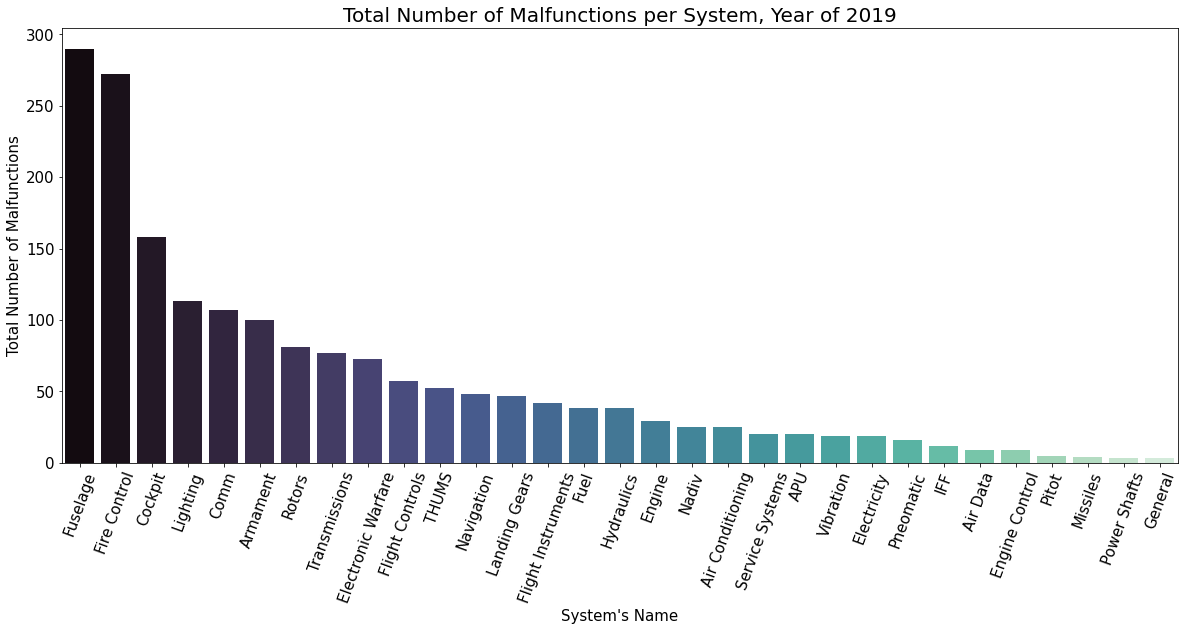

In [98]:
plot_malf_per_system(malf_df_2019, 2019)

Let's do the same for 2020:

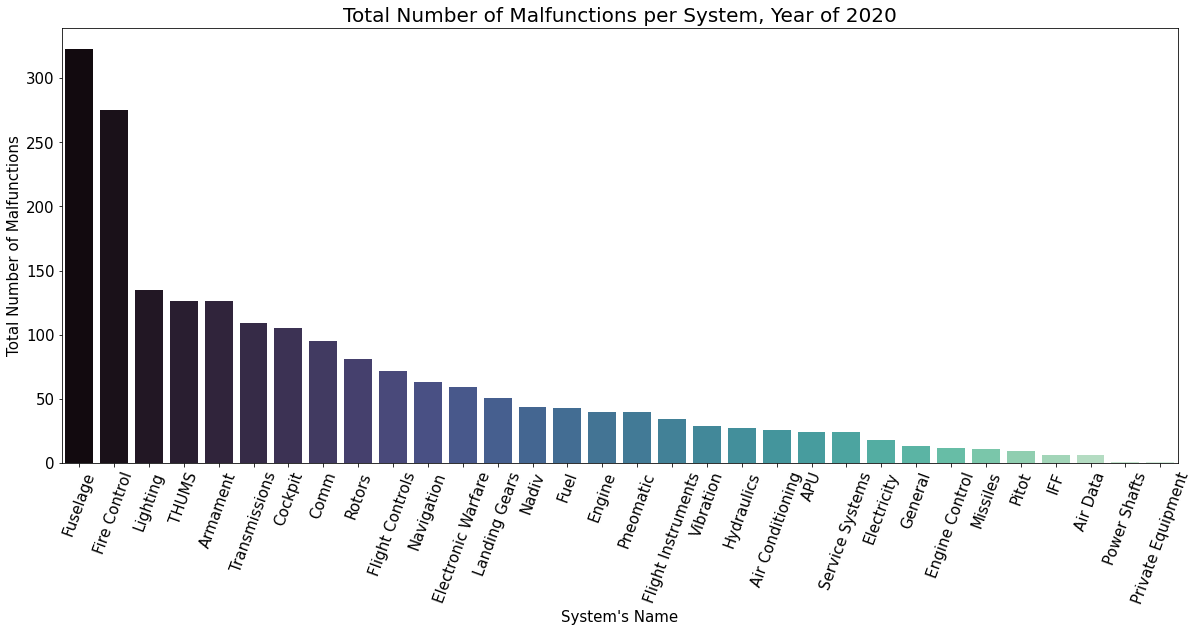

In [99]:
plot_malf_per_system(malf_df_2020, 2020)

***Discussion***

* We can easily see that both "Fuselage" and "Fire Control" systems are reported as having the greatest number of malfunctions for both 2019 and 2020. Moreover, the four next significant systems (in terms of the total number of malfunctions) are the same for both years ("Cockpit", "Lighting", "Armament", "Transmissions" and "Comm").

* In general, the total number and distribution of malfunctions (per system), are appear to be similar for 2019 and 2020. 
* As assumed, the distribution reflected from these diagrams is not a uniform one.
* Fire Control systems are mostly under class B avionics team resposiblity. The depicted data may urge thier move to a permanent abode in the squadron's heliport.

#### Total Number of Malfunctions per Tail Number (Bar Chart, 2019 / 2020)

Without pervious knowledge, we would assume (naively) that the number of malfunctions per tail number shall be relatively close. This assumption relies on the fact that by default the flight activities shall be shared equally as possible between all helicopters, to avoid surplus maintenance activities.

The following diagrams may confirm that assumption.

The following method is meant to prepare the plot's data, out of the given dataframes:

In [100]:
def prepare_data_for_malf_per_tail_number_plot(malf_df):
    # Calculate the number of malfunctions per tail number, then saved in a new Pandas series.
    tail_number_malf_df = pd.DataFrame(malf_df.groupby("Tail Number")["System"].count())

    # Reshape the dataframe.
    tail_number_malf_df.rename(columns={"System": "Number of Malfunctions"}, inplace = True)
    tail_number_malf_df.reset_index(inplace = True)
    return tail_number_malf_df

Now, let's use it to prepare our data for plotting:

In [101]:
tail_number_malf_df_2019 = prepare_data_for_malf_per_tail_number_plot(malf_df_2019)

tail_number_malf_df_2020 = prepare_data_for_malf_per_tail_number_plot(malf_df_2020)

The following method is meant to serve us when plotting the malfunctions per tail number graphs:

In [102]:
def plot_malf_per_tail_number(malf_df_2019, plot_2019_order_obj, malf_df_2020, plot_2020_order_obj, up_title, y_axis_title):
    # Create a plot comrised to two sub-plots.
    fig, axes = plt.subplots(1, 2, figsize=(25, 8))
    fig.suptitle(up_title, fontsize = 22)

    # Create 2019 subplot using Sea Born countplot.
    plot_2019 = sns.barplot(ax = axes[0],
                          x = "Tail Number",
                          y = "Number of Malfunctions",
                          data = malf_df_2019, 
                          order = plot_2019_order_obj,
                          palette = "mako")
    
    # Determine the sub-plot's titles.
    plot_2019.axes.set_title("2019", fontsize = 20)
    plot_2019.set_xlabel("Tail Number", fontsize = 15)
    plot_2019.set_ylabel(y_axis_title, fontsize = 15)
    plot_2019.tick_params(labelsize = 12)

    # Create 2020 subplot using Sea Born countplot.
    plot_2020 = sns.barplot(ax = axes[1],
                          x = "Tail Number", 
                          y = "Number of Malfunctions",
                          data = malf_df_2020, 
                          order = plot_2020_order_obj, 
                          palette = "mako")

    # Determine the sub-plot's titles.
    plot_2020.axes.set_title("2020", fontsize = 20)
    plot_2020.set_xlabel("Tail Number", fontsize = 15)
    plot_2020.set_ylabel(y_axis_title, fontsize = 15)
    plot_2020.tick_params(labelsize = 12)

And now, let's plot the data:

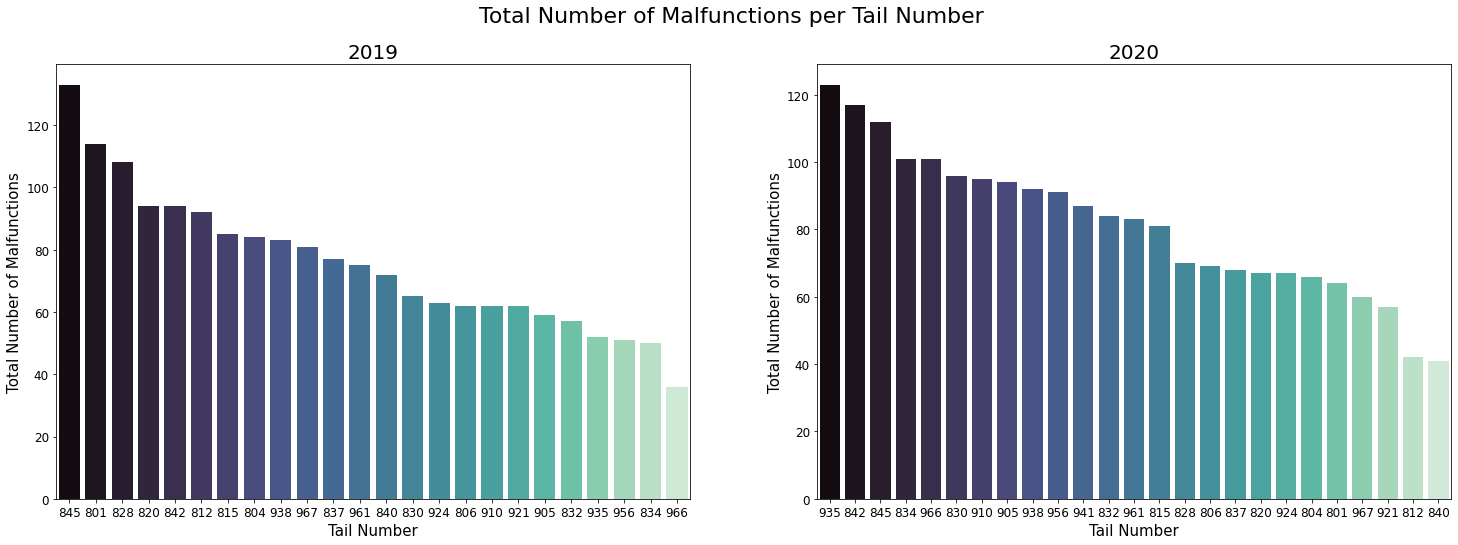

In [103]:
plot_malf_per_tail_number(tail_number_malf_df_2019, 
                          tail_number_malf_df_2019.sort_values("Number of Malfunctions",ascending = False)["Tail Number"], 
                          tail_number_malf_df_2020, 
                          tail_number_malf_df_2020.sort_values("Number of Malfunctions",ascending = False)["Tail Number"], 
                          "Total Number of Malfunctions per Tail Number", 
                          "Total Number of Malfunctions")

***Discussion***

* We can evident that the distribution of malfunctions among helicopters is not exactly uniform, although close to it (for some).
* Each year represents a different scheme; thus, a specific aircraft may have a great number of malfunctions in 2019 but a relatively small one in 2020 (Tail Number 935 for example). It seems that our naive assumption wasn't right.
* The immediate conclusion is that we shall normalize the number of malfunctions, considering different factors, starting with the flight hours each helicopter has flown in that year, assuming this factor impacts the aforementioned attribute.

#### Ttoal Number of Malfunctions per Flight Hour per Tail Number (Bar Chart, 2019 / 2020)

Following the previous section, we will normalize the total number of malfunctions per helicopter, using its annually flight hours.
Our current exceptation is to have a uniform distribution of malfunctions, based on the assumption that the number of malfunctions discoverd is somehow related to the time the helicopter has spent in air.

The following method is meant to prepare the plot's data, out of the given datasets:

In [104]:
def prepare_data_for_malf_per_flight_hour_per_tail_number_plot(flights_df, malf_df):
    # Calculate the flight duration per tail number, then saved in a new Pandas series.
    tail_number_flights_duration_df = pd.DataFrame(flights_df.groupby("Tail Number")["Flight Duration"].sum())
    tail_number_flights_duration_df = pd.to_numeric(tail_number_flights_duration_df["Flight Duration"].dt.total_seconds()//3600)

    # Calculate the number of malfunctions per tail number, then saved in a new Pandas series.
    tail_number_malf_df = pd.DataFrame(malf_df.groupby("Tail Number")["System"].count())
    tail_number_malf_df.index = pd.to_numeric(tail_number_malf_df.index)

    # Apply a join operation, to join the two dataframes. 
    tail_number_malf_df = tail_number_malf_df.join(tail_number_flights_duration_df)

    # Drop NaN values, since a helicopter (941 in this case()) may have been grounded, due to severe maintenance problems.
    tail_number_malf_df.dropna(inplace = True)
    
    # Save a raw version of the dataframe, for extracting intresting data.
    tail_number_malf_raw_df = tail_number_malf_df.copy(deep = True)

    # Calculate the number of malfunctions per flight hour for each tail number.
    tail_number_malf_df["System"] = tail_number_malf_df.iloc[:, 0] / tail_number_malf_df.iloc[:, 1]

    # Reshape the dataframe.
    tail_number_malf_df.rename(columns={"System": "Number of Malfunctions"}, inplace = True)
    tail_number_malf_df.drop(columns=['Flight Duration'], inplace = True)
    tail_number_malf_df.reset_index(inplace = True)
    return tail_number_malf_raw_df, tail_number_malf_df

Now, let's use it to prepare our data for plotting:

In [105]:
tail_number_malf_raw_df_2019, tail_number_malf_df_2019 = \
    prepare_data_for_malf_per_flight_hour_per_tail_number_plot(flights_df_2019, malf_df_2019)

tail_number_malf_raw_df_2020, tail_number_malf_df_2020 = \
    prepare_data_for_malf_per_flight_hour_per_tail_number_plot(flights_df_2020, malf_df_2020)

Now, let's make use in the already defined method to plot the data:

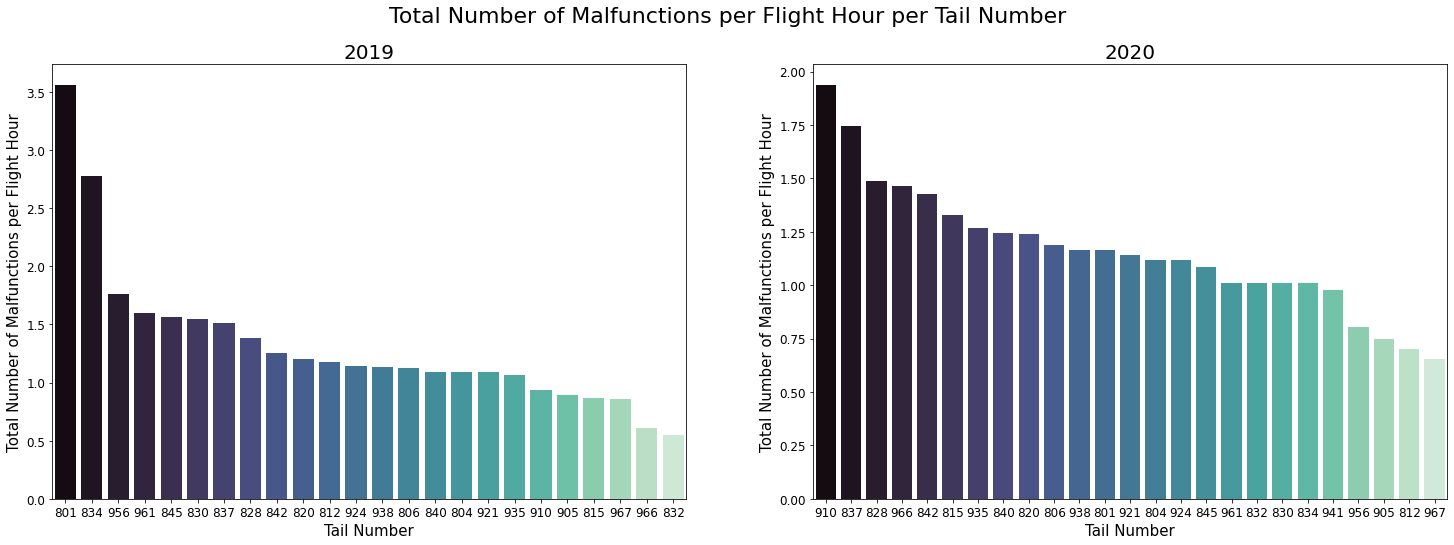

In [106]:
plot_malf_per_tail_number(tail_number_malf_df_2019, 
                          tail_number_malf_df_2019.sort_values("Number of Malfunctions",ascending = False)["Tail Number"],
                          tail_number_malf_df_2020, 
                          tail_number_malf_df_2020.sort_values("Number of Malfunctions",ascending = False)["Tail Number"],
                          "Total Number of Malfunctions per Flight Hour per Tail Number", 
                          "Total Number of Malfunctions per Flight Hour")

***Discussion***

* We can evident that even after taking into account the flight hours each helicopter has flown, the distribution of malfunctions among helicopters is not uniform (altough 2020 graph presents a better ditribution among helicopters). Thus, we shall further look for other factors which may impact this issue.
* By comparing the two plots, we can see that specific helicopters (such as the 967) preserve a small number of malfunctions considering their flight time, during both years.
* Most of the helicopters have at least a ratio of 1:1 - one malfunction per one flight hour!
* Although seemed reasonable at start, having the same graph for the mean time spending on ground (between flights) is irrelevant. As stated above, all the maintenance routines and malfunctions handling procedures take place while the helicopters on ground. Based on that fact, we can easily argue that a helicopter spends more time on ground if it has an increasing number of malfunctions, and vice versa. Thus, the need for that graph is superfluous.

#### Malfunctions' Types Cross Tail Numbers Heatmap (2019 & 2020)

After discussing the total number of malfunctions per helicopter, we would like to cross all the reported malfunctions families (systems) with the different helicopters. This view will allow us to understand if specific helicopters have more malfunctions of a specific type than others, as well as how these malfunctions distribute among helicopters. 

First, we will present the data as is - in a way that allows specific family to influence all other. Then, we will present a more accurate view on this topic, while using normalization.

Let's start by reshaping our data:

In [107]:
# Concatenate 2019 and 2020 malfunctions data. Then, group the relavent data, into a new dataframe.
tail_number_malf_df = pd.concat([malf_df_2019, malf_df_2020])
tail_number_malf_df = pd.DataFrame(tail_number_malf_df.groupby(["Tail Number", "System"])["System"].count())  

# Rename the columns' names, and reset the index.
tail_number_malf_df.rename(columns={"System": "Number of Malfunctions"}, inplace = True)
tail_number_malf_df.reset_index(inplace = True)

# Create the required pivot table.
tail_number_malf_df = tail_number_malf_df.pivot(index="Tail Number", columns="System")["Number of Malfunctions"]

# Discard NaNs.
tail_number_malf_df.fillna(0, inplace = True)

# Transpose the dataframe, to ease the reader.
tail_number_malf_df = tail_number_malf_df.transpose()

Now, Let's present the un-normalized heat map:

<AxesSubplot:xlabel='Tail Number', ylabel='System'>

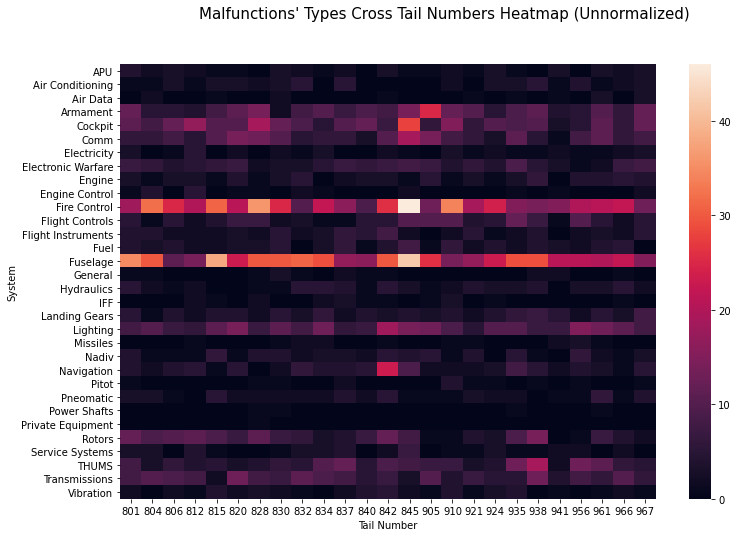

In [108]:
# Plot the data.
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle("Malfunctions' Types Cross Tail Numbers Heatmap (Unnormalized)", fontsize = 15)
sns.heatmap(tail_number_malf_df)

***Discussion***

* Fuselage and Fire Control are indeed the most defected systems on board (as observed in the first EDA section).
* There are specific helicopters with more severe recurrences of malfunctions, referring the aforementioned systems.
* Tail numbers 935 and 966 are seemed to perform better, having less Fuselage and Fire Control malfunctions.

Now, let's normalize the data, getting a better chance to understand if a specific helicopter is more problematic than others:

<AxesSubplot:xlabel='Tail Number', ylabel='System'>

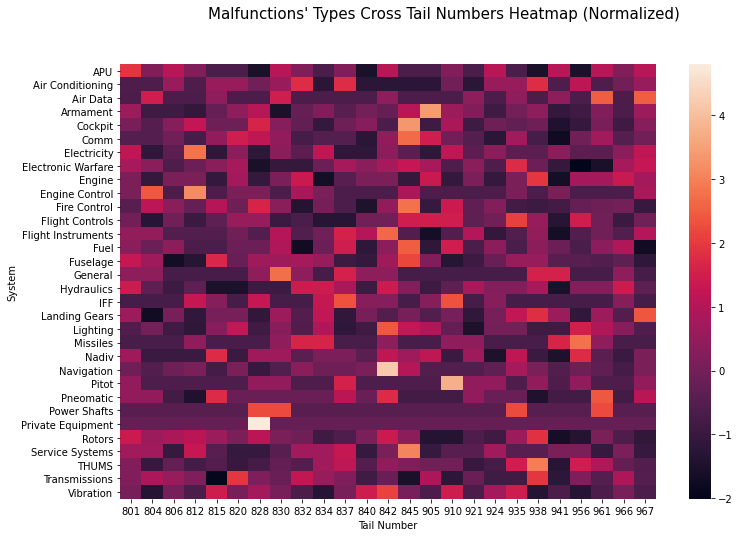

In [109]:
# Transponse the dataframe again, before applying the normalization.
tail_number_malf_df = tail_number_malf_df.transpose()

# Normalize (column-wise).
tail_number_malf_df = (tail_number_malf_df - tail_number_malf_df.mean()) / tail_number_malf_df.std()

# Transpose again, before plotting.
tail_number_malf_df = tail_number_malf_df.transpose()

# Plot.
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle("Malfunctions' Types Cross Tail Numbers Heatmap (Normalized)", fontsize = 15)
sns.heatmap(tail_number_malf_df)

***Discussion***

* The depicted data is a very noisy one. It seems that there is no specific helicopter which has a noticeable  cross-system problems.

#### Total Number of Malfunctions per Overall Flights' Duration (Joint Plot, 2019 & 2020)

Not once I faced with the assumption that "helicopters who flies much suffer much", meaning if you fly more, you are expected to have an increased number of malfunctions. Of course, an opposite assumption exists too. It mostly depends on who you met, and what his mood is today.

Thus, in this section, we would like to examine if there is a linear correlation between the overall flights duration, and the total number of malfunctions. This will be done using last section's data (per the given tail numbers’ flights and reported malfunctions serving as the data samples).

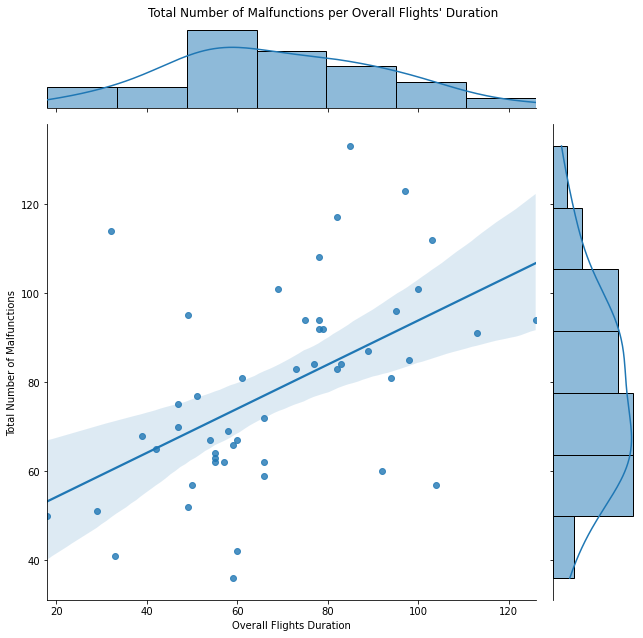

In [110]:
# Concatenate the two dataframes to form a single dataframe to sample from.
malf_per_flight_duration_df = pd.concat([tail_number_malf_raw_df_2019, tail_number_malf_raw_df_2020], ignore_index=True)
malf_per_flight_duration_df.rename(columns={"System": "Total Number of Malfunctions", 
                                            "Flight Duration": "Overall Flights Duration"}, inplace = True)
  
# Create the plot, using Sea Born joint plot.
plot = sns.jointplot(x = "Overall Flights Duration", y = "Total Number of Malfunctions", data = malf_per_flight_duration_df, 
                     palette="Set1", kind="reg", height = 9)
# Add a title.
plot.fig.suptitle("Total Number of Malfunctions per Overall Flights' Duration")
plot.fig.subplots_adjust(top=0.95) 

Person correlation coefficient for the given samples is:

In [111]:
print("The Person Correlation Coefficient is: {0:.2f}".format(
                                                    np.corrcoef(malf_per_flight_duration_df.iloc[:, 0], 
                                                                malf_per_flight_duration_df.iloc[:, 1])[0][1]))

The Person Correlation Coefficient is: 0.52


***Discussion***

* There is a moderate positive linear correlation between the two. The graph presents a noisy picture, although preserves the anticipated correlation.
* We can't jump to conclusions yet and argue (for example) that a long overall flights' duration cause more malfunctions to occur. A competing assumption could be that because spending more time in air, the air crew may have the chance to report more malfunctions. This issue is left for the technical department to further investigation.

#### Number of Hours Between Reported Malfunctions per Tail Number (Box Plot, 2019 / 2020)

In this section we will introduce box plots to depict the statistics (Q1, Q2, Q3, Q4) of time intervals (measured in hours) for any 2 consecutive malfunctions reported, per helicopter.

First, we will process the given dataframes, to extract the required parameters:

In [112]:
# This method is meant to split the malf dataframe into two separted dataframes: one for Winter, and the second for Summer.
# This split is needed since we have a big gap (3 months) between Winter and Summer, which may affect the difference operation.
def split_malf_df_to_summer_and_winter_times(malf_df, datetime_winter_criterion):
    # Get malfunctions reported during the Winter.
    malf_winter_time_df = pd.DataFrame(malf_df.loc[malf_df["Registration Time"] <= datetime_winter_criterion])
    
    # Get malfunctions reported during the Summer.
    malf_summer_time_df = pd.DataFrame(malf_df.loc[malf_df["Registration Time"] > datetime_winter_criterion])
    
    return malf_winter_time_df, malf_summer_time_df

# This method is responsible for adding an interval column. 
# This column values will refer to the time difference between any two consecutive malfunctions.
# This will be made using the "Registration time" attribute. 
def calculate_time_intervals_between_registered_malfunctions(malf_df):
    # Calculate the diff, adding an additional column for the results.
    malf_df["Interval"] = \
        malf_df.sort_values(["Tail Number","Registration Time"]).groupby("Tail Number")["Registration Time"].diff()
    
    # Drop NaN values, origned from the first report for each helicopter.
    malf_df.dropna(inplace = True)
    
    # Shape the dataframe.
    malf_df.drop(columns = ["System", "Sub-System", "Registration Time",
                            "Closing Time", "Validated?", "Register Profession", 
                            "Closer Profession", "Malfunction Handling Duration"], inplace = True)
    malf_df["Interval"] = pd.to_numeric(malf_df["Interval"].dt.total_seconds()//3600)
    
# This method will utilize the aforementioned methods, calculating the mean time between reported malfunctions per tail number.
def perpare_data_for_time_between_malf_per_tail_number_plot(malf_df, datetime_winter_criterion):
    # Split Dataframe.
    malf_winter_time_df, malf_summer_time_df = split_malf_df_to_summer_and_winter_times(malf_df, datetime_winter_criterion)
    
    # Calculate the time intervales between any two consecutive malfunctions (per tail number).
    calculate_time_intervals_between_registered_malfunctions(malf_winter_time_df)
    calculate_time_intervals_between_registered_malfunctions(malf_summer_time_df)
    
    # Concatenate to a unified dataframe.
    output_df = pd.concat([malf_winter_time_df, malf_summer_time_df])
    
    return output_df

An handy method to plot the data:

In [113]:
def plot_time_between_malf_per_tail_number(malf_df, year):
    # Determine the plot's size.
    plt.figure(figsize=(20, 8))
    
    # Plot the data.
    plot = sns.boxplot(x = "Tail Number", y = "Interval", data = malf_df, showfliers = False, palette = "Set3")
    
    # Modify plot design and lables.
    plot.set_title("Number of Hours Between Reported Malfunctions per Tail Number, {0}".format(year), fontsize = 20)
    plot.set_xlabel("Tail Number", fontsize = 15)
    plot.set_ylabel("Hours", fontsize = 15)
    plot.tick_params(labelsize = 13)

Let's plot the data for 2019:

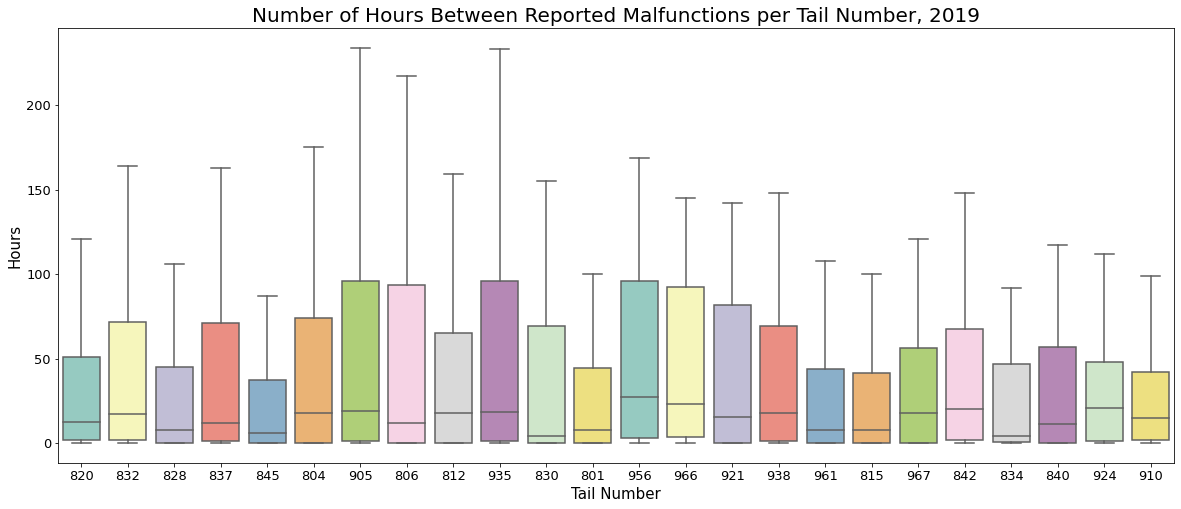

In [114]:
output_df_2019 = perpare_data_for_time_between_malf_per_tail_number_plot(malf_df_2019, dt.datetime(2019,2,28))
plot_time_between_malf_per_tail_number(output_df_2019, 2019)

And now, for 2020: 

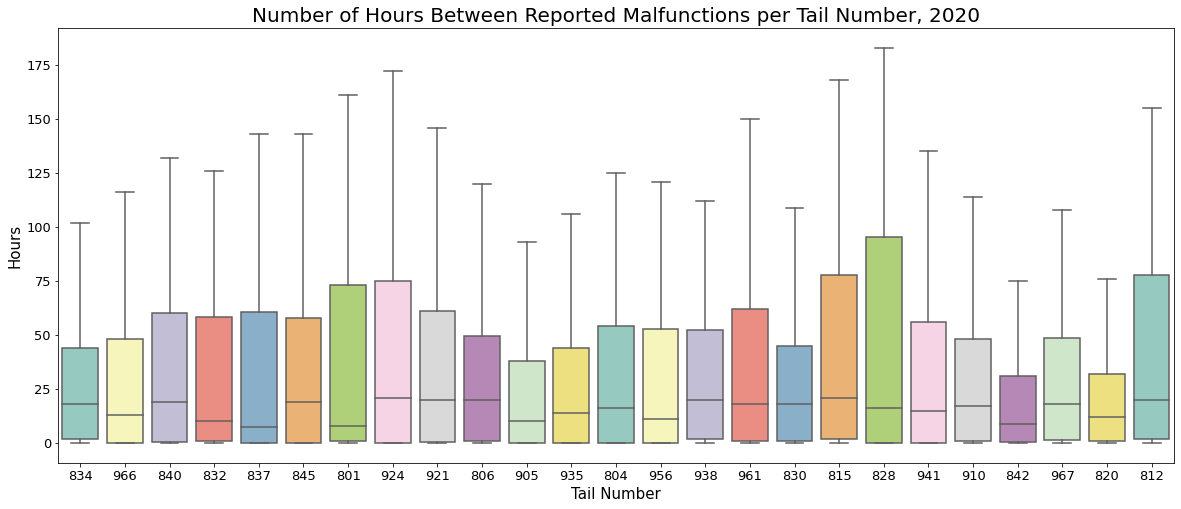

In [115]:
output_df_2020 = perpare_data_for_time_between_malf_per_tail_number_plot(malf_df_2020, dt.datetime(2020,2,29))
plot_time_between_malf_per_tail_number(output_df_2020, 2020)

***Discussion***

* The mean time between failures (malfunctions) is relatively small, for all helicopters (~20 hours).
* 75% of malfunctions are being reported within the first ~80 hours after the pervious malfunction has been reported.
* Obiously, the forseen distribution is not the same for 2019 and 2020. Thus, there is not much to gain from comparing the two graphs.  
* It is intresting to evident that for some helicopters (such as the 828 and 812 at 2020) the mean is so far from Q3 and Q4. It is recomnded for the technical department to investigate what had happend to these helicopters during the reported time frames.
* Since some malfunctions are being reported once after the other (this is a sequential process by default), Q1 amplitude is small (almost un-noticeable).

#### Distribution of Malfunctions per Register's Profession (Pie Chart, 2019 & 2020)

This section is intended to clarify the proportion between the malfunctions' registers' professions.

Let's reshape our data, combining 2019 and 2020 together: 

In [116]:
# Concatenate 2019 and 2020 malfunctions data. Then, group the relavent data, into a new dataframe.
register_profession_malf_df = pd.concat([malf_df_2019, malf_df_2020])
register_profession_malf_df = pd.DataFrame(register_profession_malf_df.groupby
                                           (["Register Profession"])["System"].count())  

# Rename the column's name.
register_profession_malf_df.rename(columns={"System": "Number of Malfunctions"}, inplace = True)

Now, let's plot the data:

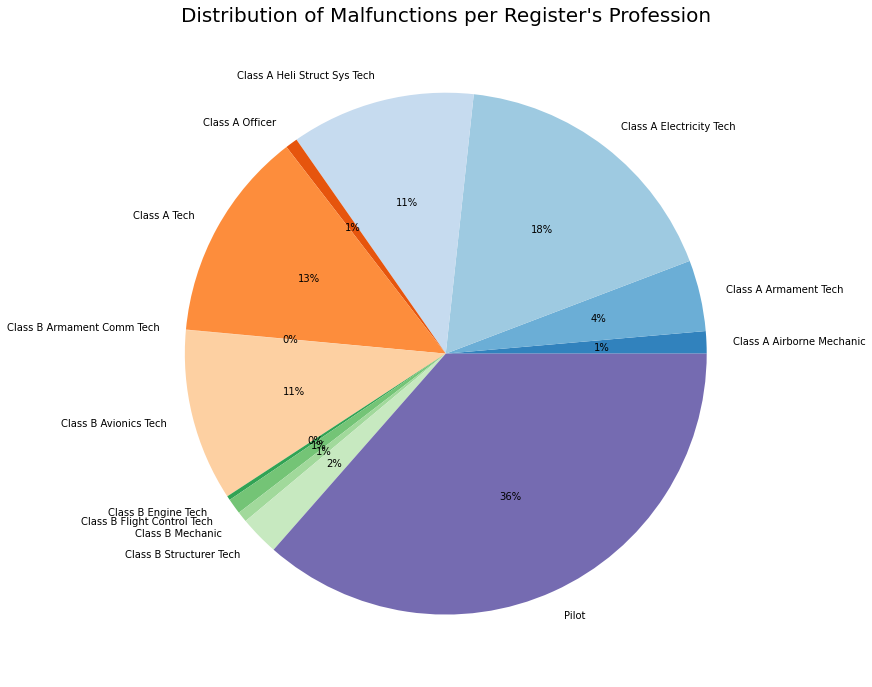

In [117]:
# Plot the data.
plot = register_profession_malf_df.plot.pie(y = 'Number of Malfunctions', figsize=(12, 12), 
                                            autopct='%1.0f%%', colors=plt.cm.tab20c.colors)

plot.set_title("Distribution of Malfunctions per Register's Profession", fontsize = 20)
plot.set_ylabel("", fontsize = 15)
plot.get_legend().remove()

***Discussion***

* Pilots are the ones responsible for registering the greatest number of malfunctions (~37% of malfunctions). This evident consistent with our prior discover - more malfunctions are being reported as the total flight duration is greater.
* As anticipated, class A technicians are responsible for registering most of the other faults.
* Class B avionics team is responsible for ~10% precent of the reported faults.

#### Distribution of Unverified Malfunctions' Types (Pie Chart, 2019 / 2020)

This section is meant to present the distribution of unverified malfunctions' types, using a pie chart.

First, let's calculate the percentage of unverified malfunctions:

In [118]:
# A common method for printing the percentage of unverified malfunctions.
def print_unver_malf_precentage(malf_df, year):
    print("Unverified malfunctions percentage for {0}: {1:.2f} %".format(year, 
                                                                     len(malf_df.loc[malf_df["Validated?"] == False].index) / 
                                                                     len(malf_df.index) * 100))
# Print the values for 2019 and 2020.    
print_unver_malf_precentage(malf_df_2019, 2019)
print_unver_malf_precentage(malf_df_2020, 2020)

Unverified malfunctions percentage for 2019: 10.27 %
Unverified malfunctions percentage for 2020: 9.86 %


We assume that most of the unverified malfunctions were registered by pilots. Let's verify this assumption:

In [119]:
# A common method for printing the percentage of unverified malfunctions that were registered by pilots.
def print_unver_malf_pilots_precentage(malf_df, year):
    # Shape the dataframe to get each register's profession share.
    register_prof_unver_malf = malf_df.loc[malf_df["Validated?"] == False] \
                                            .groupby(["Register Profession"])["Validated?"].count()

    print("Pilots' share in unverified malfunctions reports in {0}: {1:.2f} %".format \
                                            (year, (register_prof_unver_malf["Pilot"] / register_prof_unver_malf.sum()) * 100))

# Print the values for 2019 and 2020.
print_unver_malf_pilots_precentage(malf_df_2019, 2019)
print_unver_malf_pilots_precentage(malf_df_2020, 2020)

Pilots' share in unverified malfunctions reports in 2019: 81.18 %
Pilots' share in unverified malfunctions reports in 2020: 76.00 %


Our assumption was validated.

Now, let's reshape the dataframe to present the unverified malfunctions' types distribution.

In [120]:
def prepare_data_for_dis_unver_malf_system_plot(malf_df):
    # Shape the dataframe to extract the unverified malfunctions' types count.
    dis_unver_malf_system_df = malf_df.loc[malf_df["Validated?"] == False] \
                                                .groupby(["System"])["Validated?"].count()
    
    # Sort, in order to have a better visual view (for plotting).
    dis_unver_malf_system_df.sort_values(inplace = True, ascending = False)
    
    return dis_unver_malf_system_df
    
dis_unver_malf_system_df_2019 = prepare_data_for_dis_unver_malf_system_plot(malf_df_2019)
dis_unver_malf_system_df_2020 = prepare_data_for_dis_unver_malf_system_plot(malf_df_2020)

An handy method to plot the data:

*Please note that just the 26 (out of 31) most significant systems (in terms of the number of reported malfunctions) will be plotted, in order to reduce the visual load. It was verified that the omitted systems contribute less than ~ 1% to the reported malfunctions.*

In [121]:
def plot_dis_unver_malf_system(dis_unver_malf_system_df, year):
    plot = dis_unver_malf_system_df.head(26).plot.pie(y = 'System', figsize=(12, 12),
                                                           autopct='%1.0f%%', colors=plt.cm.tab20c.colors)
    plot.set_title("Distribution of Unverified Malfunctions' Types, {0}".format(year), fontsize = 20)
    plot.set_ylabel("", fontsize = 15)

Now, let's plot the data for 2019:

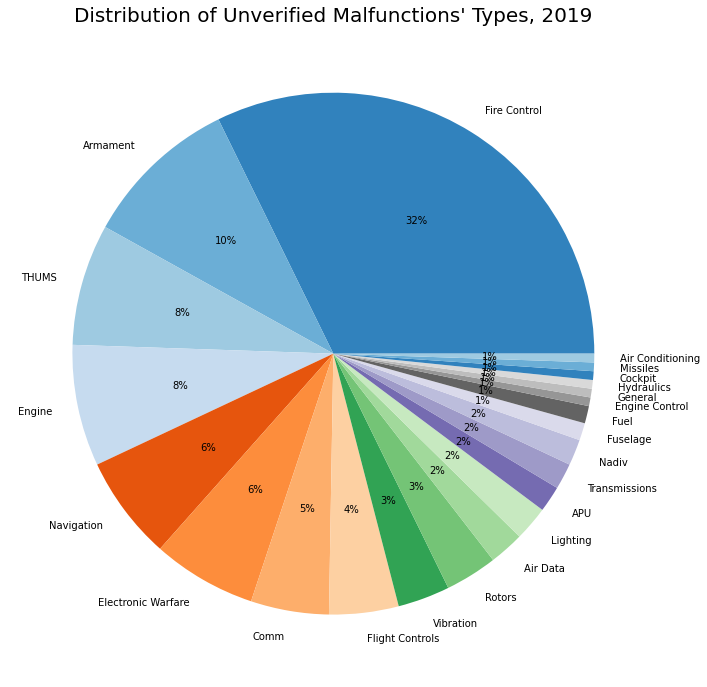

In [122]:
plot_dis_unver_malf_system(dis_unver_malf_system_df_2019, 2019)

And now for 2020:

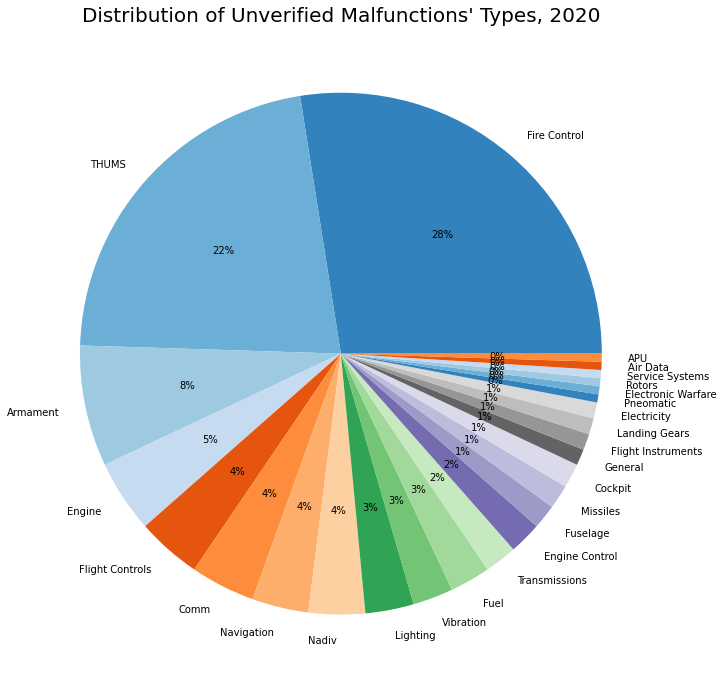

In [123]:
plot_dis_unver_malf_system(dis_unver_malf_system_df_2020, 2020)

***Discussion***

* A great share of the unverified malfunctions is for the Fire Control system. This combined with the fact that most unverified malfunctions were reported by pilots lead to one of two assumptions:
    * These reported malfunctions are due to a momentary fault in air.
    * The pilots do not describe the malfunction satisfactorily, thus the avionics team fails in reproduce them on ground.
 
 In any case, the derived conclusion is to verify the malfunctions on ground, just before shutting-off the helicopter, with the avionics team members.
 
 
* It is left for the squadron (since this data was not provided) to investigate which part of the unverified fire control malfunctions were reopened.
* The THUMS system appears to have been more damaged during 2020 than it was in 2019. In any case, this system performs its operations automatically, and cannot be reset in the air. Thus, it is assumed that the reported faults are related to some inconsistency embedded in the system.

#### Distribution of Types of Malfunctions Reported by Pilots (Pie Chart, 2019 & 2020)

This section is intended to show the distribution of types of malfunctions reported by pilots.

Let's reshape our data, combining 2019 and 2020 together: 

In [124]:
# Concatenate 2019 and 2020 malfunctions data. Then, group the relavent data, into a new dataframe.
pilots_reported_malf_df = pd.concat([malf_df_2019, malf_df_2020])
pilots_reported_malf_df = pd.DataFrame(pilots_reported_malf_df.loc[pilots_reported_malf_df["Register Profession"] ==
                                                                   "Pilot"].groupby(["System"])["System"].count())  

# Rename the column's name.
pilots_reported_malf_df.rename(columns={"System": "Number of Malfunctions"}, inplace = True)

# Sort, in order to have a better visual view (for plotting).
pilots_reported_malf_df.sort_values(by = "Number of Malfunctions", inplace = True, ascending = False)

Not, let's plot the data:

*Please note that just the 26 (out of 31) most significant systems (in terms of the number of reported malfunctions) will be plotted, in order to reduce the visual load. It was verified that the omitted systems contribute less than ~ 1% to the reported malfunctions.*

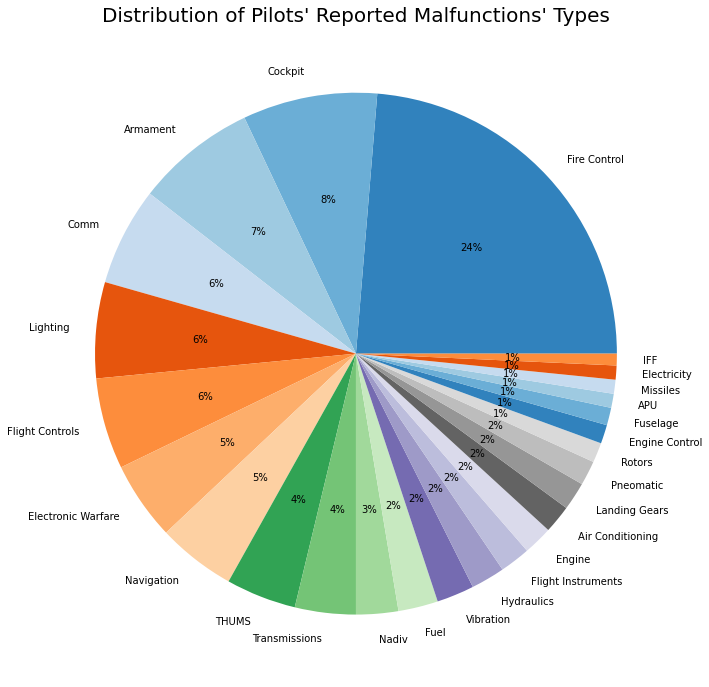

In [125]:
# Plot the data.
plot = pilots_reported_malf_df.head(26).plot.pie(y = 'Number of Malfunctions', figsize=(12, 12), 
                                            autopct='%1.0f%%', colors=plt.cm.tab20c.colors)

plot.set_title("Distribution of Pilots' Reported Malfunctions' Types", fontsize = 20)
plot.set_ylabel("", fontsize = 15)
plot.get_legend().remove()

***Discussion***

* A large part of the faults reported by pilots are of systems that they use frequently (such as: Fire Control).
* Recall that one of the first findings we found at the EDA stage is that malfunctions in the fuselage are the most common. From this it is easy to assume that since the pilots do not conduct inspection routines concerning the fuselage, they also do not report any malfunctions in it.
* The issue of Fire Control system is repeated throughout the EDA (in all the relevant sections we have chosen to examine so far). The direct recommendation, as a result, is to conduct comprehensive inspection processes in the squadron, in order to reduce the total number of faults (including the unverified ones) of this system. 

#### Distribution of Malfunctions' Types, Ramon and Ramat David AFB (Pie Chart, 2019 & 2020)

This section is intended to show the distribution of malfunctions' types, per the parking location (Ramon / Ramat David).

Let's reshape our data, combining 2019 and 2020 together: 

In [126]:
# Concatenate 2019 and 2020 malfunctions and parking data.
unified_malf_df = pd.concat([malf_df_2019, malf_df_2020])
unified_parking_df = pd.concat([parking_df_2019, parking_df_2020])   

# Change the "Registration Time" to include just the date, omitting the specific time.
unified_malf_df['Registration Time'] = unified_malf_df['Registration Time'].dt.normalize()

# Merge (join) the two dataframes, to have a parking location next to each record.
unified_malf_parking_df = unified_malf_df.merge(unified_parking_df,  how='inner',
                                        left_on=['Tail Number','Registration Time'], right_on = ['Tail Number','Date'])

An handy method to plot the data:

In [127]:
def plot_dis_malf_system(unified_malf_parking_df, location, title):
    # Group the data per system for defined location.
    plot_df = pd.DataFrame(unified_malf_parking_df.loc[unified_malf_parking_df["Parking Location"] ==
                                                       location].groupby(["System"])["System"].count())  

    # Rename the column's name.
    plot_df.rename(columns={"System": "Number of Malfunctions"}, inplace = True)
    
    # Sort, in order to have a better visual view (for plotting).
    plot_df.sort_values(by = "Number of Malfunctions", inplace = True, ascending = False)
    
    # Plot the data.
    plot = plot_df.head(26).plot.pie(y = 'Number of Malfunctions', figsize=(12, 12),
                                            autopct='%1.0f%%', colors=plt.cm.tab20c.colors)
    
    # Modify plot design and lables.
    plot.set_title("Distribution of Malfunctions' Types, {0}".format(title), fontsize = 20)
    plot.set_ylabel("", fontsize = 15)
    plot.get_legend().remove()

Now, let's plot the data for Ramon Air Force Base:

*Please note that just the 26 (out of 31) most significant systems (in terms of the number of reported malfunctions) will be plotted, in order to reduce the visual load. It was verified that the omitted systems contribute less than ~ 1% to the reported malfunctions.*

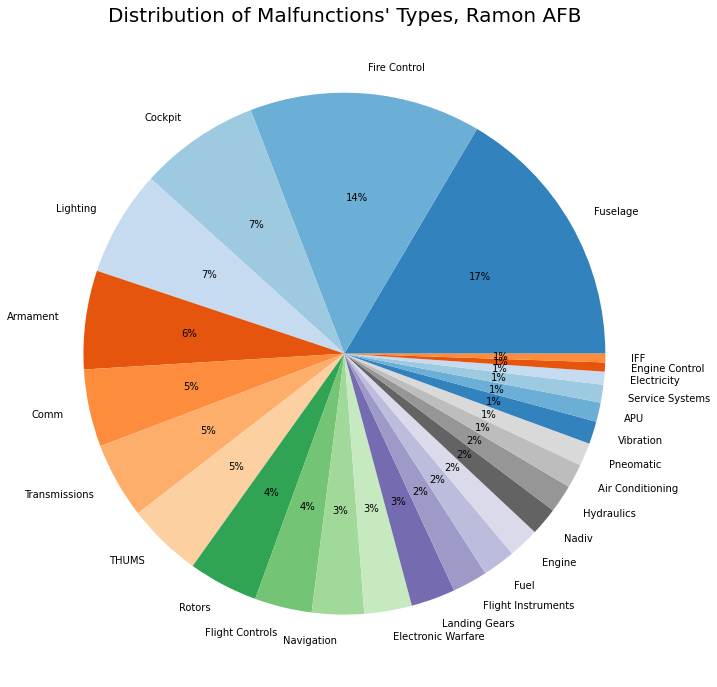

In [128]:
plot_dis_malf_system(unified_malf_parking_df, 25, "Ramon AFB")

And now, for Ramat David Air Force Base:

*Please note that just the 26 (out of 31) most significant systems (in terms of the number of reported malfunctions) will be plotted, in order to reduce the visual load. It was verified that the omitted systems contribute less than ~ 1% to the reported malfunctions.*

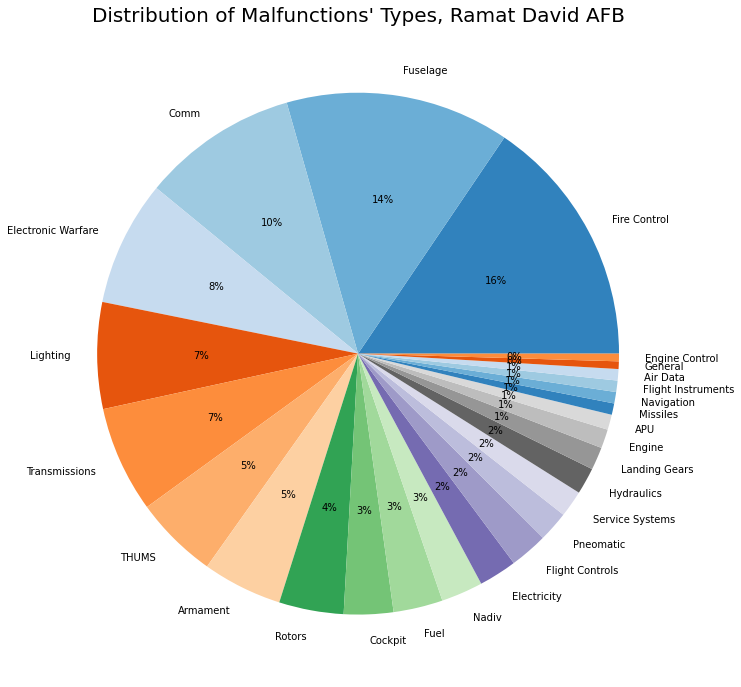

In [129]:
plot_dis_malf_system(unified_malf_parking_df, 1, "Ramat David AFB")

***Discussion***

* The most important finding from these cake charts is that at Ramat David Air Force Base the share of Comm and Electric Warfare malfunctions is much more signifcant (almost twice as much). We can assume that the reason for this lies in the fact that these systems are tested more frequently (the purpose of parking at this base is operational readiness).
* It is recommended to encourage the pilots to conduct the same tests at the Ramon Air Force Base as well. It is always better to fly with a functioning system.

#### Number of Hours for Handling a Malfunction per Type, Ramon and Ramat David AFB (Box Plot, 2019 & 2020)

In this section we will introduce box plots to depict the statistics (Q1, Q2, Q3, Q4) of time intervals (measured in hours) for handling a malfunction (per system). We will present a dedicated plot for each of our two parking locations.

Let's reshape our data:

In [130]:
# Convert the malfunction handling duration to hours.
unified_malf_parking_df["Malfunction Handling Duration"] = \
    pd.to_numeric(unified_malf_parking_df["Malfunction Handling Duration"].dt.total_seconds()//3600)

# Drop some irrelevant columns. 
unified_malf_parking_df.drop(columns=['Tail Number', 'Sub-System', 'Registration Time', 'Closing Time',
                                      'Validated?', 'Register Profession', 'Closer Profession'], inplace = True)

# Omit the "General" system records, since them putting some noise to the data.
# This category is not important because it contains less than 10 records + it shall not host any records (theoretically).
unified_malf_parking_df.drop(unified_malf_parking_df.loc[unified_malf_parking_df["System"] == "General"].index, inplace = True)

An handy method to plot the data:

In [131]:
def plot_hand_interval_malf_system(unified_malf_parking_df, location, title):
    # Determine the plot's size.
    plt.figure(figsize=(20, 8))
    
    # Plot the data.
    plot = sns.boxplot(x = "System", y = "Malfunction Handling Duration",
                        data = unified_malf_parking_df.loc[unified_malf_parking_df["Parking Location"] == location],
                        showfliers = False, palette = "Set3")
    
    # Modify plot design and lables.
    plot.set_title("Number of Hours for Handling a Malfunction per Type, {0}".format(title), fontsize = 20)
    plot.set_xlabel("System's name", fontsize = 16)
    plot.set_ylabel("Interval (Hours)", fontsize = 16)
    plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
    plot.tick_params(labelsize = 13)

Now, let's plot the data for Ramon Air Force Base:

*Please note that the "General" system was omitted from that plot, since it put some noise.
In general, this category is not important because it contains less than 10 records + it shall not host any records (theoretically).*

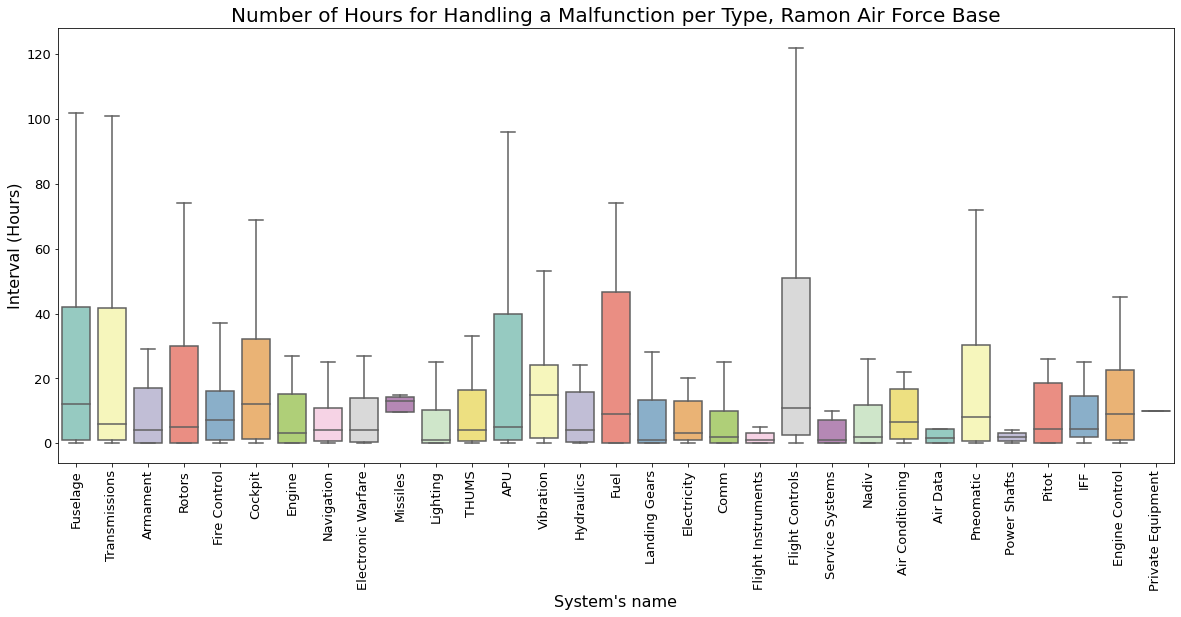

In [132]:
plot_hand_interval_malf_system(unified_malf_parking_df, 25, "Ramon Air Force Base")

And now, for Ramat David Air Force Base:

*Please note that the "General" system was omitted from that plot, since it put some noise.
In general, this category is not important because it contains less than 10 records + it shall not host any records (theoretically).*

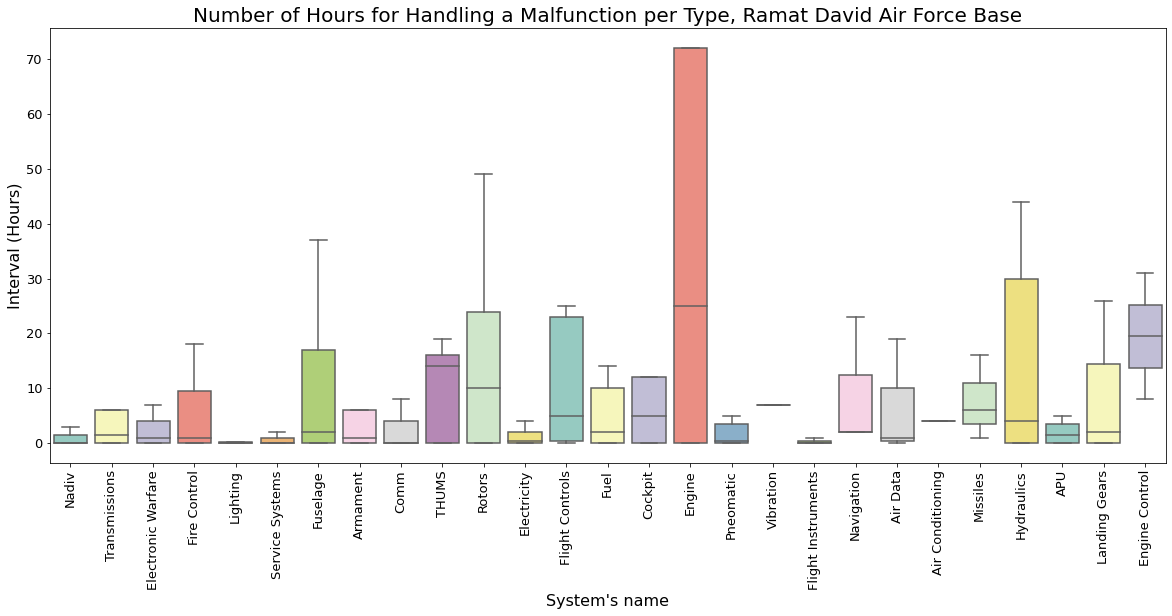

In [133]:
plot_hand_interval_malf_system(unified_malf_parking_df, 1, "Ramat David Air Force Base")

***Discussion***

* In both locations, some samples show fault handling time close to zero hours. It can be assumed that this is a bad documentation culture - the malfunction is being registered and closed, after it has already been fixed.
* It takes much more time (in average) to fix engine faults at Ramat David. This can be explained by the fact that Class B engine technicians are not present at Ramat David.
* The same as the above applies to rotor malfunctions.
* Since some spare parts are not present at Ramat David, the fastest handling intervals for specific systems are slower than in Ramon. for example: malfunctions reported for Navigation and Air Data systems.

### 4.2 Malfunctions and Weather Phenomena

#### 4.2.2.1 Understanding the Weather Variables

Before we start analyzing the effect of weather variables on faults, we will examine the weather variables on a monthly basis. This will help us better understand these, as well as decide which variables to use later in the analysis.

We will start by examine the correlation between the different weather variables (for "NEWE YAAR" station, which is assummed to have more rain samples). To do so, we will use a pair plot:

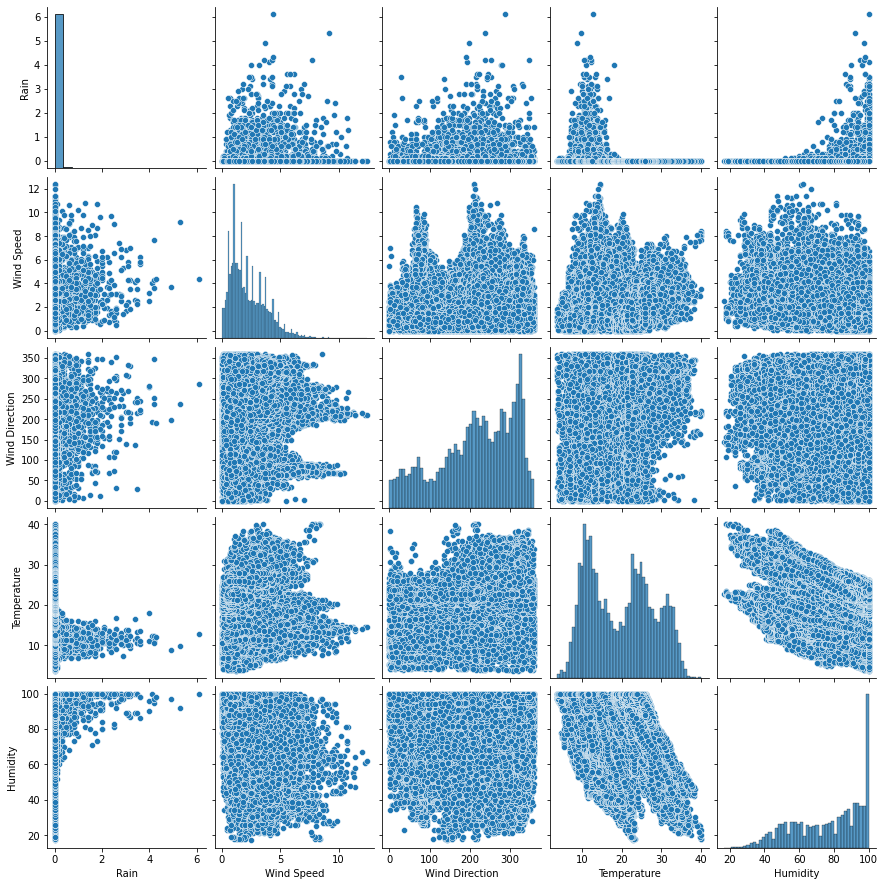

In [134]:
# Concatenate 2019 & 2020 weather data.
unified_meterological_df = pd.concat([meterological_df_2019, meterological_df_2020])

# Retrive only "NEWE YAAR" data samples.
unified_meterological_df = unified_meterological_df.loc[unified_meterological_df["Station Name"] == "NEWE YAAR"]

# Drop unneeded columns.
unified_meterological_df = unified_meterological_df.drop(columns = ["Time", "Station Name"])

# Plot.
sns.pairplot(unified_meterological_df)

We can see that the only linear correlation described from the plot above is that of temperature and humidity. The linear correlation described appears moderate, so we will save the two variables for the benefit of our later analysis.

Now, we would like to proceed and present a monthly review of the weather variables for "SEDE BOQER" and "NEWE YAAR" stations.

The following methods are meant to reshape the meteorological dataframe, and to compact the required variables into a monthly level:

In [135]:
def is_rainy(value):
    if value > 0:
        return 1
    return 0


def count_raining_days(meterological_df):
    # Group the data by day.
    meterological_df = meterological_df.groupby([pd.Grouper(key='Station Name'), 
                                                                                 pd.Grouper(freq='D', key='Time')]).agg(
                                                                                {'Rain': "sum",
                                                                                 'Wind Speed': "mean",
                                                                                 'Wind Speed 2': "max",
                                                                                 'Wind Direction': 'mean',
                                                                                 'Temperature': "mean",
                                                                                 'Temperature 2': "min",
                                                                                 'Temperature 3': "max",
                                                                                 'Humidity': "mean"})
    
    # Assign for each day whether it was rainy or not.
    meterological_df["Rainy Day"] = meterological_df.apply(lambda row: is_rainy(row['Rain']), axis=1)
    
    # Reset the index because it is not significant to this process.
    meterological_df.reset_index(inplace = True)
    
    return meterological_df


def get_given_station_data(meterological_df, station_name):
    # Copy the dataframe, before starting to reshape it.
    meterological_month_res_df = meterological_df.copy(deep = True)
    
    # Reset the index because it is not significant to this process.
    meterological_month_res_df.reset_index(inplace = True)
    
    # Select only the required station's records.
    meterological_month_res_df = meterological_month_res_df.loc[meterological_month_res_df["Station Name"]  == station_name]
    
    return meterological_month_res_df


def add_col_for_stat(meterological_df):
    # Copy the dataframe, before starting to reshape it.
    meterological_df = meterological_df.copy(deep = True)
    
    # Duplicate the "Temperature" column, in order to add min and max temperature. Do the same for "Wind Speed" (max).
    meterological_df["Temperature 3"] = meterological_df["Temperature"]
    meterological_df["Temperature 2"] = meterological_df["Temperature"]
    meterological_df["Wind Speed 2"] = meterological_df["Wind Speed"]
    
    return meterological_df

    
def group_data_by_month(meterological_df):
    
    # Group the data by month.
    meterological_df = meterological_df.groupby([pd.Grouper(key='Station Name'), 
                                               pd.Grouper(freq='M', key='Time')]).agg(
                                                                                {'Rainy Day': "sum",
                                                                                 'Rain': "sum",
                                                                                 'Wind Speed': "mean",
                                                                                 'Wind Speed 2': "max",
                                                                                 'Wind Direction': 'mean',
                                                                                 'Temperature': "mean",
                                                                                 'Temperature 2': "min",
                                                                                 'Temperature 3': "max",
                                                                                 'Humidity': "mean"})
    # Reset the new defined index because it is not significant to this process.
    meterological_df.reset_index(inplace = True)
    
    return meterological_df

    
def reshape_dataframe(meterological_df):
    # Copy the dataframe, before starting to reshape it.
    meterological_df = meterological_df.copy(deep = True)
    
    # Drop the Station's name.
    meterological_df.drop(columns=["Station Name"], inplace = True)
    
    # Delete November and May rows (they exist only because of the UTC + 0 notation).
    meterological_df.drop([0, 4], inplace = True)
    
    # Introduce the months in their names.
    meterological_df['Time'] = meterological_df.loc[:, 'Time'].dt.strftime('%b-%Y')
    
    # Rename the columns.
    meterological_df.columns = ["Properties", 'Rainy Days', "Rainfall (mm)", "Mean Wind Speed (km/h)",
                                          "Max Wind Speed (km/h)", "Mean Wind Direction (deg)", "Mean Temperature (c)",
                                          "Min Temperature (c)", "Max Temperature (c)", "Mean Humidity (%)"]

    # Change the dataframe orientation for clarity.
    meterological_df = meterological_df.transpose()
    
    # Have the months' names placed as the columns' names.
    new_header = meterological_df.iloc[0] 
    meterological_df = meterological_df[1:] 
    meterological_df.columns = new_header 
    
    # Round the data to 1 decimal after the point.
    meterological_df = meterological_df.astype('float64')    
    meterological_df = meterological_df.round(decimals = 1)
    
    return meterological_df
    

# This method will use the aforementioned ones, to reshape the given dataframe.
def display_weather_statistics_per_station(meterological_df, station_name):
    
    meterological_df = get_given_station_data(meterological_df, station_name)
    
    meterological_df = add_col_for_stat(meterological_df)
    
    meterological_df = count_raining_days(meterological_df)
    
    meterological_df = group_data_by_month(meterological_df)
    
    meterological_df = reshape_dataframe(meterological_df)
    
    return meterological_df

In [136]:
display_weather_statistics_per_station(meterological_df_2019, "SEDE BOQER")

Properties,Dec-2018,Jan-2019,Feb-2019,Jun-2019,Jul-2019,Aug-2019
Rainy Days,5.0,1.0,7.0,0.0,0.0,0.0
Rainfall (mm),4.0,0.2,20.9,0.0,0.0,0.0
Mean Wind Speed (km/h),2.9,3.5,3.3,3.0,2.8,2.8
Max Wind Speed (km/h),10.9,15.3,14.6,8.8,10.2,8.0
Mean Wind Direction (deg),189.3,177.5,198.0,272.5,276.1,276.6
Mean Temperature (c),11.8,9.7,11.2,25.2,26.1,26.3
Min Temperature (c),3.9,0.1,1.4,16.2,15.4,14.7
Max Temperature (c),21.1,23.4,23.4,36.3,41.4,37.9
Mean Humidity (%),71.2,58.8,66.9,56.0,58.6,59.6


In [137]:
display_weather_statistics_per_station(meterological_df_2020, "SEDE BOQER")

Properties,Dec-2019,Jan-2020,Feb-2020,Jun-2020,Jul-2020,Aug-2020
Rainy Days,6.0,9.0,10.0,0.0,0.0,0.0
Rainfall (mm),1.5,28.0,35.9,0.0,0.0,0.0
Mean Wind Speed (km/h),2.8,3.3,2.9,3.0,3.0,2.9
Max Wind Speed (km/h),13.5,13.1,12.4,8.2,7.2,6.9
Mean Wind Direction (deg),185.4,207.9,214.6,270.9,296.6,277.1
Mean Temperature (c),11.6,9.3,11.1,23.6,26.1,26.0
Min Temperature (c),0.3,0.3,1.2,12.8,15.1,15.8
Max Temperature (c),20.6,18.1,22.3,36.0,36.6,35.8
Mean Humidity (%),65.0,76.5,79.7,54.1,59.7,62.1


In [138]:
display_weather_statistics_per_station(meterological_df_2019, "NEWE YAAR")

Properties,Dec-2018,Jan-2019,Feb-2019,Jun-2019,Jul-2019,Aug-2019
Rainy Days,18.0,14.0,17.0,0.0,0.0,0.0
Rainfall (mm),193.0,226.6,125.5,0.0,0.0,0.0
Mean Wind Speed (km/h),2.1,2.5,2.5,2.4,2.3,2.2
Max Wind Speed (km/h),7.4,12.4,10.8,8.0,8.4,6.3
Mean Wind Direction (deg),166.0,176.2,170.7,252.3,243.5,247.8
Mean Temperature (c),14.1,11.9,13.0,26.0,27.6,28.0
Min Temperature (c),7.0,4.0,5.9,16.8,19.5,20.3
Max Temperature (c),23.7,21.9,25.2,35.2,40.1,36.6
Mean Humidity (%),83.9,74.8,78.1,69.7,68.4,69.9


In [139]:
display_weather_statistics_per_station(meterological_df_2020, "NEWE YAAR")

Properties,Dec-2019,Jan-2020,Feb-2020,Jun-2020,Jul-2020,Aug-2020
Rainy Days,14.0,25.0,18.0,0.0,0.0,0.0
Rainfall (mm),198.4,257.6,89.2,0.0,0.0,0.0
Mean Wind Speed (km/h),2.0,2.1,2.5,2.4,2.2,2.2
Max Wind Speed (km/h),10.6,9.2,10.5,7.3,6.1,6.7
Mean Wind Direction (deg),180.9,184.1,193.2,253.3,262.0,243.6
Mean Temperature (c),13.6,11.2,12.8,24.3,27.4,28.0
Min Temperature (c),6.4,3.8,3.7,14.2,19.8,20.9
Max Temperature (c),24.2,19.5,22.9,35.1,36.4,38.5
Mean Humidity (%),76.7,85.6,83.7,72.3,77.2,74.5


***Discussion***

* As expected, the rainfall at "SEDE BOQER" is less than in "NEWE YAAR".


* It seems that the wind speed measured by the relevant stations is not as expected. It is assumed that the stations have been placed in a place that may be protected from wind. Therefore we will not perform any analysis regarding wind and outdoor parking. The wind effect analysis during flight was not planned, as the helicopters fly above the ground, and therefore feel different wind vectors than those measured.


* Since the temperature depends on altitude, and we do not have a record of flight altitudes, we will not consider this variable, as we will analyze the impacts of weather variables during flight.


* Because humidity depends on geographical location (for example, the humidity during a flight in a cloud is 100%, while on the ground it may be 50%), we will not examine this variable, as we will analyze the impacts of weather variables during flight. 


* To conclude - in the anticipated outdoor parking analysis we will use the following weather variables:

    Rainfull (mm).

    Mean Temerature (c).

    Min Temerature (c).

    Max Temerature (c).
    
    Mean Humidity(%)
    
    
* To conclude - in the anticipated after flight analysis we will use the following weather variables:

    Rainfull (mm).

#### 4.2.2.2 Analyzing the Weather Impacts

#### 4.2.2.2.1 Prepare the Data for Analysis

We would like to prepare our dataframes before we present some visualizations. First, we will start by concatenating the data of the years 2019 and 2020 together:

In [140]:
# Concatenate 2019 and 2020 malfunctions, parking, flights and meterological dataframes.
unified_malf_df = pd.concat([malf_df_2019, malf_df_2020])
unified_parking_df = pd.concat([parking_df_2019, parking_df_2020])
unified_flights_df = pd.concat([flights_df_2019, flights_df_2020])  
unified_meterological_df = pd.concat([meterological_df_2019, meterological_df_2020])

#### Outdoor Parking Malfunctions

We would like to select malfunctions which are not correlated to flights. We will call this dataframe "Parking Malfunctions".

A by-product of this process will be an additional dataframe (called "Flights Malfunctions"), from which faults will later be selected for the after flights malfunctions analysis.

In [141]:
def change_parking_location_to_meterological_station(value):
    if value == 25:
        return "SEDE BOQER"
    return "NEWE YAAR"


# Add a dedicated "Date" column to each dataframe, for the merge operation.
unified_malf_df['Date'] = unified_malf_df['Registration Time'].dt.normalize()
unified_flights_df['Date'] = unified_flights_df['Landing Time'].dt.normalize()

# Reset the defined index because it is not significant to this process.
unified_flights_df.reset_index(inplace = True)
unified_parking_df.reset_index(inplace = True)

# Change the type of the "Tail Number" column to int64, to comply with the flights dataframe object's type.
unified_malf_df["Tail Number"] = unified_malf_df["Tail Number"].astype('int64')
unified_parking_df["Tail Number"] = unified_parking_df["Tail Number"].astype('int64')

# Merge (join) the malfunctions and parking dataframes, to add the parking location per malfunction.
unified_malf_df = pd.merge(unified_malf_df, unified_parking_df,  how = 'inner',
                                       left_on = ['Tail Number','Date'], right_on = ['Tail Number','Date'])

# Merge (join) the malfunctions and flights dataframes, to have all suggested flights' parameters per each malfunction.
unified_malf_df = pd.merge(unified_malf_df, unified_flights_df, how = 'left', on = ['Tail Number', 'Date'])

# Select after-flight records, which took place at northen Israel.
unified_malf_flights_df = unified_malf_df.loc[
          (unified_malf_df['Registration Time'] - 
           unified_malf_df['Landing Time'] >= datetime.timedelta(minutes = 0))
          & (unified_malf_df['Registration Time'] - 
             unified_malf_df['Landing Time'] <= datetime.timedelta(hours = 12))
          & (unified_malf_df["Northern Flight"] == True)]

# Select outdoor parking relevant records, meaning the ones not correlated to flights.
unified_malf_parking_df = unified_malf_df.loc[
          (unified_malf_df['Registration Time'] - 
           unified_malf_df['Landing Time'] < datetime.timedelta(minutes = 0))
          | (unified_malf_df['Registration Time'] - 
             unified_malf_df['Landing Time'] > datetime.timedelta(hours = 5))
          |  (pd.isnull(unified_malf_df['Landing Time']) == True)]

# Drop unneeded columns from the flights malfunctions dataframe.
unified_malf_flights_df = unified_malf_flights_df.drop(columns = ["Registration Time", "Closing Time", 
                                                                  "Flight Duration", "Parking Location",
                                                                  "Validated?", "Register Profession", 
                                                                  "Northern Flight", "Sub-System", "Closer Profession",
                                                                  "Malfunction Handling Duration", "Date"])

# Drop unneeded columns from the outdoor parking maflunctions dataframe.
unified_malf_parking_df = unified_malf_parking_df.drop(columns = ["Registration Time", "Closing Time", 
                                                                  "Northern Flight", "Landing Time", 
                                                                  "Departure Time", "Flight Duration",
                                                                  "Validated?", "Register Profession", 
                                                                  "Tail Number", "Closer Profession", 
                                                                  "Malfunction Handling Duration", "Sub-System"])

# Convert the "Parking Location" value to the relevant meteorological station.
unified_malf_parking_df["Parking Location"] = \
     unified_malf_parking_df.apply(lambda row: \
                                      change_parking_location_to_meterological_station(row["Parking Location"]), axis=1)

Let's have a sense of the two new dataframes, by randomly sampling 5 rows:

In [142]:
unified_malf_parking_df.sample(5)

,System,Date,Parking Location
4389,Landing Gears,2020-06-04,SEDE BOQER
3984,Electricity,2020-02-18,NEWE YAAR
5540,Cockpit,2020-07-19,SEDE BOQER
6278,General,2020-08-20,SEDE BOQER
299,Fuselage,2019-01-18,SEDE BOQER


In [143]:
unified_malf_flights_df.sample(5)

,Tail Number,System,Landing Time,Departure Time
2478,910,Fire Control,2019-08-25 17:21:00,2019-08-25 17:01:00
4664,830,Fire Control,2020-06-17 15:27:00,2020-06-17 14:42:00
6494,830,Fire Control,2019-12-04 19:15:00,2019-12-04 18:30:00
3909,935,Electronic Warfare,2020-02-12 14:51:00,2020-02-12 14:06:00
4995,956,THUMS,2020-06-25 18:07:00,2020-06-25 17:22:00


The two dataframes are as expected.

Before merging the parking dataframe with the meteorological dataframe, we shall first group the data by day, since we will use a daily comparison in order to examine the weather variables impacts. 

In [144]:
# Group the data by date and system.
unified_malf_parking_df = unified_malf_parking_df.groupby(["Date", "System"]).agg(
    {'System': 'count', 'Parking Location': 'max'})

# Rename the columns.
unified_malf_parking_df.columns = ["Number of Malfunctions", "Parking Location"]

# Reset the index before proceeding to the merge.
unified_malf_parking_df.reset_index(inplace = True)

Now, let's pre-process the meterological dataframe, to correspond with a 1 day resolution per the selected stations: 

In [145]:
# Get the data for "SEDE BOQER" and "NEWE YAAR"
unified_meterological_for_parking_df = unified_meterological_df.loc[
                                                (unified_meterological_df["Station Name"]  == "SEDE BOQER") | 
                                                (unified_meterological_df["Station Name"]  == "NEWE YAAR")]

# Since we are not going to use the wind variable, drop its corresponded columns. 
unified_meterological_for_parking_df = unified_meterological_for_parking_df.drop(columns = ["Wind Speed", 
                                                                                            "Wind Direction"])

# Duplicate the "Temperature" column, in order to add min and max temperatures.
unified_meterological_for_parking_df["Temperature 3"] = unified_meterological_for_parking_df["Temperature"]
unified_meterological_for_parking_df["Temperature 2"] = unified_meterological_for_parking_df["Temperature"]

# Group the data by day.
unified_meterological_for_parking_df = unified_meterological_for_parking_df.groupby([pd.Grouper(key='Station Name'), 
                                                                                     pd.Grouper(freq='D', key='Time')]).agg(
                                                                                                {
                                                                                                 'Rain': "sum",
                                                                                                 'Temperature': "mean",
                                                                                                 'Temperature 2': "min",
                                                                                                 'Temperature 3': "max",
                                                                                                 'Humidity': "mean"})

# Reset the defined index because it is not significant to this process.
unified_meterological_for_parking_df.reset_index(inplace = True)

# Rename the dataframe columns.
unified_meterological_for_parking_df.columns = ["Station Name", "Date", "Rainfall (mm)", "Mean Temperature (c)", 
                                                "Min Temperature (c)", "Max Temperature (c)", "Mean Humidity (%)"]

# Change the datetime(ns, utc) object to datetime(ns), for the merge operation.
unified_meterological_for_parking_df['Date'] = pd.to_datetime(unified_meterological_for_parking_df['Date']).dt.tz_localize(None)


Finally, let's merge the outdoor parking malfunctions dataframe, with the shaped meteorological dataframe:

In [146]:
# Merge the meterological dataframe with the malfunctions dataframe.
malf_park_meterological_df = pd.merge(unified_malf_parking_df, unified_meterological_for_parking_df,  how = 'inner',
                                           left_on = ['Date', 'Parking Location'], right_on = ['Date', 'Station Name'])

# Since we are not going to use the wind variable, drop its corresponded columns. 
malf_park_meterological_df = malf_park_meterological_df.drop(columns = ["Parking Location", "Date", "Station Name"])

Let's see the outcome, by printing the first 5 rows:

In [147]:
malf_park_meterological_df.head()

,System,Number of Malfunctions,Rainfall (mm),Mean Temperature (c),Min Temperature (c),Max Temperature (c),Mean Humidity (%)
0,Armament,1,0.0,13.551389,7.5,19.1,65.402778
1,Fire Control,3,0.0,13.551389,7.5,19.1,65.402778
2,Flight Controls,1,0.0,13.551389,7.5,19.1,65.402778
3,Fuselage,2,0.0,13.551389,7.5,19.1,65.402778
4,Hydraulics,1,0.0,13.551389,7.5,19.1,65.402778


Looks as expected.

To conclude - this table shows the number of faults per day per system, along with the weather data observed on that day.

#### After Flight Malfunctions

Our first concern is to select an equal number of flights in which it has rained and not rained, in order to make a correct comparison regarding the number of malfunctions that have been opened after these flights.

First, let's pre-process the meterological dataframe, to correspond with the 2019 & 2020 flights dataframe:

In [148]:
# Get the data for the northen stations.
unified_meterological_for_flights_df = unified_meterological_df.loc[(unified_meterological_df["Station Name"]  != "SEDE BOQER")]

# Since we are not going to use the wind, temperature and humidity variables, drop their corresponded columns. 
unified_meterological_for_flights_df = unified_meterological_for_flights_df.drop(columns = ["Wind Speed", 
                                                                                            "Wind Direction", 
                                                                                            "Temperature",
                                                                                            "Humidity"])

# Group the data by Time, aggregating the rainfall by the mean rainfall at all stations.
unified_meterological_for_flights_df = unified_meterological_for_flights_df.groupby("Time").sum()

# Reset the defined index because it is not significant to this process.
unified_meterological_for_flights_df.reset_index(inplace = True)

# Rename the dataframe columns.
unified_meterological_for_flights_df.columns = ["Time", "Rainfall (mm)"]

# Change the datetime(ns, utc) object to datetime(ns), for the merge operation.
unified_meterological_for_flights_df['Time'] = pd.to_datetime(unified_meterological_for_flights_df['Time']).dt.tz_localize(None)

Second, let's reshape the 2019 & 2020 flights dataframe, dropping some columns and selecting just the northeren flights:

In [149]:
# Select northern flights only.
unified_flights_df = unified_flights_df.loc[unified_flights_df["Northern Flight"] == True]

# Drop unneeded columns.
unified_flights_df = unified_flights_df.drop(columns = ["Northern Flight", "Flight Duration", "Date"])

# Add a new column for the average rainfall.
unified_flights_df["Rainfall (mm)"] = 0

Now, we would like to merge the 2019 & 2020 flights dataframe with this shaped meteorological dataframe, by adjusting for each flight the average amount of rainfall that the helicopter has been experienced during it.

We must take an upper bound for calculating the total rainfall (a summary of all northern stations' rainfall), thus a short flight may be assigned with a wrong value (i.e more rainfall than the helicopter has actually sensed). This situation is assumed to be rare, since most flights are longer than 30 minutes, thus expected to visit all the northern stations.

We will start by writing a method which calculates the total rainfall for a specific sortie, taking into account all northern stations: 

In [150]:
def calc_flight_mean_rainfall(meterological_df, starting_time, ending_time):
    
    # Select the required rainfall reports.
    # Our minimal time resolution is 10 minuters, thus we shall round to the closest time record.
    if ending_time - starting_time <= dt.timedelta(minutes = 10):
        meterological_time_interval_df = meterological_df.loc[
            (meterological_df["Time"] > (starting_time - dt.timedelta(minutes = 10))) & 
                                                          (meterological_df["Time"] <= ending_time)]
    else:
        meterological_time_interval_df = meterological_df.loc[
            (meterological_df["Time"] > (starting_time - dt.timedelta(minutes = 10))) & 
                                                          (meterological_df["Time"] < ending_time)]
    
    return meterological_time_interval_df["Rainfall (mm)"].sum()

Let's use the aforementioned method to assign the total rainfall per reported flight:

In [151]:
unified_flights_df["Rainfall (mm)"] = unified_flights_df.apply(lambda row: calc_flight_mean_rainfall(
    unified_meterological_for_flights_df, row["Departure Time"], row["Landing Time"]), axis=1)

Now, let's select all flights in which rain was reported:

In [152]:
rainy_flights_df = unified_flights_df.loc[unified_flights_df["Rainfall (mm)"] > 0]

# Present how much rainy records we have.
print("The number of rainy flights reported is: ", len(rainy_flights_df.index))

The number of rainy flights reported is:  59


This number is surprisingly low. For two years (actually two half years) the squadron flew in the north of the Israel only 59 sorties in which it rained!

Now, we will randomly sample 59 un-rainy flights, to correspond with the number of rainy reports (in order to have a balanced dataset):

In [153]:
unrainy_flights_df = unified_flights_df.loc[unified_flights_df["Rainfall (mm)"] == 0].sample(len(rainy_flights_df.index))

Let's concatnate both dataframes to form a single flights dataframe:

In [154]:
unified_balanced_flights_df = pd.concat([rainy_flights_df, unrainy_flights_df])  

Now, we would like to merge the balanced flights dataframe, with the after flights malfunctions dataframe (the one that has been extracted at the beginning of the last section):

In [155]:
malf_flights_meterological_df = pd.merge(unified_balanced_flights_df, unified_malf_flights_df, how = 'inner',
                                                   left_on = ['Tail Number', 'Departure Time', 'Landing Time'], 
                                                   right_on = ['Tail Number', 'Departure Time', 'Landing Time'])

Let's group the dataframe by system, dropping the irrelevant columns:

In [156]:
# Drop unneeded columns.
malf_flights_meterological_df = malf_flights_meterological_df.drop(columns = ["Tail Number", "Landing Time", "Departure Time"])

# Each row represents a single malfunction.
malf_flights_meterological_df["Number of Malfunctions"] = 1

# Group by both rainfall and system.
malf_flights_meterological_df = pd.DataFrame(malf_flights_meterological_df.groupby(["Rainfall (mm)", "System"])
                                             ["Number of Malfunctions"].count())

# Reset the index, since it is not needed.
malf_flights_meterological_df.reset_index(inplace = True)

# Change the columns order to correspond with the previous section's notation.
malf_flights_meterological_df = malf_flights_meterological_df[['System', 'Number of Malfunctions', 'Rainfall (mm)']]

Let's see the outcome, by printing the dataframe:

In [157]:
malf_flights_meterological_df

,System,Number of Malfunctions,Rainfall (mm)
0,APU,1,0.0
1,Comm,1,0.0
2,Electronic Warfare,3,0.0
3,Fire Control,3,0.0
4,Lighting,1,0.0
5,Missiles,1,0.0
6,Navigation,2,0.0
7,Rotors,1,0.0
8,Comm,1,1.0
9,Fire Control,2,1.3


The finding that evident from this table is even more surprising compared to the previous one. The number of malfunctions reported for the 59 rainy flights is very low. It seems that not further analysis is needed at all.

To conclude - this table shows the number of faults per system for a specifc rainfall value, and it seems that we have less data than expected.

#### 4.2.2.2.2 Outdoor Parking Analysis

In this section we will use some visualizations to better analyze the weather variables impacts on outdoor parking.

We will start by introducing a pair plot, to see if there is a linear correlation between weather variables (independent variables) and the number of malfunctions per system (dependent variables):

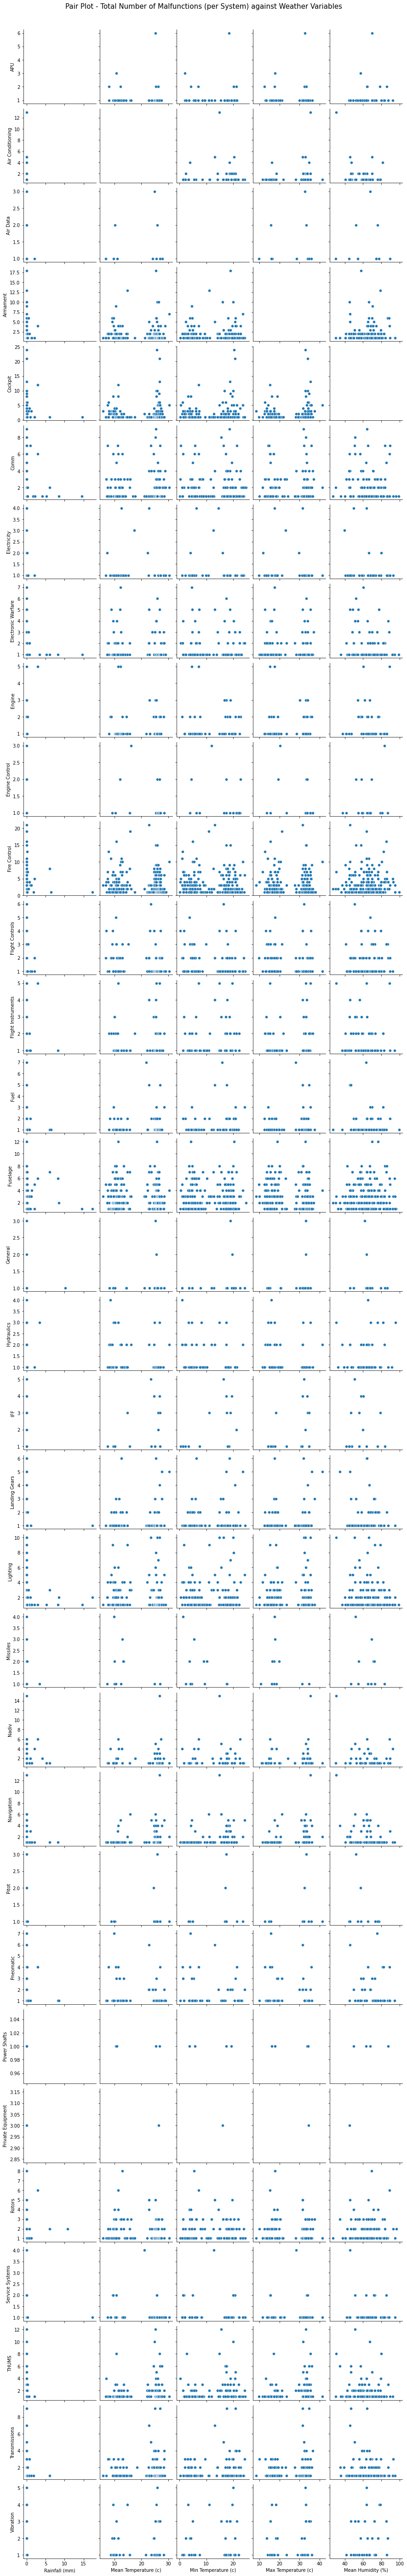

In [158]:
# Create a pivot table, having each system as a feature.
pivot_df = pd.DataFrame(malf_park_meterological_df.pivot_table("Number of Malfunctions", 
                                                               ['Rainfall (mm)', 'Mean Temperature (c)', 
                                                                'Min Temperature (c)', 'Max Temperature (c)', 
                                                                'Mean Humidity (%)'], "System"))
# Reset the defined index because it is not significant to this process.
pivot_df.reset_index(inplace = True)

# Select x variables to be the weather features. 
selected_x_vars = list(pivot_df.iloc[:, 0:5].columns)

# Select y variables to be the systems.
selected_y_vars = list(pivot_df.iloc[:, 5::].columns)

# Plot.
plot = sns.pairplot(data = pivot_df, x_vars = selected_x_vars, y_vars = selected_y_vars, dropna = True)
plot.fig.suptitle("Pair Plot - Total Number of Malfunctions (per System) against Weather Variables", size = 15)
plot.fig.subplots_adjust(top = 0.97)

***Discussion***

* The data samples seem to be scattered randomly and independently.
* Based on the plot above, it can be said that there is no linear correlation between the weather variables and the number of malfunctions, for all helicopter systems. This finding is particularly interesting with respect to the gut feelings that preceded to this work.

#### Another Look at the Impact of Weather Variables

In this section we would like to take a closer look at the effect of a single weather variable on helicopter malfunctions.
We will examine the following variables: rainfall, mean temperature, and mean humidity.

We will start by writing two handy methods:
1. For displaying a heat map, to visualize the impact of the specific variable on a speicifc system.
2. For displaying a strip plot, to understand the data samples distribution.

In [159]:
def show_heat_map(given_df, variable_name, headline):
    # Create the required pivot table.
    pivot_df = given_df.pivot(index = variable_name, columns = "System")["Number of Malfunctions"]

    # Discard NaNs - fill them wiith 0 (since we cannot assume their values otherwise).
    pivot_df.fillna(0, inplace = True)

    # Normalize (column-wise).
    pivot_df = (pivot_df - pivot_df.mean()) / pivot_df.std()
    
    # Transpose the dataframe, to ease the reader.
    pivot_df = pivot_df.transpose()

    # Create the plot, using Sea Born heat map.
    fig, ax = plt.subplots(figsize=(12,8))
    plot = sns.heatmap(pivot_df)
    
    # Add a title.
    fig.suptitle(headline, fontsize = 15)
    
    # Format text labels (2 decimals after the dot).
    fmt = '{:0.2f}'
    xticklabels = []
    for item in plot.get_xticklabels():
        item.set_text(fmt.format(float(item.get_text())))
        xticklabels += [item]
    plot.set_xticklabels(xticklabels)
    

def show_strip_plot(given_df, weather_varaible, headline):
    # Create the plot, using Sea Born strip plot.
    fig, ax = plt.subplots(figsize=(20,8))
    plot = sns.stripplot(x = "System", y = weather_varaible, data = malf_park_meterological_df, palette = "Set2", size = 5)
    
    # Add a title.
    fig.suptitle(headline, fontsize = 20)
    
    # Modify labels properties. 
    plt.xticks(rotation = 90)
    plot.tick_params(labelsize = 12)

#### Rainfall and Outdoor Parking

The following diagram depicts the data samples distribution:

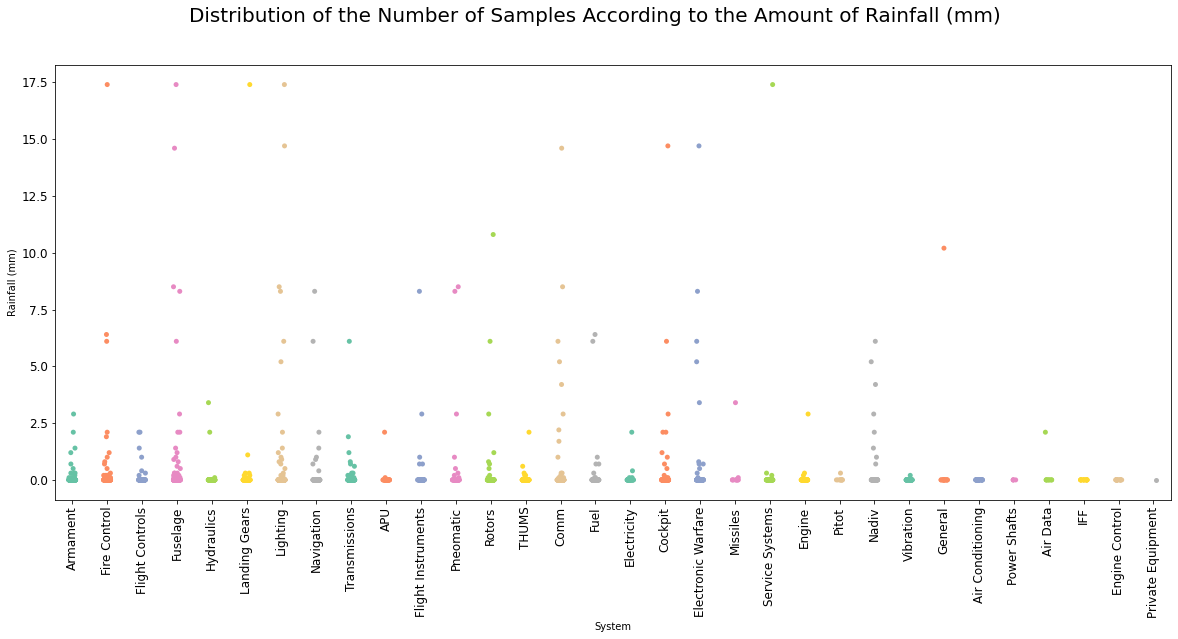

In [160]:
show_strip_plot(malf_park_meterological_df, "Rainfall (mm)", 
                "Distribution of the Number of Samples According to the Amount of Rainfall (mm)")

***Discussion***

* Most of the samples are somwhere between 0 to 5 mm of rainfall. 
* This result is consistent with a finding that was discovered earlier - in Ramon Air Force Base it rains a little even in the winter months - hence, there are likely to be more samples for non-rainy days.

In addition, we are interested in presenting a heat map for the mean amount of malfunctions according to the amount of rainfall:

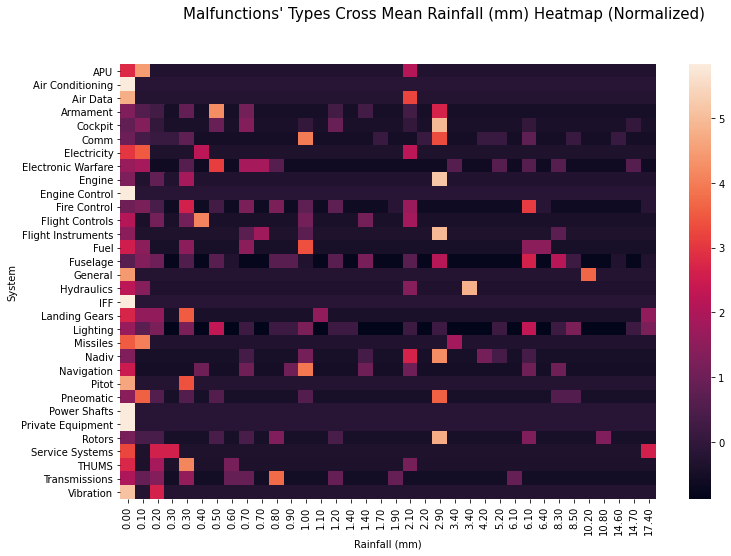

In [161]:
rainfall_parking_df = pd.DataFrame(malf_park_meterological_df.groupby(["Rainfall (mm)", "System"])
                                   ["Number of Malfunctions"].mean())

rainfall_parking_df.reset_index(inplace = True)

show_heat_map(rainfall_parking_df, "Rainfall (mm)", "Malfunctions' Types Cross Mean Rainfall (mm) Heatmap (Normalized)")

***Discussion***

* This picture corresponds to the conclusion we reached above - there is no trend of increasing in the amount of malfunctions when the amount of rainfall also increases. Overall the picture is relatively noisy, and shows randomness.

#### Mean Temperature and Outdoor Parking

The following diagram depicts the data samples distribution:

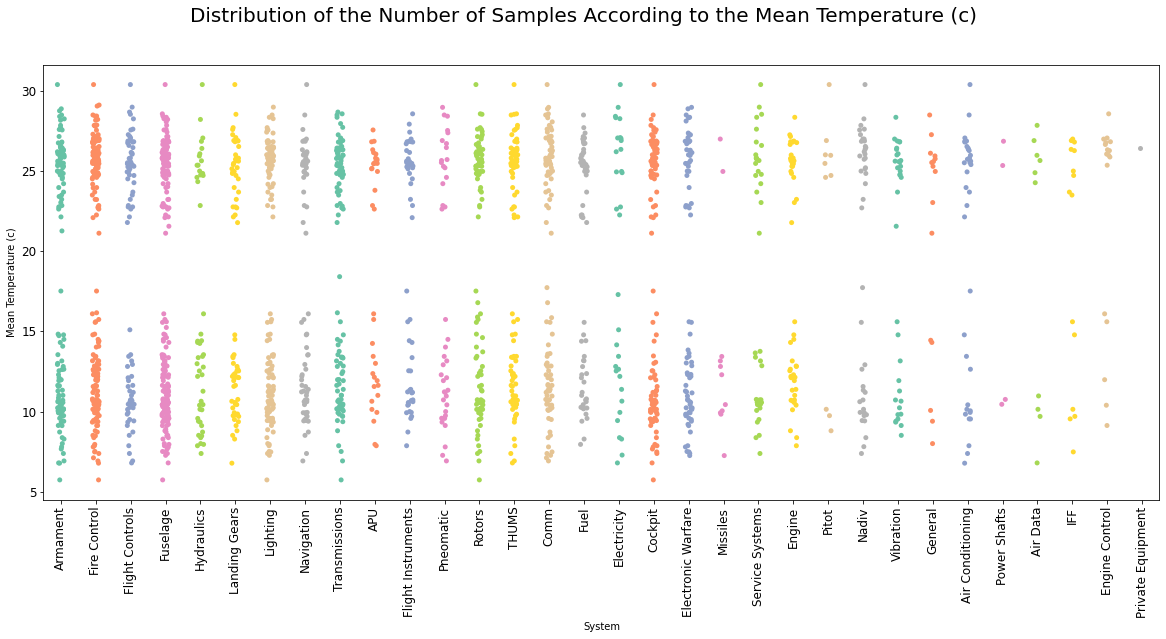

In [162]:
show_strip_plot(malf_park_meterological_df, "Mean Temperature (c)", 
                "Distribution of the Number of Samples According to the Mean Temperature (c)")

***Discussion***

* The distribution of the samples is as expected - with a gap between the values 17-23. Presumably, this is because these temperature values are less common in the sampled months (Summer months and Winter months).

In addition, we are interested in presenting a heat map for the type and amount of malfunctions according to the mean temperature:

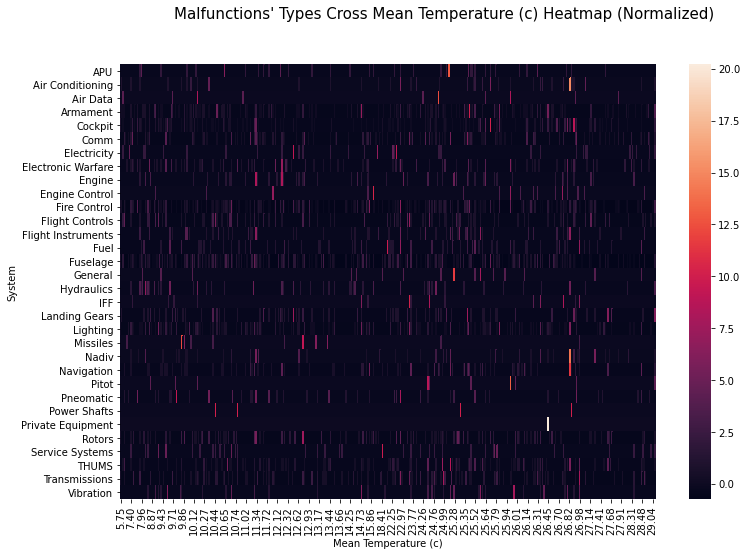

In [163]:
mean_temp_parking_df = pd.DataFrame(malf_park_meterological_df.groupby(["Mean Temperature (c)", "System"])
                                   ["Number of Malfunctions"].mean())

mean_temp_parking_df.reset_index(inplace = True)

show_heat_map(mean_temp_parking_df, "Mean Temperature (c)", 
              "Malfunctions' Types Cross Mean Temperature (c) Heatmap (Normalized)")

***Discussion***

* The picture is relatively noisy, and does not shows any pattern.

#### Mean Humidity and Outdoor Parking

The following diagram depicts the data samples distribution:

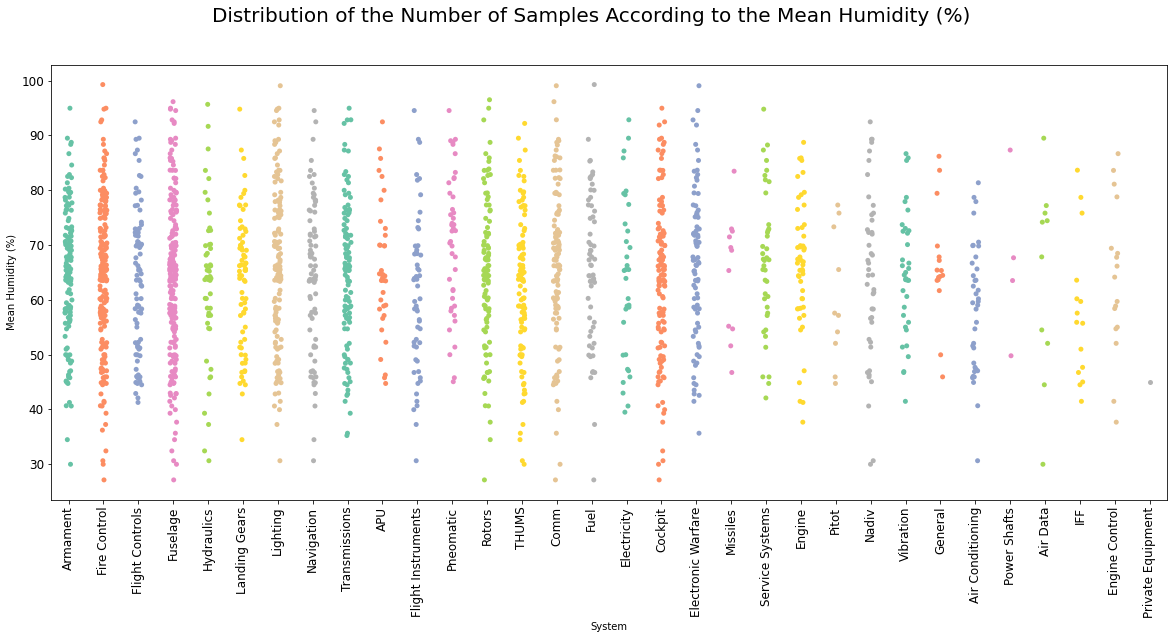

In [164]:
show_strip_plot(malf_park_meterological_df, "Mean Humidity (%)", 
                "Distribution of the Number of Samples According to the Mean Humidity (%)")

***Discussion***

* The distribution of the samples is as expected.

In addition, we are interested in presenting a heat map for the type and amount of malfunctions according to the mean humidity:

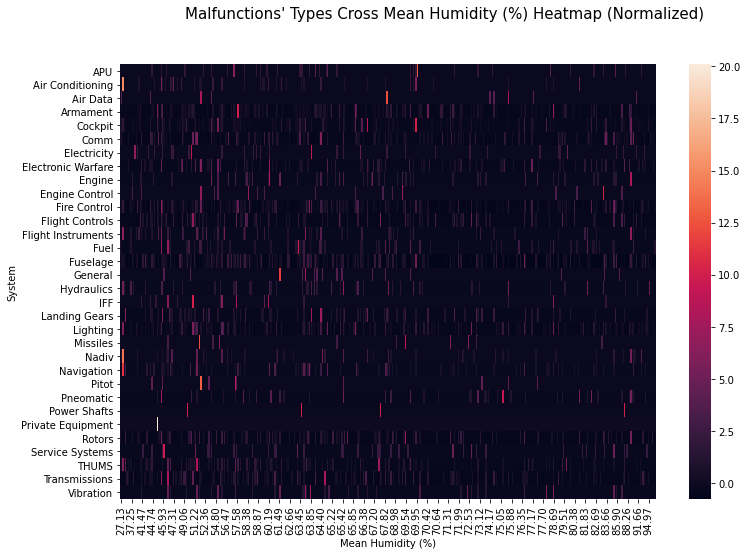

In [165]:
mean_humidity_parking_df = pd.DataFrame(malf_park_meterological_df.groupby(["Mean Humidity (%)", "System"])
                                   ["Number of Malfunctions"].mean())

mean_humidity_parking_df.reset_index(inplace = True)

show_heat_map(mean_humidity_parking_df, "Mean Humidity (%)", 
              "Malfunctions' Types Cross Mean Humidity (%) Heatmap (Normalized)")

***Discussion***

* The picture is relatively noisy, and does not shows any pattern.

#### 4.2.2.2.3 After Flight Analysis

At the end of the previous section (that of data preparation), we presented the following dataframe:

In [166]:
malf_flights_meterological_df

,System,Number of Malfunctions,Rainfall (mm)
0,APU,1,0.0
1,Comm,1,0.0
2,Electronic Warfare,3,0.0
3,Fire Control,3,0.0
4,Lighting,1,0.0
5,Missiles,1,0.0
6,Navigation,2,0.0
7,Rotors,1,0.0
8,Comm,1,1.0
9,Fire Control,2,1.3


* The total number of samples is very small, and it demonstrates a situation where a very small number of malfunctions are being registered to about 12 hours after landing at Ramat David Air Force Base.


* Although there are not enough data samples, the table above represents a real situation - not many malfunctions are being registered after landing at Ramat David Air Force Base.


* We can carefully state that the data presented above do not offer a linear correlation between the number of malfunctions (per system) and the amount of rainfall.


* It is strongly recommended to have more data samples, i.e. to take into account all of the squadron's flights, and not just those departed from Ramat David Air Force Base (i.e providing the flight area for every flight record). This will allow us to more accurately determine if there is a linear correlation between the two variables.

#### 4.2.2.2 Epilogue

Since there is no linear correlation between weather variables and the number of malfunctions registered (per system), we will have to abandon our intention to create a regression model for this. Instead, we will create a simple regression model for predicting the number of malfunctions per flight duration. These two variables did introduce a moderate linear correlation, thus being a good candidate for further analysis.

### 4.3 Related Helicopters – by the same Malfunctioning Sub-Systems

#### 4.3.1 Introduction

As described in the introduction to this project, for some of the helicopter’s systems there is a limited stock of spare parts. In many cases, it is customary to disassemble a malfunctioning component, repair it (by class B perosneel), and return it to another helicopter. Recurrent malfunctions of subsystems are not adequately documented.

On the other hand, documentation of maintenance operations made for the specific helicopter do exists (in the technical department information systems), so the causes of malfunctions can be assumed on its basis - After fitting helicopters together.

Therefore, we would like to offer an alternative perspective by connecting between malfunctioning sub-systems (units) and specific helicopters (tail numbers).
This unique look will allow the technical department to deepen further (after the publication of this work) and try to trace the source of the malfunctions, which may involve broader processes than a specific faulty unit.

Based on the above, the systems to be reviewed during this analysis are:

1. Fire Control.

2. Navigation.

3. Electronic  Warfare.

All three have a limited inventory of spare parts.

Based on prior knowledge, the average time taken to disassemble, repair, and return a unit to another helicopter is about three weeks. Therefore, we will slice the data according to this time interval, while selecting the most significant week (i.e., the one with the highest number of faults) for further analysis. 

The analysis will be conducted for 2020, demonstrating this unique perspective. 

#### 4.3.1 Prepare the Data for Analysis

First, we would like to examine during which three weeks the greatest number of malfunctions were discovered, per the given systems:

In [167]:
def get_signficant_week(system_name):
    # Select only validated malfunctions for the given system.
    malf_system_df = malf_df_2020.loc[((malf_df_2020["System"] == system_name)) & (malf_df_2020["Validated?"] == True)]
    # Drop unneeded columns.
    malf_system_df = malf_system_df.drop(columns = ["Sub-System", "Validated?", "Closing Time", "Register Profession", 
                                                    "Closer Profession", "Malfunction Handling Duration", "Tail Number"])
    # Group by 3 weeks time.
    malf_system_df = pd.DataFrame(malf_system_df.groupby([pd.Grouper(freq='3W', key='Registration Time'),
                                                          "System"]).agg({'System': "count"}))
    
    # Return the most significant week.
    return malf_system_df.loc[malf_system_df["System"].idxmax()]

In [168]:
get_signficant_week("Fire Control")

System    33
Name: (2020-07-19 00:00:00, Fire Control), dtype: int64

In [169]:
get_signficant_week("Navigation")

System    13
Name: (2020-07-19 00:00:00, Navigation), dtype: int64

In [170]:
get_signficant_week("Electronic Warfare")

System    10
Name: (2019-12-29 00:00:00, Electronic Warfare), dtype: int64

Let's retrieve the data samples by the given week, per the given system:

In [171]:
def retrieve_data(system_name, date):
    # Select only validated malfunctions for the given system.
    malf_system_df = malf_df_2020.loc[((malf_df_2020["System"] == system_name)) & (malf_df_2020["Validated?"] == True)]
    # Drop unneeded columns.
    malf_system_df = malf_system_df.drop(columns = ["System", "Validated?", "Closing Time", "Register Profession", 
                                                        "Closer Profession", "Malfunction Handling Duration"])
    # Each row represents a single malfunction.
    malf_system_df["Number of Malfunctions"] = 1
    # Group by 3 weeks time.
    malf_system_df = pd.DataFrame(malf_system_df.groupby([pd.Grouper(freq='3W', key='Registration Time'),
                                                              "Tail Number", 'Sub-System']).agg(
                                                              {'Number of Malfunctions': "count"}))
    # Drop the index, to search on the date.
    malf_system_df.reset_index(inplace = True)
    # Retrieve the given date data.
    malf_system_df = malf_system_df.loc[malf_system_df["Registration Time"] == date]

    return malf_system_df

In [172]:
malf_fire_control_df = retrieve_data("Fire Control", dt.datetime(2020,7,19))

In [173]:
malf_navigation_df = retrieve_data("Navigation", dt.datetime(2020,7,19))

In [174]:
malf_electronic_warfare_df = retrieve_data("Electronic Warfare", dt.datetime(2019,12,29))

#### 4.3.2 Builid a Bipartite Graph

#### Imports

In [175]:
import networkx as nx
from networkx.algorithms import bipartite

Second, we would like to build a bipartite graph connecting helicopters with malfunctioning units (sub-systems). The nodes will be the helicopters (one side) and the malfunctioning units (other side). An edge will be added between each helicopter and the malfunctioning unit discovered during the specified time interval.

In [176]:
def build_bipartite_graph(malf_df):
    # Create a new graph.
    B = nx.Graph()
    
    # Add the helicopters and sub-systems as nodes.
    B.add_nodes_from(malf_df['Tail Number'], bipartite = 0)
    B.add_nodes_from(malf_df['Sub-System'], bipartite = 1)
    
    # Add edges, from the helicopters to the sub-systems.
    B.add_edges_from([(row['Tail Number'], row['Sub-System']) for idx, row in malf_df.iterrows()])
    
    return B

In [177]:
fire_control_graph = build_bipartite_graph(malf_fire_control_df)

In [178]:
navigation_graph = build_bipartite_graph(malf_navigation_df)

In [179]:
electronic_warfare_graph = build_bipartite_graph(malf_electronic_warfare_df)

Finally, let's project the graph on the helicopters group, and draw the result:

In [180]:
def project_and_draw(given_df, graph):
    # Extract the tail numbers from the dataframe.
    X = given_df.loc[:, "Tail Number"].unique()
    
    # Apply projection.
    L = bipartite.projected_graph(graph, X)
    
    # Draw.
    plt.figure(figsize=(8,8)) 
    nx.draw_networkx(L, nx.circular_layout(L), node_size = 600, node_color = "red")

#### Related Helicopters - by Fire Control System's Units - 19/07/2020 - 09/08/2020

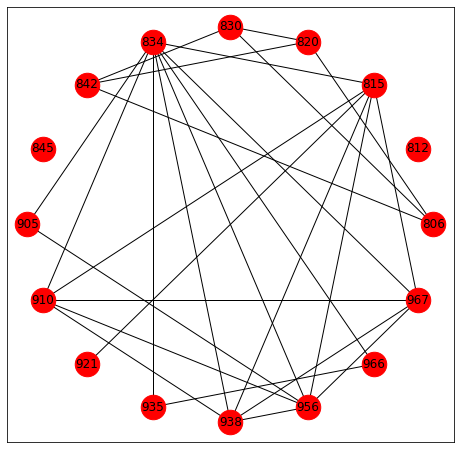

In [181]:
project_and_draw(malf_fire_control_df, fire_control_graph)

**Discussion**

* The following clicks are candidates for further investigation for the units being used, since they are preserving a reasonable number of helicopters, which may have been replaced with the same malfunctioning equipment:
    {905, 834, 956}, {935, 966, 834}, {820, 830, 842}, {815, 921}.

#### Related Helicopters - by Navigation System's Units - 19/07/2020 - 09/08/2020

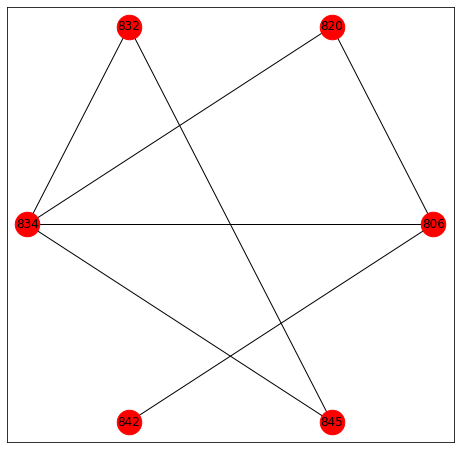

In [182]:
project_and_draw(malf_navigation_df, navigation_graph)

**Discussion**

* Based on the same assumption written above, these clicks are candidates for further review:
 {832, 834, 834}, {834, 820, 806}.

#### Related Helicopters - by Electronic Warfare System's Units - 29/12/2019 - 19/01/2020

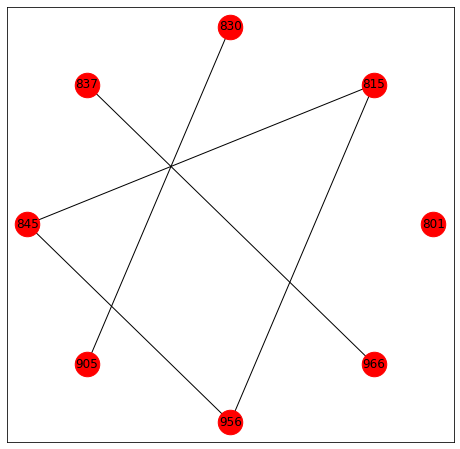

In [183]:
project_and_draw(malf_electronic_warfare_df, electronic_warfare_graph)

**Discussion**

* Based on the same assumption written above, these clicks are candidates for further review:
 {830, 905}, {845, 815, 956}, {966, 837}.

### 4.4 Analyzing the Impacts of Different Weekly Flight Plans on Malfunctions

#### 4.4.1 Introduction

In this section we will present statistics related to the weekly flight plans. As stated in the introduction to this project, we assume that there is a relation between the weekly flight plan, and malfunctions - quantity, time of handling, and as a result also the amount of total flight hours executed during each week.

To do this, we must first cluster our data. We chose to use two familiar and relatively simple models for clustering: K-Means and Gaussian Mixture Model (GMM). We chose the K-means model first and foremost because we are interested in a simple model which is easy to implement. In addition, we assume that the anticipated clusters are centroids (or rather - finding clusters which are centroids is enough for this project). We chose the GMM for comparison purposes - this model is more flexible (i.e. can construct clusters which are different than centroids), and allows to present each sample’s probability of belonging to each cluster - a valuable feature.

After classifying the weeks (by types), we can continue to display the requested statistics: Box Plot for total flight hours per week type, Box Plot for total number of malfunctions per week type, and Box Plot for malfunctions’ time handling per week type.

We will conclude this section, as usual, with a discussion and recommendations.

#### 4.4.2 Prepare Data for Clustering

In order to cluster the weeks, we shall prepare the data correctly.

First, we would like to omit the flights that took place in the north of Israel, since they are not part of the weekly training program that is carried out at Ramon Air Force Base (this flight plan is affected by operational constraints, thus not relevant for comparison).

Second, we would like to keep for each week all the departure times that took place during it (i.e the features).

We will need to convert the data format to a uniform one, so that we can treat each feature (departure time) in a similar way - having the same scale and weight for all the features. To do this, we will convert the departure time to the number of hours that have elapsed since the beginning of the week.

Let's start with concatenating 2019 & 2020 flights dataframes:

**Imports**

In [184]:
import datetime
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import cdist

In [185]:
# Concatenate 2019 and 2020 flights dataframes.
unified_flights_df = pd.concat([flights_df_2019, flights_df_2020])

# Omit the northern flights, since they are not part of the squadron's core weekly plan.
unified_flights_df = unified_flights_df.loc[unified_flights_df["Northern Flight"] == False]

# Reset the index, since it is not relavent for this process.
unified_flights_df.reset_index(inplace = True)

# Drop unneeded columns. 
# We will later on use the "Tail Number" and "Departure Time" for merging with the malfunctions dataframe.
unified_flights_df = unified_flights_df.drop(columns = ["Northern Flight", "Landing Time", "Tail Number"])

Let's use the following two methods to add to the dataframe a week column that includes for each sample the first day of the week for which it was taken.
Then, let's convert each sample ("Depatrure Time") to a number representing the hours that have passed since the begining of the week:

In [186]:
def get_week_starting_date(dt):
    # Weekday values start at Moneday (0) ending at Sunday (6).
    if dt.weekday() == 6:
        return dt.date()
    return pd.to_datetime((dt - datetime.timedelta(days = dt.weekday() + 1)).date())


def get_passed_minutes(date, week_start_date):
    return (date - week_start_date).total_seconds() / 3600

# Add a new column - "Week" to include for each sample the first day of the week for which it was taken.
unified_flights_df["Week"] = unified_flights_df.apply(lambda row: get_week_starting_date(row['Departure Time']), axis=1)

# Discard incomplete weeks, to preserve a balanced scheme.
unified_flights_df = unified_flights_df.loc[(unified_flights_df["Week"] != datetime.datetime(2020, 8, 30)) &
                                            (unified_flights_df["Week"] != datetime.datetime(2018, 12, 1))]

# Convert each sample to the minutes that have passed since the begining of the week.
unified_flights_df["Departure Time"] = unified_flights_df.apply(lambda row: 
                                                                get_passed_minutes(row['Departure Time'], row["Week"]), axis=1)

Now, we would like to preserve a list which includes a tuple of both starting day of week, and a numpy array containing the data samples per that week. This will later on allow us to match a given week classification with its original data.

In [187]:
weeks_list = []

# Iterate over the unified flights dataframe, and add to the weeks list the requested tuples. 
for date in unified_flights_df["Week"].unique():
    samples_array = np.sort(unified_flights_df.loc[unified_flights_df["Week"] == date]["Departure Time"].to_numpy())
    weeks_list.append((date, samples_array))

Let's create a numpy array which will contain our data; Each row for each week, while the columns will be the features.

But, what is a feature, in terms of weekly flight plans? a feature will be a candidate time slot for flight. We takes an upper bound for which no more than 50 flights are anticipated per day. Now, since the flights' depatrue time were sorted earlier, we will fill the features sequantlly, while disingiusing between different days. In this way we could preserve a better clustering scheme.

Obviously, not all weeks contain the same number of executed flights, thus we will fill the empty cells with zeros, and by that stating that there are no more flights available for this day.

In [188]:
# Calculate the number of anticipated columns.
max_number_of_flight_per_day = 50
number_of_days = 5

# Calculate the number of anticipated rows.
number_of_rows = len(weeks_list)

# Initialize a fresh new numpy array, and fill it up with zeros.
X = np.zeros((number_of_rows, max_number_of_flight_per_day * number_of_days), int)

# Override the cells' values with the actual samples.
# Distinguish between different days, by placing the values starting at a day-related index. 
for i in range(0, len(weeks_list)):
    index_to_assign = 0
    sunday_index = 0
    moneday_index = 0
    tuesday_index = 0
    wednesday_index = 0
    thursday_index = 0
    values = weeks_list[i][1]
    for j in range(0, len(values)):
        if values[j] < 24:
            index_to_assign = (0 * max_number_of_flight_per_day) + sunday_index
            sunday_index += 1
        elif 24 <= values[j] < 48:
            index_to_assign = (1 * max_number_of_flight_per_day) + moneday_index
            moneday_index += 1
        elif 48 <= values[j] < 72:
            index_to_assign = (2 * max_number_of_flight_per_day) + tuesday_index
            tuesday_index += 1
        elif 72 <= values[j] < 96:
            index_to_assign = (3 * max_number_of_flight_per_day) + wednesday_index
            wednesday_index += 1
        elif 96 <= values[j]:
            index_to_assign = (4 * max_number_of_flight_per_day) + thursday_index
            thursday_index += 1
        X[i][index_to_assign] = values[j]

#### 4.4.3 Weeks Clustering using K-Means and Gaussian Mixture Models

As described in the introduction to this project, there are 4-5 typical weekly flight plans (at the planning phase).

A typical flight plan can look like this: 
1. Sunday - day flights only.
2. Monday - day and night flights.
3. Tuesday - no flights. 
4. Wednesday - day and night flights. 
5. Thursday - day flights only.

Despite this, the actual execution of the plan often ends in deviations from the original design. These deviations are the result of malfunctions, and other unexpected things (such as weather, or air crew personal issues).
In this section, we would like to cluster the given weeks by their flight’s departure times. We shall allow more than 4-5 clusters, because as stated, the actual execution can differ from the original plan.

After having the clusters, we will choose to focus on 4-5 weeks’ types, by selecting the biggest available clusters. 

**K-Means Clustering**

Let's use K-Means to cluster our week samples. 

To decide on the number of clusters to be obtained, we will show a graph of the average dispersion per the number of clusters (k) and look for the "elbow" (the number of clusters after which the average dispersion decreases more moderately).

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

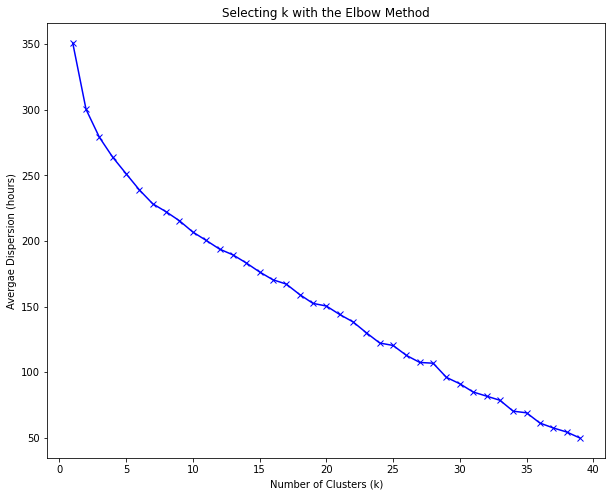

In [212]:
# We would like to show the statistics for up to 40 clusters (for reference).
K = range(1, 40)

meanDispersions = []

# Cluster using K-Means, allowing a different number of clusters at each iteration.
for k in K:
    # Create a K-Means instance.
    kmeans = KMeans(n_clusters = k)
    # Fit to data.
    kmeans.fit(X)
    # Calculate the average dispersion. 
    meanDispersions.append(sum(np.min(cdist(X,kmeans.cluster_centers_, 'euclidean'), axis = 1)) / X.shape[0])

# Plot the graph.
# Determine the plot's size.
plt.figure(figsize=(10, 8))

# Plot.
plt.plot(K, meanDispersions, 'bx-')

# Determine the plot's labels and title.
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Avergae Dispersion (hours)")
plt.title("Selecting k with the Elbow Method")

The "elbow" looks less sharp than expected. However, we will choose k=10 based on our experience with the data.

Let's set k = 10 (the number of clusters to obtain):

In [216]:
# Create a K-Means instance.
kmeans = KMeans(n_clusters = 10, n_init = 1000)

# Fit to data.
kmeans.fit(X)

# Label the weeks with respect to their cluster.
kmeans_week_labels = kmeans.predict(X)

Let's print the weeks' labels, and the number of samles per unique cluster:

In [217]:
kmeans_week_labels

array([3, 5, 5, 9, 2, 5, 5, 0, 0, 0, 9, 1, 7, 3, 1, 3, 0, 7, 8, 2, 4, 1,
       1, 7, 7, 1, 5, 6, 3, 2, 5, 2, 3, 4, 4, 7, 6, 8, 4, 3, 3, 8, 5, 0,
       2, 2, 6, 6, 6, 9])

In [218]:
pd.Series(kmeans_week_labels).value_counts()

5    7
3    7
2    6
7    5
6    5
1    5
0    5
4    4
9    3
8    3
dtype: int64

As anticipated, we have two major clusters, 2 more of a medium size, and additional 6 of a small size.

Now, let's have a sense of the suggested labels.

We will take three weeks which have been assigned to the same cluster / label (one of the two majors), and try to understand whether or not they are similar, in terms of the weekly flight plan. We will also try to understand, wheather indeed this is one of the most common plans in the squadron (as 7 week samples were assigned to this cluster).

In [219]:
X[2]

array([  8,  12,  12,  13,  13,  13,  14,  14,  16,  16,  17,  17,  17,
        17,  17,  17,  18,  18,  18,  18,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32,  33,
        35,  35,  36,  37,  38,  39,  39,  39,  39,  40,  40,  41,  41,
        41,  41,  42,  42,  42,  43,  43,  43,  45,  45,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  56,  62,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  81,  81,  82,  84,  84,  86,
        87,  87,  88,  88,  88,  88,  88,  88,  89,  89,  90,  90,  90,
        90,  90,  90,  91,  91,  92,  93,   0,   0,   0,   0,   

In [220]:
X[5]

array([  8,   9,   9,   9,  10,  10,  10,  14,  15,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  34,  34,
        34,  34,  36,  36,  37,  38,  39,  39,  39,  40,  40,  40,  40,
        40,  40,  41,  41,  41,  42,  42,  44,  44,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  57,  58,  59,  59,
        60,  60,  61,  62,  62,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  80,  80,  80,  80,  80,  81,
        81,  82,  82,  82,  83,  83,  84,  84,  87,  88,  88,  88,  88,
        88,  89,  89,  89,  89,  89,   0,   0,   0,   0,   0,   

In [221]:
X[6]

array([ 10,  10,  10,  12,  12,  12,  13,  13,  13,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  33,  36,
        36,  36,  36,  36,  37,  37,  37,  37,  37,  38,  38,  39,  40,
        40,  40,  40,  40,  41,  41,  41,  41,  41,  42,  43,  43,  44,
        44,  45,  45,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  54,  56,  58,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  84,  84,  84,  84,  84,  84,
        85,  85,  85,  85,  85,  85,  87,  87,  87,  87,  88,  88,  88,
        88,  89,  89,  89,  89,  91,  91,   0,   0,   0,   0,   

One can evident that all three weeks have the following structure:

1. Sunday - day flights only.
2. Monday - day and night flights.
3. Tuesday - day flights only. 
4. Wednesday - day and night flights. 
5. Thursday - day flights only.

Based on my knowledge, I can say that the plan shown is indeed the most common plan in the squadron.

**GMM Clustering**

We will now use Gaussian Mixture Model to cluster our week samples. We will do this in order to compare the two models created.

In [234]:
# Create a Gaussian Mixture instance.
gmm = GaussianMixture(n_components = 10, n_init = 1000)

# Fit to data.
gmm.fit(X)

# Label the weeks with respect to their cluster.
gmm_week_labels = gmm.predict(X)

Let's print the weeks' labels, and the number of samles per unique cluster:

In [235]:
gmm_week_labels

array([1, 2, 2, 7, 3, 2, 2, 4, 4, 4, 7, 8, 6, 1, 8, 1, 4, 6, 0, 3, 9, 0,
       8, 6, 6, 8, 2, 5, 1, 3, 2, 3, 1, 0, 9, 6, 5, 0, 9, 1, 8, 0, 0, 4,
       3, 3, 5, 5, 5, 7], dtype=int64)

In [236]:
pd.Series(gmm_week_labels).value_counts()

3    6
2    6
1    6
0    6
8    5
6    5
5    5
4    5
9    3
7    3
dtype: int64

The numbers are pretty much the same as for the K-Means model. Let's try to understand which samples were assigned to different clusters and why. We will focus on the five major clusters in this comparison:

In [237]:
def pretty_print_list(given_list, headline):
    print(headline)
    for item in given_list:
        print("\n {0}".format(item))
    
def get_clusters(week_labels):
    
    clusters_list = []
    
    for i in range(0, 10):
        clusters_list.append(np.where(week_labels == i))
        
    return clusters_list
    
gmm_sets = get_clusters(gmm_week_labels)
pretty_print_list(gmm_sets, "GMM Clusters:")

kmeans_sets = get_clusters(kmeans_week_labels)
pretty_print_list(kmeans_sets, "K-Means Clusters:")  

GMM Clusters:

 (array([18, 21, 33, 37, 41, 42], dtype=int64),)

 (array([ 0, 13, 15, 28, 32, 39], dtype=int64),)

 (array([ 1,  2,  5,  6, 26, 30], dtype=int64),)

 (array([ 4, 19, 29, 31, 44, 45], dtype=int64),)

 (array([ 7,  8,  9, 16, 43], dtype=int64),)

 (array([27, 36, 46, 47, 48], dtype=int64),)

 (array([12, 17, 23, 24, 35], dtype=int64),)

 (array([ 3, 10, 49], dtype=int64),)

 (array([11, 14, 22, 25, 40], dtype=int64),)

 (array([20, 34, 38], dtype=int64),)
K-Means Clusters:

 (array([ 7,  8,  9, 16, 43], dtype=int64),)

 (array([11, 14, 21, 22, 25], dtype=int64),)

 (array([ 4, 19, 29, 31, 44, 45], dtype=int64),)

 (array([ 0, 13, 15, 28, 32, 39, 40], dtype=int64),)

 (array([20, 33, 34, 38], dtype=int64),)

 (array([ 1,  2,  5,  6, 26, 30, 42], dtype=int64),)

 (array([27, 36, 46, 47, 48], dtype=int64),)

 (array([12, 17, 23, 24, 35], dtype=int64),)

 (array([18, 37, 41], dtype=int64),)

 (array([ 3, 10, 49], dtype=int64),)


Let's start with the biggest cluster:

K-Means: {1,  2,  5,  6, 26, 30, 42}.

GMM: {1,  2,  5,  6, 26, 30}.


It seems that the K-Means model assigned week 42 to the biggest cluster while GMM put it in another one. 

Let's investigate their structure, by comparing them to one of the other weeks in each corresponding cluster:

In [238]:
X[42]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31,  31,
        31,  32,  32,  33,  33,  33,  34,  35,  35,  37,  37,  38,  38,
        38,  38,  38,  38,  39,  40,  40,  41,  41,  42,  42,  43,  43,
        43,  45,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  79,  79,  80,  80,  80,  80,
        81,  81,  82,  82,  82,  82,  84,  84,  84,  84,  86,  86,  86,
        87,  88,  88,  88,  89,  89,  89,  89,  89,  90,  90,   

A candidate member of the K-means cluster:

In [239]:
X[1]

array([  8,  10,  10,  11,  11,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,  35,
        35,  35,  36,  36,  36,  36,  39,  39,  39,  39,  39,  40,  40,
        40,  40,  40,  40,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  80,  82,  82,  83,  84,  84,
        85,  85,  85,  87,  87,  88,  88,  89,  89,  89,  89,  89,  89,
        89,  90,  90,  90,  90,   0,   0,   0,   0,   0,   0,   

A candidate member of the GMM cluster:

In [240]:
X[41]

array([  7,   9,   9,  10,  11,  12,  16,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31,  32,
        32,  34,  34,  34,  34,  35,  35,  36,  36,  36,  38,  38,  38,
        38,  38,  39,  39,  39,  39,  40,  40,  40,  41,  41,  41,  41,
        41,  41,  43,  43,  43,  44,  44,  44,  45,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  55,  56,  63,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  80,  80,  80,  81,  81,  81,
        81,  82,  82,  83,  83,  83,  83,  84,  85,  86,  86,  86,  86,
        86,  87,  87,  87,  87,  87,  87,  88,  88,  88,  88,  8

It seems that the K-Means model was more accurate. They do reflect the same weekly flight plan (Sunday day flight).


Let's print the probabilities of belonging to each cluster, that GMM has found for this sample:

In [243]:
# Get probabilities.
prob_belonging_to_clusteres = gmm.predict_proba(X)

# Print week number (index) 42 probabilities.
prob_belonging_to_clusteres[42]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

We can see that the probability of belonging to cluster no. 0 is 1. 

Let's proceed to the next major cluster:

K-Means: {0, 13, 15, 28, 32, 39, 40}.

GMM: {0, 13, 15, 28, 32, 39}.

It seems that the K-Means model assigned week no. 40 to this cluster while GMM has not.

Let's investigate their structure, by comparing them to one of the other weeks in each corresponding cluster:

In [203]:
X[40]

array([  7,   7,   8,   8,   9,   9,   9,   9,   9,  13,  13,  13,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31,  31,
        32,  33,  33,  34,  34,  34,  34,  35,  35,  38,  38,  38,  38,
        38,  39,  39,  39,  39,  40,  40,  41,  41,  41,  41,  41,  42,
        42,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  62,  62,  62,  62,
        63,  63,  63,  64,  64,  65,  65,  65,  65,  67,  67,  67,  67,
        68,  68,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  80,  81,  82,  82,  82,  83,
        83,  83,  83,  84,  85,  85,  86,  87,  88,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

A candidate member of the K-means cluster:

In [204]:
X[0]

array([  8,   8,  12,  12,  13,  13,  14,  16,  16,  16,  17,  17,  17,
        18,  18,  19,  19,  19,  20,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32,  32,
        33,  33,  34,  35,  35,  35,  36,  36,  39,  39,  39,  40,  40,
        41,  41,  41,  41,  42,  42,  43,  44,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  55,  57,  59,  60,
        62,  64,  66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  79,  80,  82,  83,  83,  84,
        85,  86,  87,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

A candidate member of the GMM cluster:

In [205]:
X[25]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  33,  33,
        41,  41,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  55,  61,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  78,  79,  81,  81,  81,  83,
        84,  85,  85,  87,  87,  88,  88,  89,  89,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

And again, it seems that the K-Means model was more accurate.

In [244]:
prob_belonging_to_clusteres[40]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

Again, the probability of belonging to cluster no. 8 is 1. 

**Summary**

We will choose to proceed with the K-Means two major clusters (as discussed above, GMM and K-Means do agree on all their assigned weeks, beside the ones that were referenced above, which have been found suited to the K-Means clusters). In addition, we will choose 2 more clusters, for which K-Means and GMM agree on completely.

We stop at 4 types of weeks, since (as stated) the actual execution of the plan varies a lot, thus we would like to focus on the types which are most similar to the ones being planned (prior to execution).

The chosen clusters are:

Type A - {1,  2,  5,  6, 26, 30, 42}

Type B - {0, 13, 15, 28, 32, 39, 40}

Type C - {27, 36, 46, 47, 48}

Type D - {17, 12, 23, 24, 35}

The analysis performed for these weeks reflects a database of about 6 months of flight (an entire period in the squadron's flight plan - the Israeli Air Force works plans on a semi-annual basis). This is a reasonable number of months to examine.

Let's detail the reflected flight plan of each type:

**Type A:**

In [206]:
X[1]

array([  8,  10,  10,  11,  11,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,  35,
        35,  35,  36,  36,  36,  36,  39,  39,  39,  39,  39,  40,  40,
        40,  40,  40,  40,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  80,  82,  82,  83,  84,  84,
        85,  85,  85,  87,  87,  88,  88,  89,  89,  89,  89,  89,  89,
        89,  90,  90,  90,  90,   0,   0,   0,   0,   0,   0,   

1. Sunday - A small number of day flights.
2. Monday - day flights, and one period of night flights.
3. Tuesday - no flights. 
4. Wednesday - day flights, and one period of night flights.
5. Thursday - A small number of day flights.

**Type B:**

In [251]:
X[0]

array([  8,   8,  12,  12,  13,  13,  14,  16,  16,  16,  17,  17,  17,
        18,  18,  19,  19,  19,  20,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32,  32,
        33,  33,  34,  35,  35,  35,  36,  36,  39,  39,  39,  40,  40,
        41,  41,  41,  41,  42,  42,  43,  44,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  55,  57,  59,  60,
        62,  64,  66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  79,  80,  82,  83,  83,  84,
        85,  86,  87,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

1. Sunday - day flights.
2. Monday - day and night flights (2 periods of night flights).
3. Tuesday - day flights. 
4. Wednesday - day flights, and one period of night flights.
5. Thursday - day flights.

**Type C:**

In [254]:
X[27]

array([ 10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  34,  34,
        34,  35,  36,  36,  36,  36,  36,  38,  38,  38,  38,  38,  38,
        39,  39,  39,  39,  39,  41,  41,  41,  41,  41,  41,  41,  41,
        42,  42,  42,  43,  43,  44,  44,  44,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  60,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  79,  80,  80,  80,  81,  81,
        82,  82,  83,  83,  83,  84,  86,  86,  86,  86,  86,  86,  87,
        87,  87,  87,  87,  87,  88,  88,  89,  89,  89,  89,  9

1. Sunday - no flights (the single flight is not meaningful).
2. Monday - intensive day and night flights (2 periods of night flights).
3. Tuesday - no flights (the single flight is not meaningful). 
4. Wednesday - intensive day and night flights (2 periods of night flights).
5. Thursday - day flights.

**Type D:**

In [270]:
X[17]

array([  7,   8,   8,   8,   9,   9,   9,   9,  10,  10,  11,  11,  11,
        12,  12,  12,  14,  14,  14,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31,  31,
        32,  32,  32,  33,  33,  33,  34,  34,  34,  35,  35,  35,  36,
        36,  37,  39,  39,  40,  40,  40,  40,  40,  41,  41,  44,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  59,  59,  59,  63,
        63,  63,  63,  63,  63,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

1. Sunday - day flights.
2. Monday - day and night flights (2 periods of night flights).
3. Tuesday - day flights. 
4. Wednesday - no flights.
5. Thursday - day flights.

#### 4.4.4 Displaying Statistics of Different Weekly Flight Plans

First, we need to regroup the flights data according to the weeks’ types.

Let's reshape the flights dataframe:

In [369]:
# Determine the week type by its index.
def get_week_type(index):
    if (index == 1) or (index == 2) or (index == 5) or (index == 6) or (index == 26) or (index == 30) or (index == 42):
        return 'A'
    elif (index == 0) or (index == 13) or (index == 15) or (index == 28) or (index == 32) or (index == 39) or (index == 40):
        return 'B'
    elif (index == 27) or (index == 36) or (index == 46) or (index == 47) or (index == 48):
        return 'C'
    elif (index == 17) or (index == 12) or (index == 23) or (index == 24) or (index == 35):
        return 'D'
    else:
        return np.nan


weeks_type_and_date_list = []

# Iterate over the weeks list to extract each instance type and starting date.
for i in range(0, len(weeks_list)):
    weeks_type_and_date_list.append((get_week_type(i), weeks_list[i][0]))

# Create a new dataframe to host the date.
weeks_type_df = pd.DataFrame(weeks_type_and_date_list)  

# Drop NaNs - we would like to focus only on the aforementioned weeks' types.
weeks_type_df.dropna(inplace = True)

# Set the columns' names, prior to merge.
weeks_type_df.columns = ["Type", "Week"]

# Merge the specific weeks to examine, with the original unified flights dataframe. 
weeks_type_flights_df = weeks_type_df.merge(unified_flights_df,  how='inner', left_on = ['Week'], right_on = ['Week'])

# Drop the 'Departure Time' column because it is not needed any more.
weeks_type_flights_df = weeks_type_flights_df.drop(columns = "Departure Time")

# Group the flights data by week.
weeks_type_flights_df = pd.DataFrame(weeks_type_flights_df.groupby("Week").agg({'Flight Duration' : 'sum', 'Type': 'max'}))

# Reset the index because it is not significant for this process.
weeks_type_flights_df.reset_index(inplace = True)

# Set the columns' names.
weeks_type_flights_df.columns = ["Week", "Total Flight Time (hours)", "Week Type"]

# Convert the timedelta object to hours.
weeks_type_flights_df['Total Flight Time (hours)'] = \
        weeks_type_flights_df.apply(lambda row: row['Total Flight Time (hours)'].total_seconds() / 3600, axis=1)

Let's see the outcome by randomly sampling 5 records:

In [370]:
weeks_type_flights_df.sample(5)

,Week,Total Flight Time (hours),Week Type
5,2019-02-24,2.416667,D
11,2019-12-01,86.916667,B
20,2020-06-21,53.833333,B
7,2019-06-23,51.250000,D
23,2020-08-09,35.916667,C


Second, we need to regroup the malfunctions data according to the weeks’ types.

We shall remmber that we need to omit the northern flights out of the malfunctions data.

Let's reshape the malfunctions dataframe:

In [371]:
# Concatenate 2019 and 2020 malfunctions and parking data.
unified_malf_df = pd.concat([malf_df_2019, malf_df_2020])
unified_parking_df = pd.concat([parking_df_2019, parking_df_2020])   

# Change the "Registration Time" to include just the date, omitting the specific time.
unified_malf_df['Registration Time'] = unified_malf_df['Registration Time'].dt.normalize()

# Merge (join) the two dataframes, to have a parking location next to each record.
unified_malf_df = unified_malf_df.merge(unified_parking_df,  how='inner',
                                        left_on=['Tail Number','Registration Time'], right_on = ['Tail Number','Date'])

# Keep only Ramon Air Force base reports.
unified_malf_df = unified_malf_df.loc[unified_malf_df["Parking Location"] == 25]

# Drop unneeded columns.
unified_malf_df = unified_malf_df.drop(columns = ["Tail Number", "System", "Sub-System", 
                                                  "Closing Time", "Validated?", "Register Profession",
                                                  "Closer Profession", "Parking Location"])
# Add a counter before aggregating the records.
unified_malf_df["Number of Malfunctions"] = 1

# Convert the timedelta object to hours.
unified_malf_df['Malfunction Handling Duration'] = \
        unified_malf_df.apply(lambda row: row['Malfunction Handling Duration'].total_seconds() / 3600, axis=1)

# Group the malfunctions data by week.
unified_malf_df = pd.DataFrame(unified_malf_df.groupby("Registration Time").agg(
                               {'Number of Malfunctions': 'sum', 'Malfunction Handling Duration' : 'mean'}))

# Reset the index because it is not significant for this process.
unified_malf_df.reset_index(inplace = True)

# Set the columns' names, before merging.
unified_malf_df.columns = ["Week", "Total Number of Malfunctions", 
                                 "Malfunctions Handling Time Duration (hours)"]

# Merge the specific weeks to examine, with the unified malfunctions dataframe. 
weeks_type_malf_df = unified_malf_df.merge(weeks_type_df,  how='inner', left_on = ['Week'], right_on = ['Week'])

# Set the columns' names.
weeks_type_malf_df.columns = ["Week", "Total Number of Malfunctions", 
                                 "Malfunctions Handling Time Duration (hours)", "Week Type"]

Let's see the outcome by randomly sampling 5 records:

In [372]:
weeks_type_malf_df.sample(5)

,Week,Total Number of Malfunctions,Malfunctions Handling Time Duration (hours),Week Type
4,2019-02-03,6,38.347222,A
0,2018-12-02,14,15.864286,B
13,2019-12-22,8,15.118750,D
2,2018-12-16,24,48.479167,A
12,2019-12-08,11,109.278788,C


Finally, we can present the three required box plots:

Text(0.5, 1.0, 'Malfunctions Handling Time Duration per Type (Box Plot)')

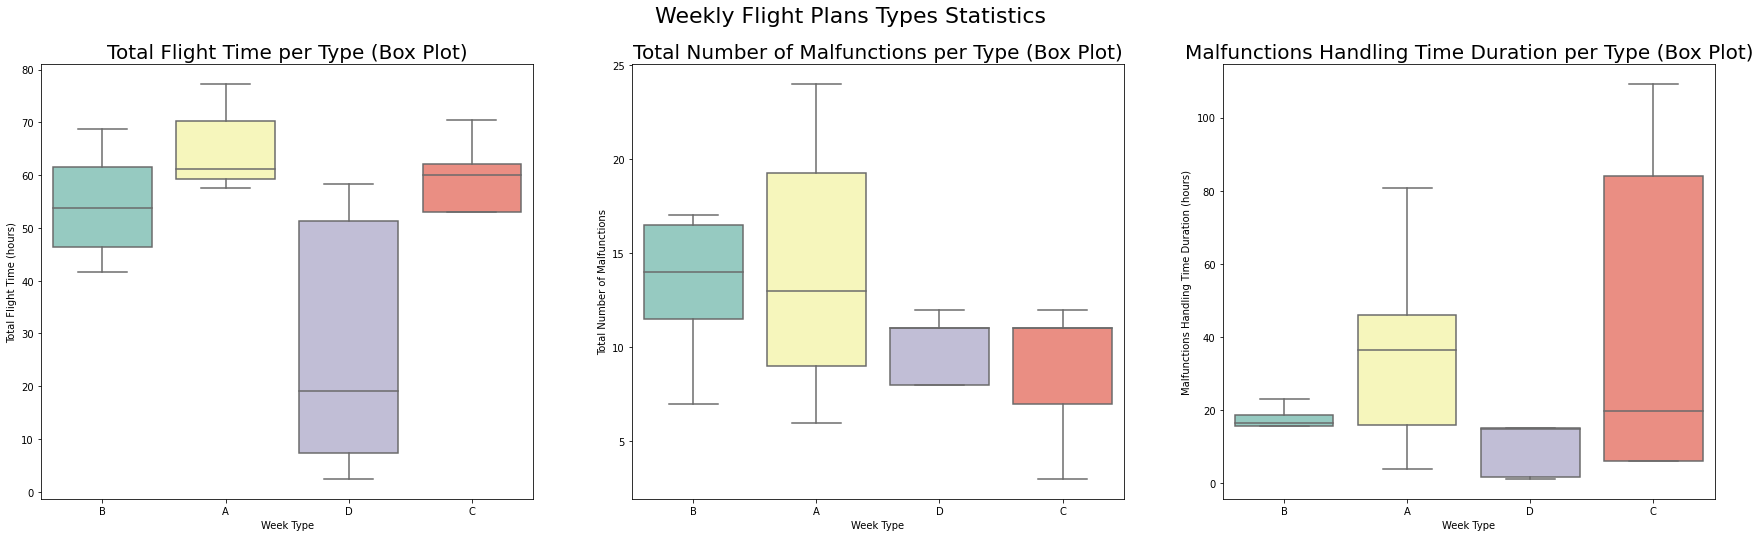

In [381]:
# Create a plot comrised of three sub-plots.
fig, axes = plt.subplots(1, 3, figsize=(30, 8))
fig.suptitle("Weekly Flight Plans Types Statistics", fontsize = 22)

# Create total flight Time box subplot using Sea Born.
flight_time_plot = sns.boxplot(ax = axes[0], x = "Week Type", 
                               y = "Total Flight Time (hours)", 
                               data = weeks_type_flights_df, 
                               showfliers = False, palette = "Set3")
    
# Determine the sub-plot's titles.
flight_time_plot.axes.set_title("Total Flight Time per Type (Box Plot)", fontsize = 20)

# Create total number of malfunctions box subplot using Sea Born.
total_number_of_malf_plot = sns.boxplot(ax = axes[1], x = "Week Type", 
                                        y = "Total Number of Malfunctions", 
                                        data = weeks_type_malf_df, 
                                        showfliers = False, palette = "Set3")

# Determine the sub-plot's titles.
total_number_of_malf_plot.axes.set_title("Total Number of Malfunctions per Type (Box Plot)", fontsize = 20)

# Create malfunctions handling time duration box subplot using Sea Born.
malf_hand_duration_plot = sns.boxplot(ax = axes[2], x = "Week Type", 
                                        y = "Malfunctions Handling Time Duration (hours)", 
                                        data = weeks_type_malf_df, 
                                        showfliers = False, palette = "Set3")

# Determine the sub-plot's titles.
malf_hand_duration_plot.axes.set_title("Malfunctions Handling Time Duration per Type (Box Plot)", fontsize = 20)

#### 4.4.5	Discussion

* The data shows a large variation in the number of total flight hours for type D. There can be several explanations for this - flights that took off but returned with a malfunction relatively quickly (remember that we clustered the weeks only based on departure times), or alternatively pre-planned weeks with a short flights duration (average flight hours are significantly lower compared to other weeks types). 


* The data shows a large variation in the mean handling time duration for type C. An explanation for this could be that since flights only take place during two days of the week, there is more time to deal with malfunctions (maintenance routines are planned differently). Still, the median duration of malfunction handling is relatively like the other types.


* One can evident that although type B reflects a greater number of flights (please recall type B structure), the total flight time is less than for types A and C. 


* The obvious conclusion from the data presented is that concentrating flights in a limited number of days during the week, results in better results than dispersing flights over all days of the week. It can be seen that for types A and B the total number of flight hours is similar to that (slightly lower) of type C, but the median number of malfunctions is higher.


* For types A and B, it can be seen that a great effort is made to handle malfunctions quickly - there is almost no variation for the malfunctions handling time feature. However, we do not have information on the number of recurring malfunctions, or alternatively on the lifestyles of the technical staff, and therefore it cannot be concluded that this is necessarily more positive.


* In conclusion, our recommendation is to adopt type B, which defines intensive day and night flights on Mondays and Wednesdays, and a few day flights on Thursdays.

### 4.5 Building a Regression Model for Predicting the Number of Malfunctions Based on Flight Duration

## 5. Conclusions and Recommendations

## 6. On a Personal Note

As I wrote in the introductory chapter to this project, the topics I have researched are topics that interest me personally. When I served in the squadron several years ago, I longed for information and insights similar to the ones provided today.


Overall, the work on this project was fascinating - at each stage I waited to discover new findings and draw conclusions from them. However, it was not without difficulty - the collection of data from various sources, and its processing took a long time from me. I also had no prior acquaintance with the Python libraries I used, so I was required to invest considerable academic effort (which is the purpose of this kind of workshop).


If I had more time / resources, I would have ask to increase the number of samples and re-examine the effects of weather variables during flight. Unfortunately, the number of relevant samples was very low, and by putting additional effort (squadron related), it may be possible to further investigate this issue in more depth.
In addition, I would have add two important metrics that are currently absent from the datasets (were not available): documentation of recurring malfunctions, as well as documentation of malfunctions which caused cancellation of flights, cancellation of missions, or alternatively only been registered at the end of a flight. 
Furthermore, I would have make a distinction between two types of helicopters - those with a tail number starting with the number 8, and others with a tail number starting with the number 9 (both of the same type but have been received in different deliveries). There are some "gut feelings" associated with these helicopters, which should be verified / ruled out.


In my opinion the insights and tools developed as part of this workshop will serve the squadron already in the short term - in about a week and a half I plan to present the main findings and conclusions of this project to the entire squadron management. Adoption of the suggested weekly flight plan may take place in the immediate time frame. The same applies to the implementation of recommendations for unvalidated malfunctions, and even for procedures related to rain (while parked on ground) that may be superfluous.

In addition, I will examine the possibility of transferring the Jupyter notebook code base to one of the squadron officers, so he can perform re-analysis in the future, in accordance with the squadron's requirements (for example: once a year).

Finally, I would like to thank those who took the time to read this project report. 